In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!chardetect data_640_validated.csv

data_640_validated.csv: utf-8 with confidence 0.99


In [ ]:
df1=pd.read_csv('data_640_validated.csv')

In [ ]:
df1.head()

Unnamed: 0           п..O1 What is your nationality?  \
0         598  5/29/2020 8:11                 Filipino    
1         230  5/23/2020 1:54                  American   
2         232  5/23/2020 2:01                  American   
3         308  5/25/2020 1:34                  Filipino   
4         231  5/23/2020 2:00         Mexican American    

  Region: generated from A1.1 What is your biological sex?  \
0                        Asia                         Male   
1                   US/Canada                         Male   
2                   US/Canada                         Male   
3                        Asia                       Female   
4                   US/Canada                         Male   

  What is the highest educational level you have completed  \
0                                   Secondary school         
1                                   Secondary school         
2                                   Secondary school         
3                                        High school         
4                                   Secondary school         

  Do you have a pet or  a garden at home? What is your age?  \
0                                   A pet                11   
1                                    Both                13   
2                                    Both                13   
3                                   A pet                13   
4                                   A pet                14   

  Please specify your ethnicity. What is your marital status?  ...  \
0                          Asian        Single, never married  ...   
1                          White        Single, never married  ...   
2                          White        Single, never married  ...   
3                          Asian        Single, never married  ...   
4             Hispanic or Latino        Single, never married  ...   

  In overall, how do you feel about the game? [I felt pressured]  \
0                                                  1               
1                                                  1               
2                                                  1               
3                                                  3               
4                                                  5               

  In overall, how do you feel about the game? [I felt irritable]  \
0                                                  2               
1                                                  1               
2                                                  1               
3                                                  2               
4                                                  4               

  In overall, how do you feel about the game? [I lost track of time]  \
0                                                  5                   
1                                                  4                   
2                                                  4                   
3                                                  3                   
4                                                  4                   

  In overall, how do you feel about the game? [I felt challenged]  \
0                                                  4                
1                                                  2                
2                                                  1                
3                                                  4                
4                                                  3                

   In overall, how do you feel about the game? [I found it impressive]  \
0                                                  5                     
1                                                  5                     
2                                                  5                     
3                                                  5                     
4                                                  4              

# eda

In [ ]:
display(df1['Please specify your ethnicity.'].value_counts())
display(df1['Please specify your ethnicity.'].unique())

White                                 347
Asian                                 200
Hispanic or Latino                     40
Black or African American              29
Other                                   9
Pacific Islander                        8
Native American or American Indian      7
Name: Please specify your ethnicity., dtype: int64

array(['Asian', 'White', 'Hispanic or Latino', 'Other',
       'Pacific Islander', 'Black or African American',
       'Native American or American Indian'], dtype=object)

In [ ]:
display(df1['What is your nationality?'].value_counts())
display(df1['What is your nationality?'].unique())

American                    109
Filipino                     95
usa                          44
USA                          38
British                      33
                           ... 
indonesian                    1
New Zealander                 1
Vieynam                       1
German, Native American       1
Filipino American             1
Name: What is your nationality?, Length: 110, dtype: int64

array(['Filipino ', 'American', 'Filipino', 'Mexican American ',
       'British ', 'american', 'Vietnamese', 'Vietnam', 'Friendly',
       'canadian', 'Norwegian', 'New Zealander', 'German', 'Singaporean',
       'British', 'USA', 'U.S.', 'White British ', 'Polish-American',
       'Australian', 'American ', 'White', 'Canadian', 'Scottish',
       'Citizen of the United States', 'Viet nam', 'Portuguese-Canadian',
       'United States', 'us', 'white', 'Mixed',
       'British / Filipino, I am a dual citizen ', 'Vietnamese-American',
       'America', 'White British', 'Welsh, British', 'White English ',
       'British - White ', 'South Korean', 'Italian', 'Anerican',
       'Cornish', 'Hispanic ', 'Myanmar', 'North American', 'China',
       ' American', 'Viet Nam', 'usa', 'Asian',
       'German, Native American ', 'Vieynam', 'Chinese', 'indonesian',
       'American (United States of America) ', 'Caucasian ',
       'American (United States)', 'American (U.S.A.)', 'US Citizen',
    

In [ ]:

# Assuming 'nationality_column' is the name of the column in your DataFrame
df1['What is your nationality?'] = df1['What is your nationality?'].str.strip().str.title()

# Standardize country names
country_mapping = {
    'Usa': 'United States',
    'U.S.': 'United States',
    'The United States': 'United States',
    'American':'United States',
    'American (US)': 'United States',
    'American (USA)':'United States',
    'United States of American': 'United States',
    'US citizen':'United States',
    'White American ': 'United States',
    'United States ':'United States',
    'usa':'United States',
    'United States of America':'United States',
    'American (United States of America) ':'United States',
    'American (United States)':'United States',
    'American (U.S.A.)':'United States',
    'American':'United States',
    'american':'United States',
    'USA':'United States',
    'U.S.':'United States',
    'Citizen of the United States':'United States',
    'us':'United States',
    'Vietnam':'Vietnamese',
    'canadian':'Canadian',
    'White British': 'British',
    'Viet nam':'Vietnamese',
    'British / Filipino, I am a dual citizen ': 'Mixed',
    'White English ': 'British',
    'British - White ':'British',
    'Anerican': 'United States',
    'Viet Nam': 'Vietnamese',
    'German, Native American ': 'Mixed',
    'Vieynam': 'Vietnamese',
    'English':'British',
    'Mixed nationalities':'Mixed',
    'FILIPINO':'Filipino',
    'filipino':'Filipino',
    'Filipino-American': 'Mixed',
    'American (Usa)':'United States',
    'White':'British',
    'Citizen Of The United States':'United States',
    'Us':'United States',
    'British / Filipino, I Am A Dual Citizen':'Mixed',
    'America':'United States',
    'White English':'British',
    'British - White':'British',
    'China':'Chinese',
    'American (United States Of America)':'United States',
    'Us Citizen':'United States',
    'Indonesia':'Indonesian',
    'United States Of America':'United States',
    'Uk':'British',
    'British/English':'British',
    'American (Usa)':'United States',
    'American (Us)':'United States',
    'United States Of American':'United States',
    'Philippines':'Filipino',
    'Mexican American':'Mixed',
    'Polish-American':'Mixed',
    'Portuguese-Canadian':'Mixed',
    'Vietnamese-American':'Mixed',
    'British/Filipino':'Mixed',
    'German, Native American':'Mixed',
    'Filipino American':'Mixed',
    'African American':'Mixed',
    'Mixed Race':'Mixed',
    'Ashenkazi Jewish':'Mixed',
    'Korean/ American':'Mixed',
    'Mixed Nationalities':'Mixed',
    'White American':'United States',
    'English, Irish, German':'Mixed',
    'Welsh, British':'Mixed',
    'New Zealand European':'Mixed',
    'Cornish':'British',
    'Autsralian':'Australian',
    'Candadian':'Canadian'
}

df1['What is your nationality?'] = df1['What is your nationality?'].replace(country_mapping)

# Display unique values after cleaning
print(df1['What is your nationality?'].unique())

#TO REMOVE CAUCASIAN, FRIENDLY, 29,

['Filipino' 'United States' 'Mixed' 'British' 'Vietnamese' 'Friendly'
 'Canadian' 'Norwegian' 'New Zealander' 'German' 'Singaporean'
 'Australian' 'Scottish' 'South Korean' 'Italian' 'Hispanic' 'Myanmar'
 'North American' 'Chinese' 'Asian' 'Indonesian' 'Caucasian' 'French'
 'Catalan (Spanish)' 'Japanese' 'Welsh' 'Latina' 'Hong Kong' 'Taiwan'
 'Colombian' 'Dutch' 'Singapore' 'Argentina' '29' 'Irish' 'Icelandic']


In [ ]:
display(df1['What is your nationality?'].value_counts())
display(df1['What is your nationality?'].unique())

American                    109
Filipino                     95
usa                          44
USA                          38
British                      33
                           ... 
indonesian                    1
New Zealander                 1
Vieynam                       1
German, Native American       1
Filipino American             1
Name: What is your nationality?, Length: 110, dtype: int64

array(['Filipino ', 'American', 'Filipino', 'Mexican American ',
       'British ', 'american', 'Vietnamese', 'Vietnam', 'Friendly',
       'canadian', 'Norwegian', 'New Zealander', 'German', 'Singaporean',
       'British', 'USA', 'U.S.', 'White British ', 'Polish-American',
       'Australian', 'American ', 'White', 'Canadian', 'Scottish',
       'Citizen of the United States', 'Viet nam', 'Portuguese-Canadian',
       'United States', 'us', 'white', 'Mixed',
       'British / Filipino, I am a dual citizen ', 'Vietnamese-American',
       'America', 'White British', 'Welsh, British', 'White English ',
       'British - White ', 'South Korean', 'Italian', 'Anerican',
       'Cornish', 'Hispanic ', 'Myanmar', 'North American', 'China',
       ' American', 'Viet Nam', 'usa', 'Asian',
       'German, Native American ', 'Vieynam', 'Chinese', 'indonesian',
       'American (United States of America) ', 'Caucasian ',
       'American (United States)', 'American (U.S.A.)', 'US Citizen',
    

In [ ]:
df1.info()

In [ ]:
filtered_df = df1[(df1['What is your age?'] == 'sub 28') | (df1['What is your age?'] == '30s')]
display(filtered_df)

In [ ]:
a = sum(range(30,40))/10
print(a)

In [ ]:
#QUALITY ISSUE IN LAST TWO ROWS AS SEEN IN THE GRAPH ABOVE
#REPLACING THE INCORRECT VALUES WITH CLOSEST VALUE

df1['What is your age?'][638]=35 #based on the mean of age group 30 to 40
df1['What is your age?'][639]=28

<ipython-input-5-dd463aee9567>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['What is your age?'][638]=35 #based on the mean of age group 30 to 40
<ipython-input-5-dd463aee9567>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['What is your age?'][639]=28


In [ ]:
#CHANGING DATA TYPE TO NUMERIC FOR GRAPH
df1['What is your age?'] = pd.to_numeric(df1['What is your age?'], errors='coerce')

# Fixing of reverse scale

In [ ]:
#STANDARDISING VALUES IN ENVIRONMENTAL PRECEPTION THAT ARE REVERSE SCALED

columns_to_replace = ['How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']
replacement_values = {1: 5, 5: 1, 2:4,4:2}

for column in columns_to_replace:
    df1[column] = df1[column].replace(replacement_values)


In [ ]:

from sklearn.model_selection import learning_curve


#function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 5),
        return_times=True
    )

    # Calculate mean and standard deviation across cross-validation folds
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(fit_times_mean, test_scores_mean, 'o-')
    plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.xlabel('Fit times')
    plt.ylabel('Score')
    plt.title(f'Learning Curve')

    plt.tight_layout()
    plt.show()

# Better Random Forest Model


Accuracy: 0.7291666666666666
Accuracy on Evaluation Set: 0.71875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


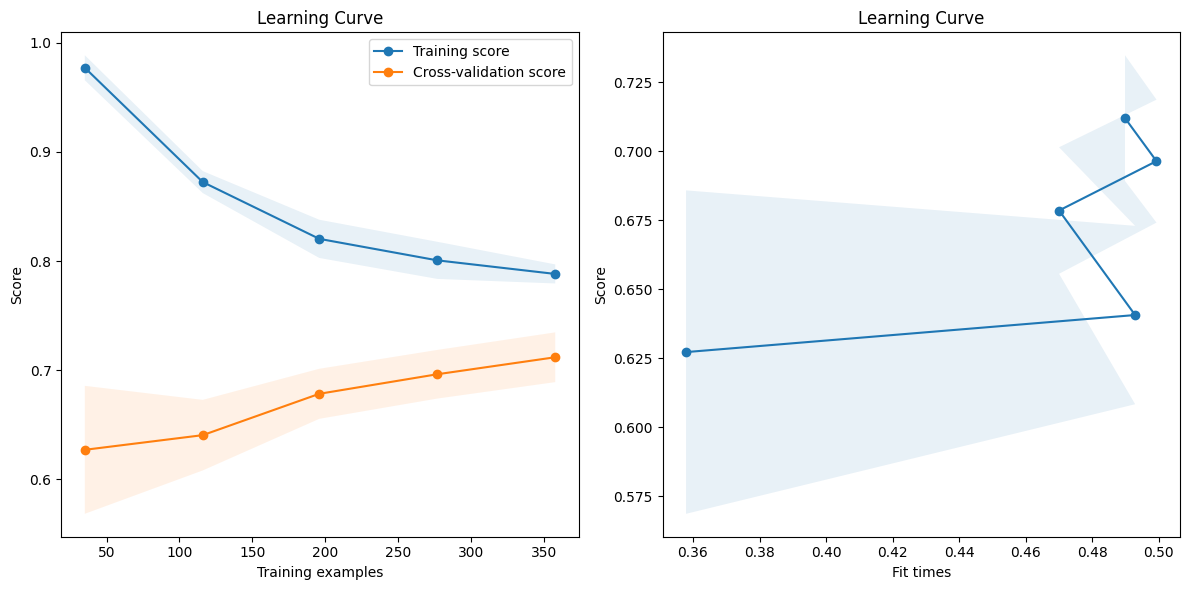



Classification Report on test Set:
              precision    recall  f1-score   support

         3.0       0.76      0.59      0.67        37
         4.0       0.72      0.89      0.79        54
         5.0       0.00      0.00      0.00         5

    accuracy                           0.73        96
   macro avg       0.49      0.49      0.49        96
weighted avg       0.70      0.73      0.70        96

[[22 15  0]
 [ 6 48  0]
 [ 1  4  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


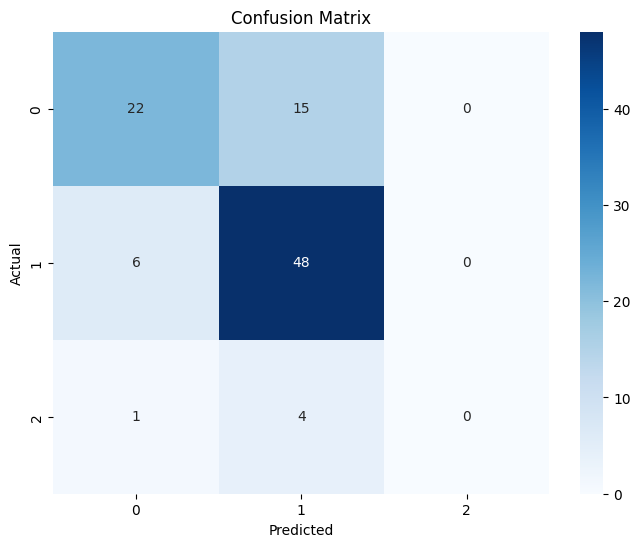




Classification Report on Evaluation Set:
              precision    recall  f1-score   support

         3.0       0.82      0.59      0.68        46
         4.0       0.67      0.89      0.76        47
         5.0       0.00      0.00      0.00         3

    accuracy                           0.72        96
   macro avg       0.49      0.49      0.48        96
weighted avg       0.72      0.72      0.70        96

[[27 19  0]
 [ 5 42  0]
 [ 1  2  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


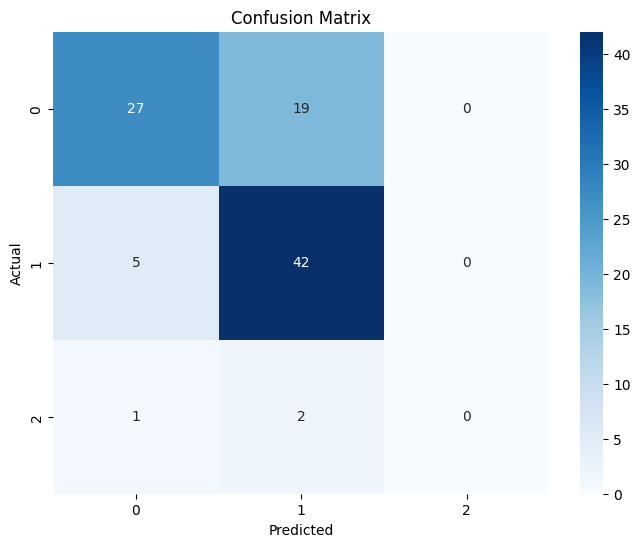

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV



# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Calculate the average of environmental perceptions for each row
average_perception = environmental_perception.mean(axis=1)
average_perception = average_perception.round()

# Encode socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features_encoded, average_perception,
                                                    test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

best_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13]

  # Train a model with the best max_depth
classifier = RandomForestClassifier(max_depth = 6, random_state=42)
classifier.fit(X_train, y_train)

  # Make predictions on the test set
y_pred = classifier.predict(X_test)

  # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

  # Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

  # Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')


  # Plot learning curves
plot_learning_curve(classifier, X_train, y_train, title=' Learning Curves')
print('\n')

# Print Classification Report
print("Classification Report on test Set:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n\n')

# Print Classification Report
print("Classification Report on Evaluation Set:")
print(classification_report(y_eval, y_eval_pred))

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_eval, y_eval_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
average_perception = average_perception.round()


In [ ]:
average_perception.unique()

array([4., 3., 2., 5.])

# DecisionTree - new approach

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6145833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


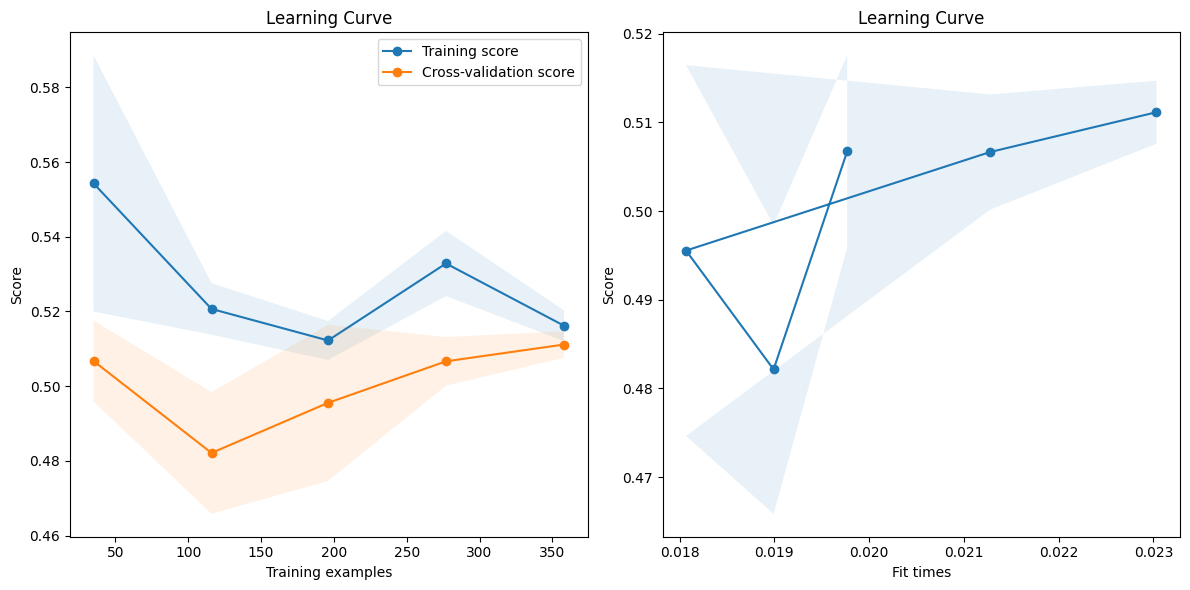

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6145833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


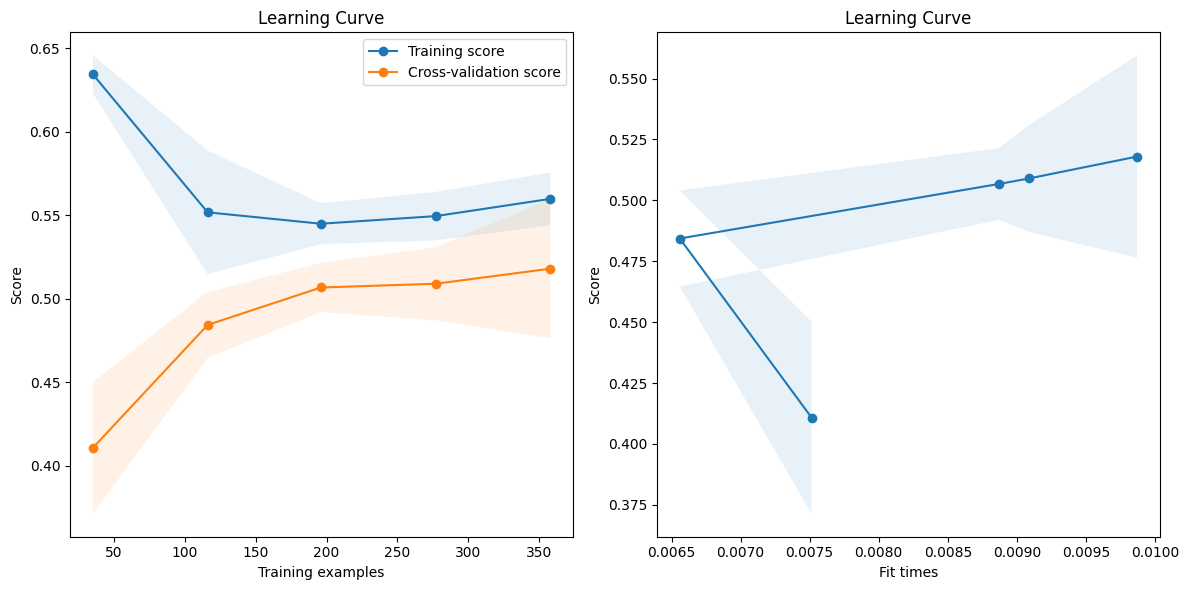

Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333 



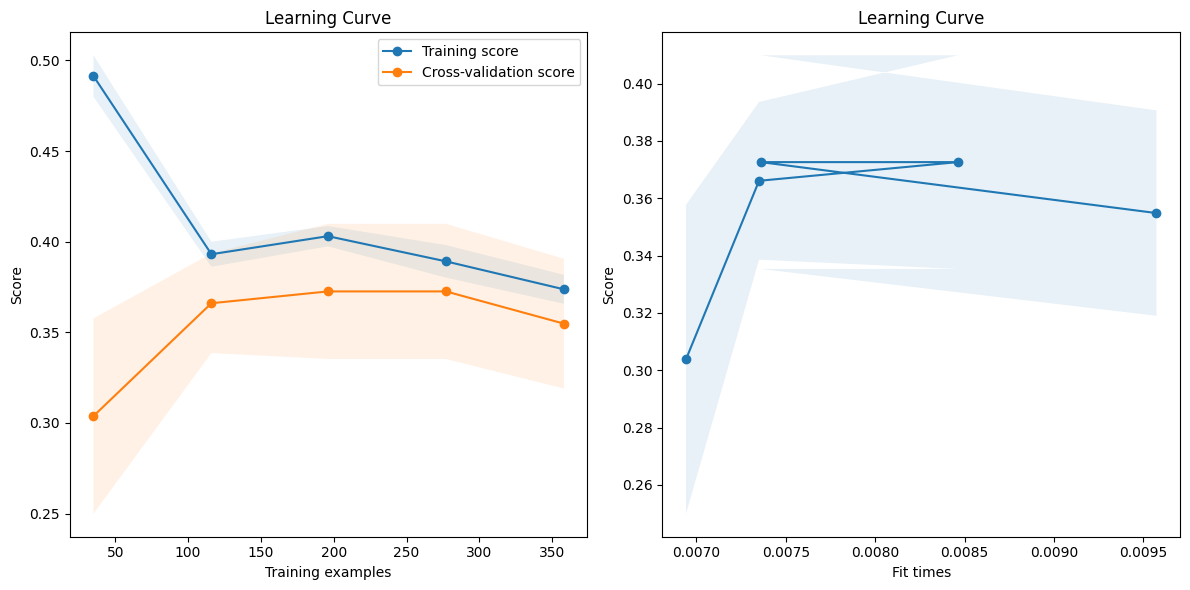

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3229166666666667 



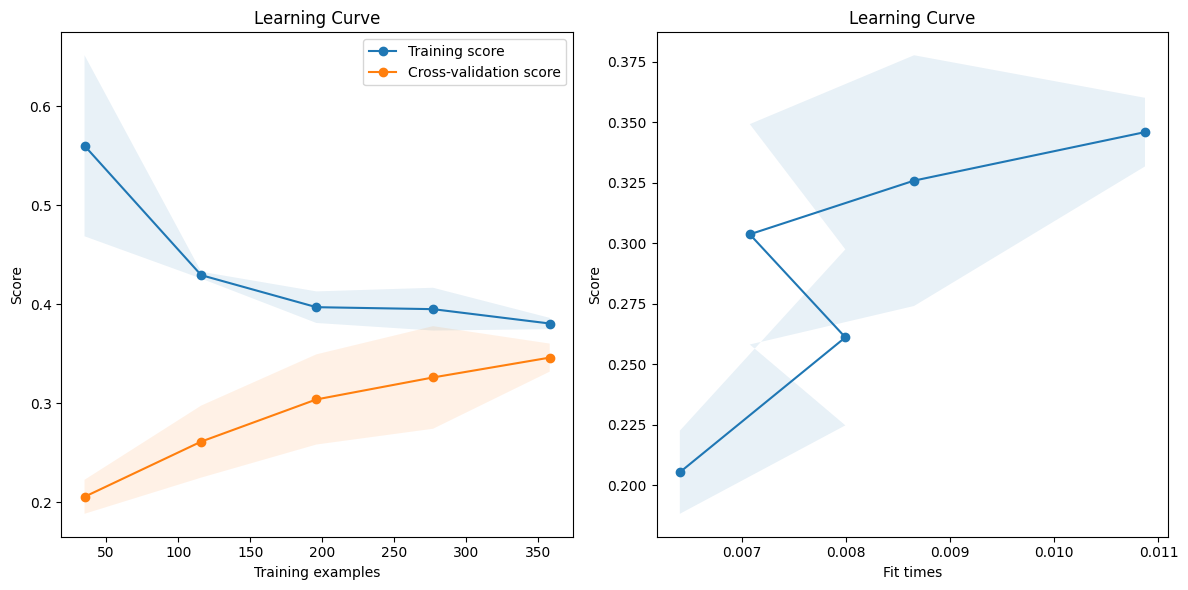

Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.375 



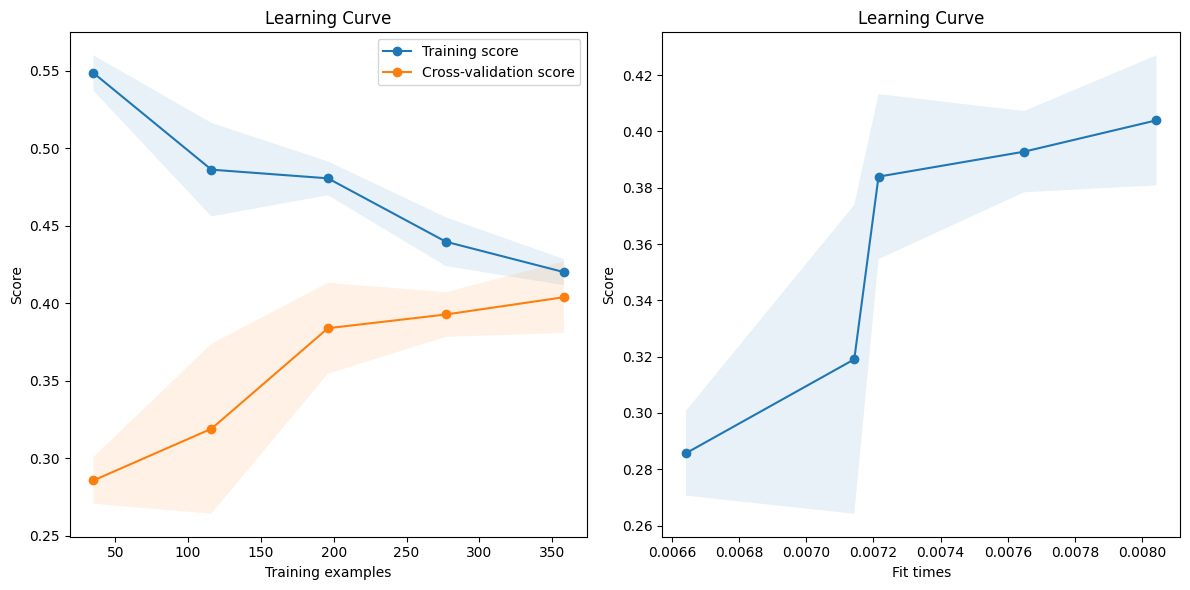

Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4166666666666667 



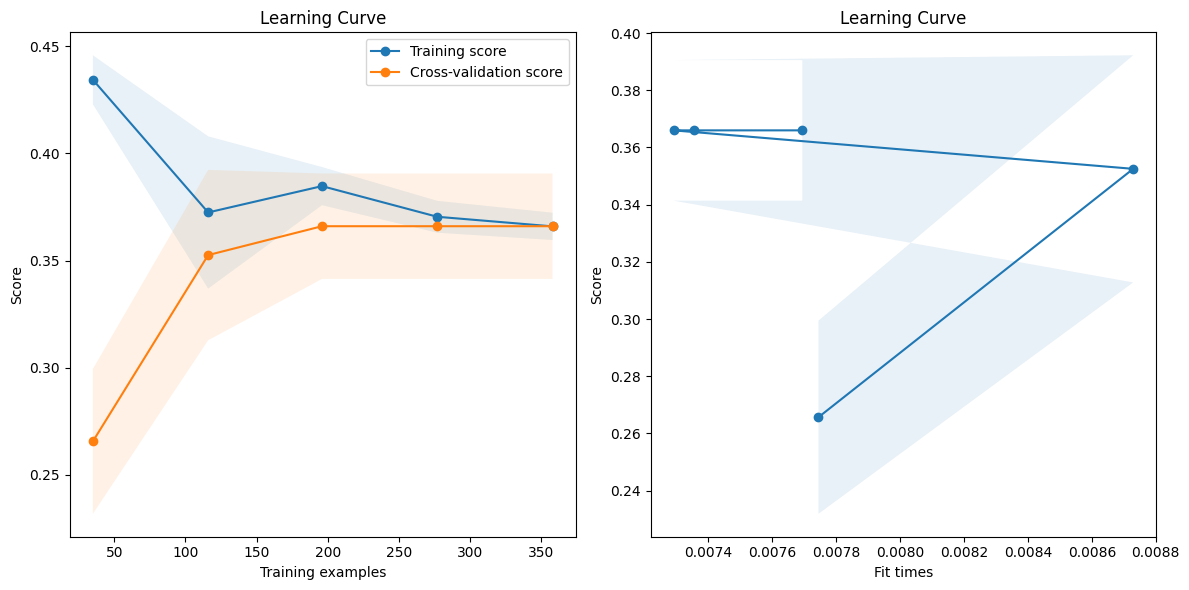

Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.3229166666666667 



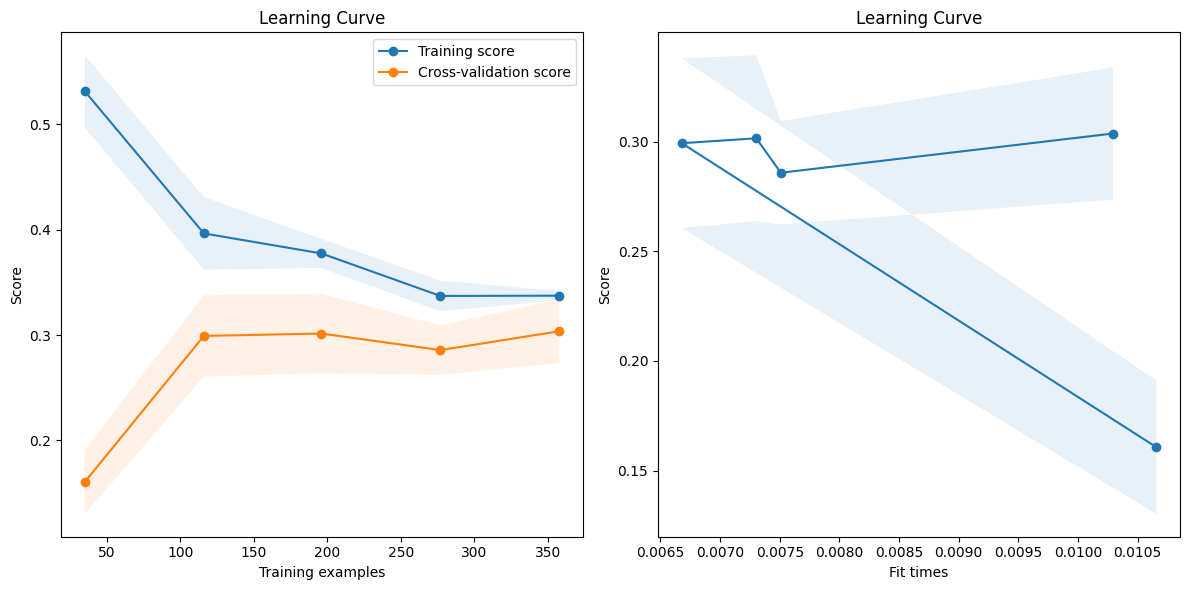

Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6145833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6145833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3229166666666667
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.375
Accuracy on Test Set for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4166666666666667
Accurac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
                                'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
                                'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
                                'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
                                'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
                                'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
                                'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Encode all socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features_encoded, environmental_perception,
                                                    test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an empty dictionary to store classifiers for each target environmental perception variable
classifiers = {}
best_max_depths = {}

# Train a Decision Tree Classifier (you can choose other classifiers as well)
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception.columns:

    param_grid = {'max_depth': range(1, 7)}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[column])

    # Get the best max_depth for the current target
    best_max_depth = grid_search.best_params_['max_depth']
    best_max_depths[column] = best_max_depth

    # Train a model with the best max_depth
    classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy} \n')

    # Plot learning curves
    plot_learning_curve(classifier, X_train, y_train[column], title=f'{column} Learning Curves')

    # Save the trained classifier to the dictionary
    classifiers[column] = classifier

# Apply the model to the test set
y_test_pred = pd.DataFrame({col: clf.predict(X_test) for col, clf in classifiers.items()})

# Evaluate the model on the test set for each target
test_accuracies = {col: accuracy_score(y_test[col], y_test_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the test set
for col, acc in test_accuracies.items():
    print(f'Accuracy on Test Set for {col}: {acc}')

# Calculate average accuracy on the test set
average_test_accuracy = np.mean(list(test_accuracies.values()))
print(f'Average Accuracy on Test Set: {average_test_accuracy}\n')

# Apply the model to the evaluation set
y_eval_pred = pd.DataFrame({col: clf.predict(X_eval) for col, clf in classifiers.items()})

# Evaluate the model on the evaluation set for each target
eval_accuracies = {col: accuracy_score(y_eval[col], y_eval_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the evaluation set
for col, acc in eval_accuracies.items():
    print(f'Accuracy on Evaluation Set for {col}: {acc}')

# Calculate average accuracy on the evaluation set
average_eval_accuracy = np.mean(list(eval_accuracies.values()))
print(f'Average Accuracy on Evaluation Set: {average_eval_accuracy}')


# Logistic Regression - New Approach

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
                                'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
                                'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
                                'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
                                'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
                                'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
                                'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Encode all socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features_encoded, environmental_perception,
                                                    test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an empty dictionary to store classifiers for each target environmental perception variable
classifiers = {}
best_C_values = {}

# Train a Logistic Regression Classifier (you can choose other classifiers as well)
classifier = LogisticRegression(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception.columns:

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[column])

    # Get the best C value for the current target
    best_C = grid_search.best_params_['C']
    best_C_values[column] = best_C

    # Train a model with the best C value
    classifier = LogisticRegression(C=best_C, random_state=42)
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy} \n')

    # Save the trained classifier to the dictionary
    classifiers[column] = classifier

# Apply the model to the test set
y_test_pred = pd.DataFrame({col: clf.predict(X_test) for col, clf in classifiers.items()})

# Evaluate the model on the test set for each target
test_accuracies = {col: accuracy_score(y_test[col], y_test_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the test set
for col, acc in test_accuracies.items():
    print(f'Accuracy on Test Set for {col}: {acc}')

# Calculate average accuracy on the test set
average_test_accuracy = np.mean(list(test_accuracies.values()))
print(f'Average Accuracy on Test Set: {average_test_accuracy}\n')

# Apply the model to the evaluation set
y_eval_pred = pd.DataFrame({col: clf.predict(X_eval) for col, clf in classifiers.items()})

# Evaluate the model on the evaluation set for each target
eval_accuracies = {col: accuracy_score(y_eval[col], y_eval_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the evaluation set
for col, acc in eval_accuracies.items():
    print(f'Accuracy on Evaluation Set for {col}: {acc}')

# Calculate average accuracy on the evaluation set
average_eval_accuracy = np.mean(list(eval_accuracies.values()))
print(f'Average Accuracy on Evaluation Set: {average_eval_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6041666666666666 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3958333333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4270833333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4791666666666667 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.3020833333333333 

Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6041666666666666
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3958333333333333
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exag

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic regression - new approach using standard scaler

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
                                'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
                                'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
                                'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
                                'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
                                'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
                                'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Encode all socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Standardize the socio-demographic features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_eval_scaled = scaler.transform(X_eval)

# Create an empty dictionary to store classifiers for each target environmental perception variable
classifiers = {}
best_C_values = {}

# Train a Logistic Regression Classifier (you can choose other classifiers as well)
classifier = LogisticRegression(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception.columns:

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train[column])

    # Get the best C value for the current target
    best_C = grid_search.best_params_['C']
    best_C_values[column] = best_C

    # Train a model with the best C value
    classifier = LogisticRegression(C=best_C, random_state=42)
    classifier.fit(X_train_scaled, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy} \n')

    # Save the trained classifier to the dictionary
    classifiers[column] = classifier

# Apply the model to the test set
y_test_pred = pd.DataFrame({col: clf.predict(X_test_scaled) for col, clf in classifiers.items()})

# Evaluate the model on the test set for each target
test_accuracies = {col: accuracy_score(y_test[col], y_test_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the test set
for col, acc in test_accuracies.items():
    print(f'Accuracy on Test Set for {col}: {acc}')

# Calculate average accuracy on the test set
average_test_accuracy = np.mean(list(test_accuracies.values()))
print(f'Average Accuracy on Test Set: {average_test_accuracy}\n')

# Apply the model to the evaluation set
y_eval_pred = pd.DataFrame({col: clf.predict(X_eval_scaled) for col, clf in classifiers.items()})

# Evaluate the model on the evaluation set for each target
eval_accuracies = {col: accuracy_score(y_eval[col], y_eval_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the evaluation set
for col, acc in eval_accuracies.items():
    print(f'Accuracy on Evaluation Set for {col}: {acc}')

# Calculate average accuracy on the evaluation set
average_eval_accuracy = np.mean(list(eval_accuracies.values()))
print(f'Average Accuracy on Evaluation Set: {average_eval_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6354166666666666 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.625 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.40625 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.3541666666666667 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4791666666666667 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.3333333333333333 

Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6354166666666666
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.625
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.40625
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.35416666666

# Logistic regression - new approach by calculating best max_iter too


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
                                'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
                                'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
                                'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
                                'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
                                'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
                                'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Encode all socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features_encoded, environmental_perception,
                                                    test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an empty dictionary to store classifiers for each target environmental perception variable
classifiers = {}
best_C_values = {}
best_max_iter_values = {}

# Train a Logistic Regression Classifier (you can choose other classifiers as well)
classifier = LogisticRegression(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception.columns:

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 300, 400, 500]}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[column])

    # Get the best C and max_iter values for the current target
    best_C = grid_search.best_params_['C']
    best_max_iter = grid_search.best_params_['max_iter']
    best_C_values[column] = best_C
    best_max_iter_values[column] = best_max_iter

    # Train a model with the best C and max_iter values
    classifier = LogisticRegression(C=best_C, max_iter=best_max_iter, random_state=42)
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy} \n')

    # Save the trained classifier to the dictionary
    classifiers[column] = classifier

# Apply the model to the test set
y_test_pred = pd.DataFrame({col: clf.predict(X_test) for col, clf in classifiers.items()})

# Evaluate the model on the test set for each target
test_accuracies = {col: accuracy_score(y_test[col], y_test_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the test set
for col, acc in test_accuracies.items():
    print(f'Accuracy on Test Set for {col}: {acc}')

# Calculate average accuracy on the test set
average_test_accuracy = np.mean(list(test_accuracies.values()))
print(f'Average Accuracy on Test Set: {average_test_accuracy}\n')

# Apply the model to the evaluation set
y_eval_pred = pd.DataFrame({col: clf.predict(X_eval) for col, clf in classifiers.items()})

# Evaluate


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6145833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3958333333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4270833333333333 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4791666666666667 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.3020833333333333 

Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6145833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3645833333333333
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3958333333333333
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exag

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistict Regression - new approach on the basis of best C value and best solver


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
                            'Region: generated from A1.1', 'What is your biological sex?',
                            'What is the highest educational level you have completed',
                            'Do you have a pet or  a garden at home?', 'What is your age?',
                            'Please specify your ethnicity.', 'What is your marital status?',
                            'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
                                'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
                                'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
                                'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
                                'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
                                'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
                                'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Encode all socio-demographic columns except 'age' using one-hot encoding
socio_demo_features_encoded = pd.get_dummies(socio_demo_features.drop('What is your age?', axis=1), drop_first=True)

# Concatenate the encoded socio-demographic features with 'age'
socio_demo_features_encoded = pd.concat([socio_demo_features[['What is your age?']], socio_demo_features_encoded], axis=1)

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features_encoded, environmental_perception,
                                                    test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an empty dictionary to store classifiers for each target environmental perception variable
classifiers = {}
best_C_values = {}
best_solver_values = {}

# Train a Logistic Regression Classifier (you can choose other classifiers as well)
classifier = LogisticRegression(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception.columns:

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[column])

    # Get the best C and solver values for the current target
    best_C = grid_search.best_params_['C']
    best_solver = grid_search.best_params_['solver']
    best_C_values[column] = best_C
    best_solver_values[column] = best_solver

    # Train a model with the best C and solver values
    classifier = LogisticRegression(C=best_C, solver=best_solver, random_state=42)
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy} \n')

    # Save the trained classifier to the dictionary
    classifiers[column] = classifier

# Apply the model to the test set
y_test_pred = pd.DataFrame({col: clf.predict(X_test) for col, clf in classifiers.items()})

# Evaluate the model on the test set for each target
test_accuracies = {col: accuracy_score(y_test[col], y_test_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the test set
for col, acc in test_accuracies.items():
    print(f'Accuracy on Test Set for {col}: {acc}')

# Calculate average accuracy on the test set
average_test_accuracy = np.mean(list(test_accuracies.values()))
print(f'Average Accuracy on Test Set: {average_test_accuracy}\n')

# Apply the model to the evaluation set
y_eval_pred = pd.DataFrame({col: clf.predict(X_eval) for col, clf in classifiers.items()})

# Evaluate the model on the evaluation set for each target
eval_accuracies = {col: accuracy_score(y_eval[col], y_eval_pred[col]) for col in classifiers.keys()}

# Print accuracy for each target on the evaluation set
for col, acc in eval_accuracies.items():
    print(f'Accuracy on Evaluation Set for {col}: {acc}')

# Calculate average accuracy on the evaluation set
average_eval_accuracy = np.mean(list(eval_accuracies.values()))
print(f'Average Accuracy on Evaluation Set: {average_eval_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.625 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.34375 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.4375 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4166666666666667 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.46875 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef

Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.3020833333333333 

Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.625
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6770833333333334
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.34375
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.4375
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4166666666666667
Accura

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)


# Train the classifier for each target variable
for column in environmental_perception.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6041666666666666
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6354166666666666
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.34375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.4375
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4270833333333333
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.4375
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.28125
Accuracy on Evaluation Set: 0.3645833333333333
              precision    recall  f1-score   support

           1       0.33      0.21      0.26        14
           2       0.17      0.15      0.16        13
           3       0.38      0.56      0.45        27
           4       0.44      0.46      0.45        26
           5       0.38      0.19      0.25        16



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# Function to plot learning curves
def plot_learning_curve2(estimator, X, y, title=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


#Temporarily removing them:
#'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
#'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
#'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
#'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
#'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
#'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
#'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
#'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                 ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                 , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                 , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                 ,'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Convert numerical environmental perception variables to classes
environmental_perception_classes = environmental_perception.astype(str)


label_encoder = LabelEncoder()
for column in socio_demo_features.columns:
    socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])

# Dictionary to store the best max_depth for each target
best_max_depths = {}


# Convert each target variable to binary labels
for column in environmental_perception.columns:
    environmental_perception_classes[column] = label_encoder.fit_transform(environmental_perception_classes[column])

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features, environmental_perception_classes, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




# Train a Random Forest Classifier (you can choose other classifiers as well)
classifier = RandomForestClassifier(random_state=42)

# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')


# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))







<ipython-input-88-bf18245a608f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-88-bf18245a608f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-88-bf18245a608f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.59375
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.6458333333333334
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3125
Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.2604166666666667
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.34375
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.375
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how 

<ipython-input-86-23da186106bf>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-86-23da186106bf>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-86-23da186106bf>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

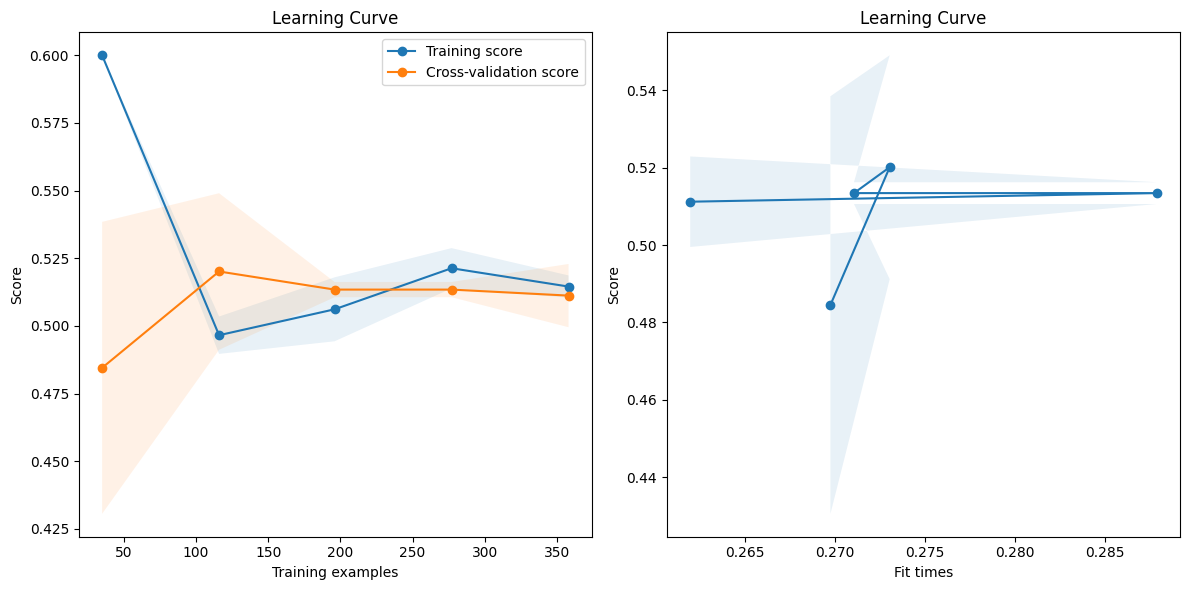



Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.6145833333333334


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


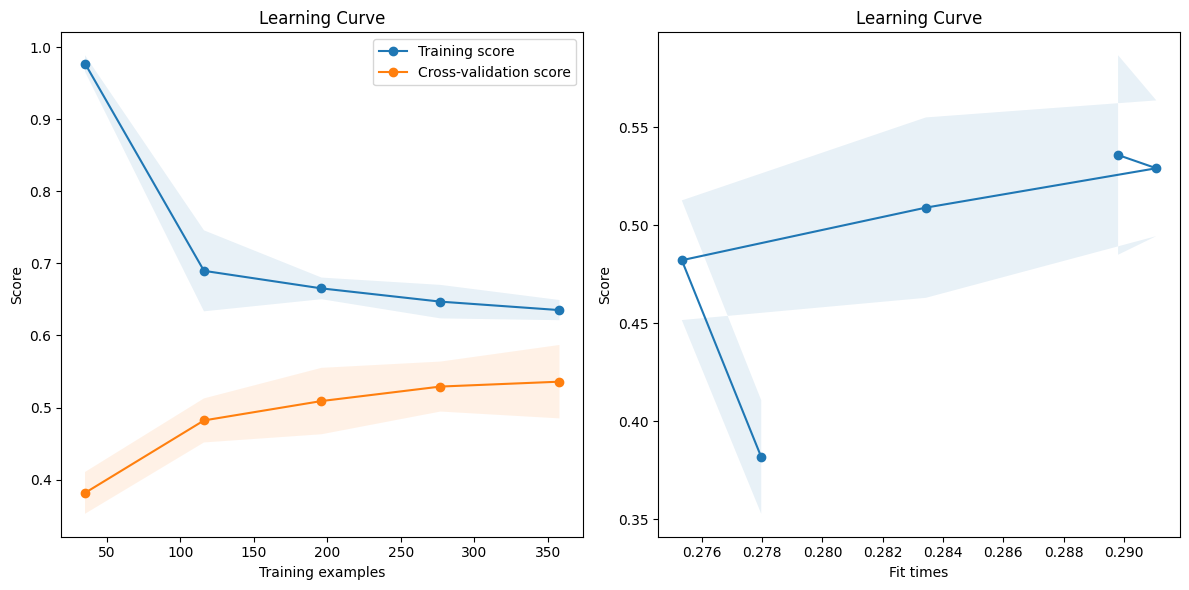



Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.65625


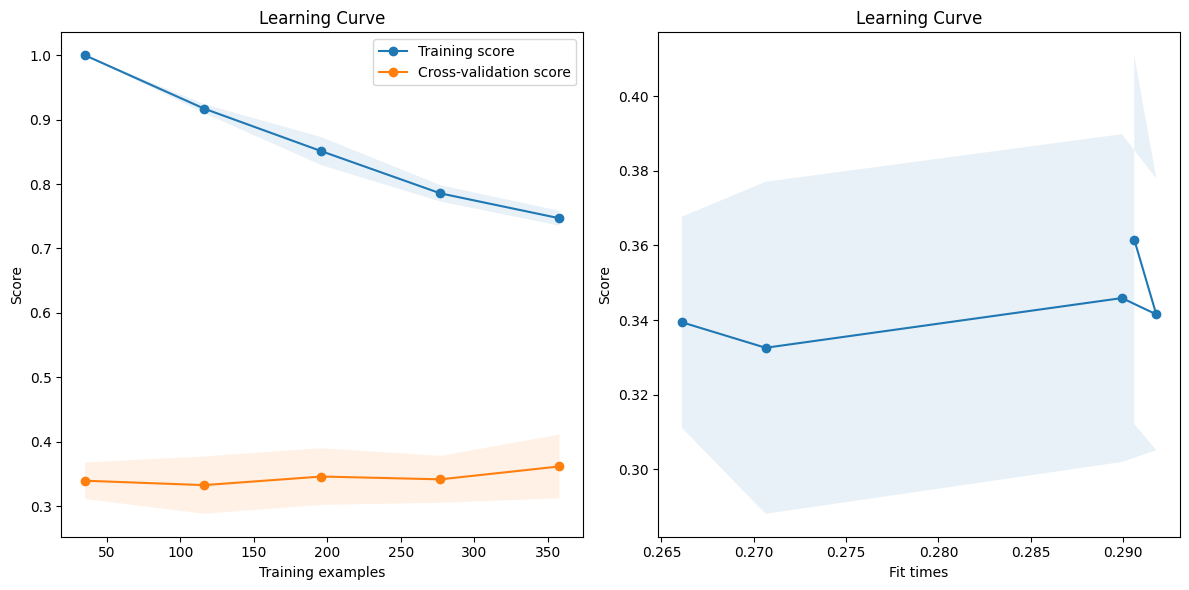



Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.3020833333333333


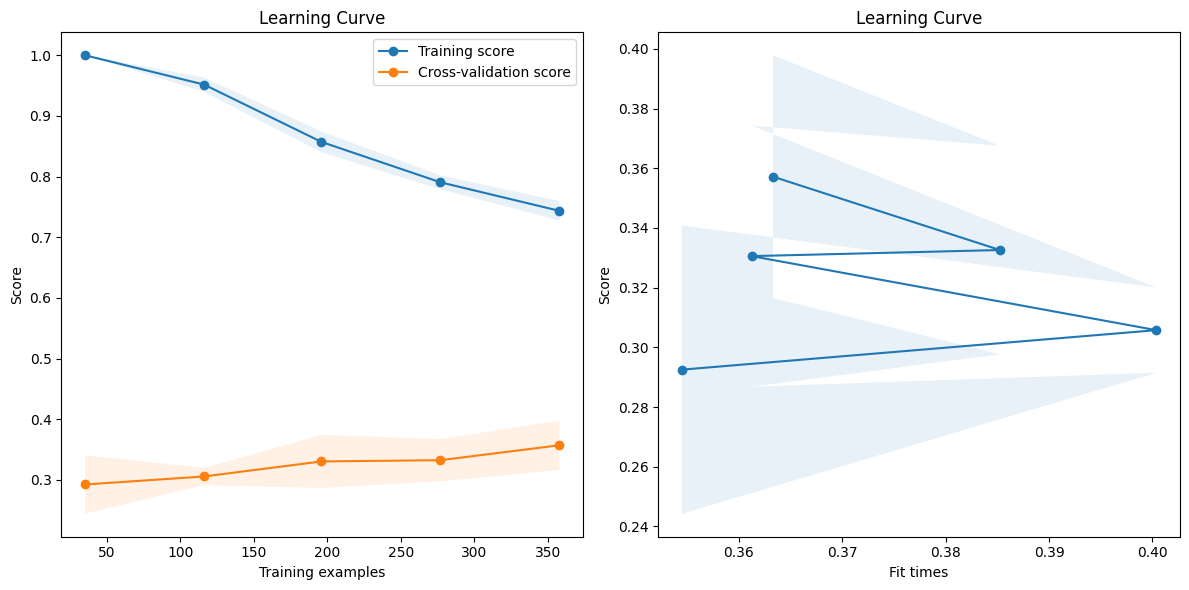



Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.3541666666666667


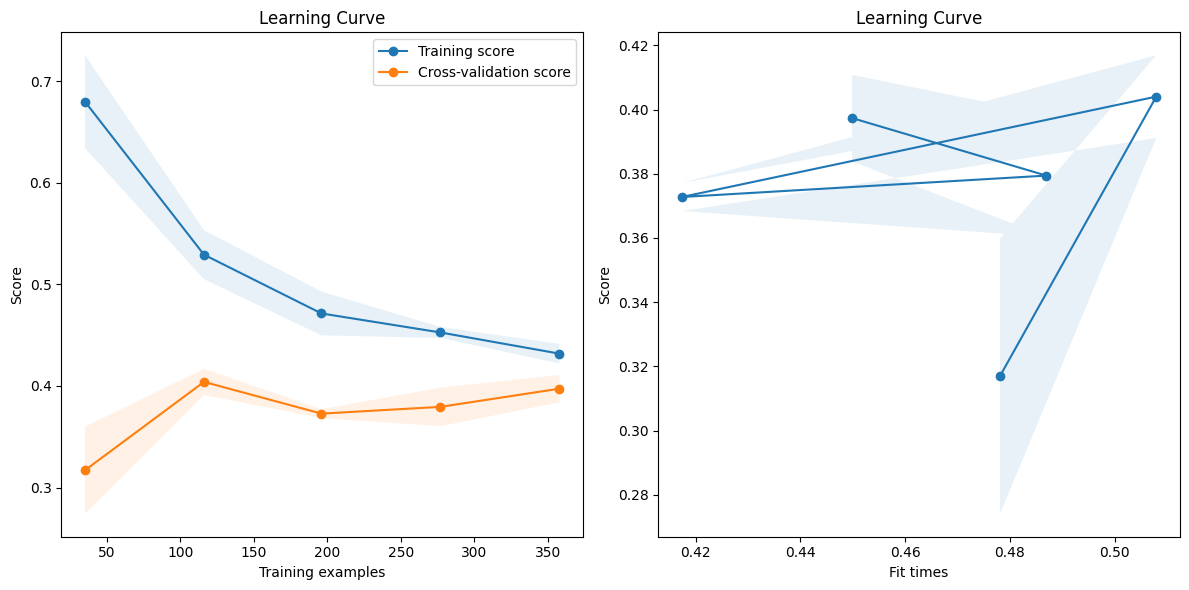



Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4479166666666667


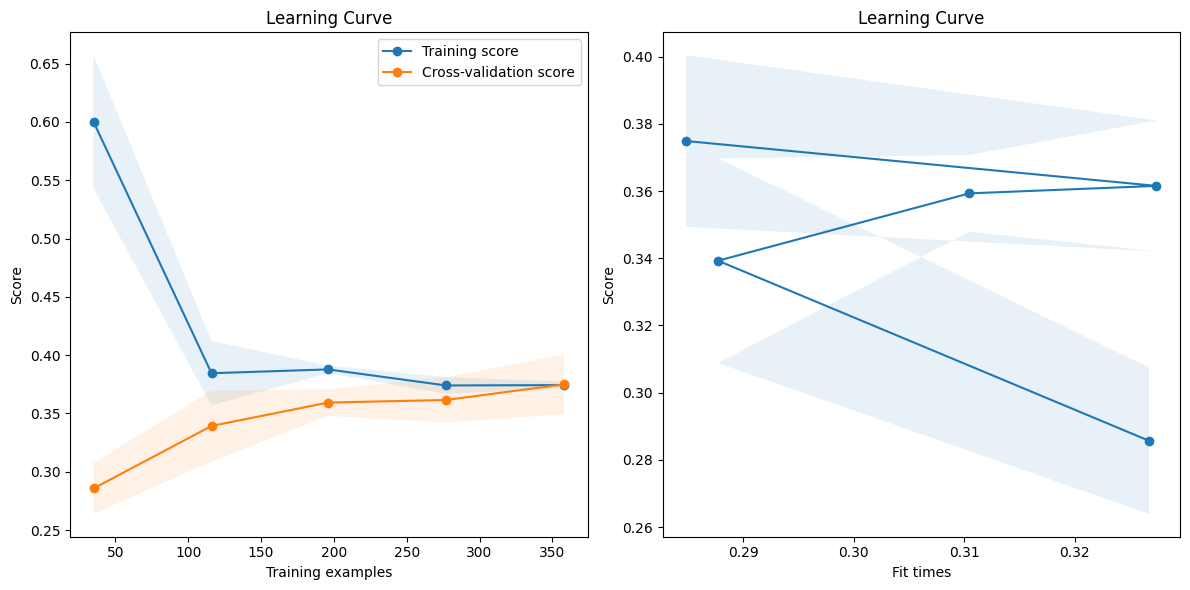



Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.46875


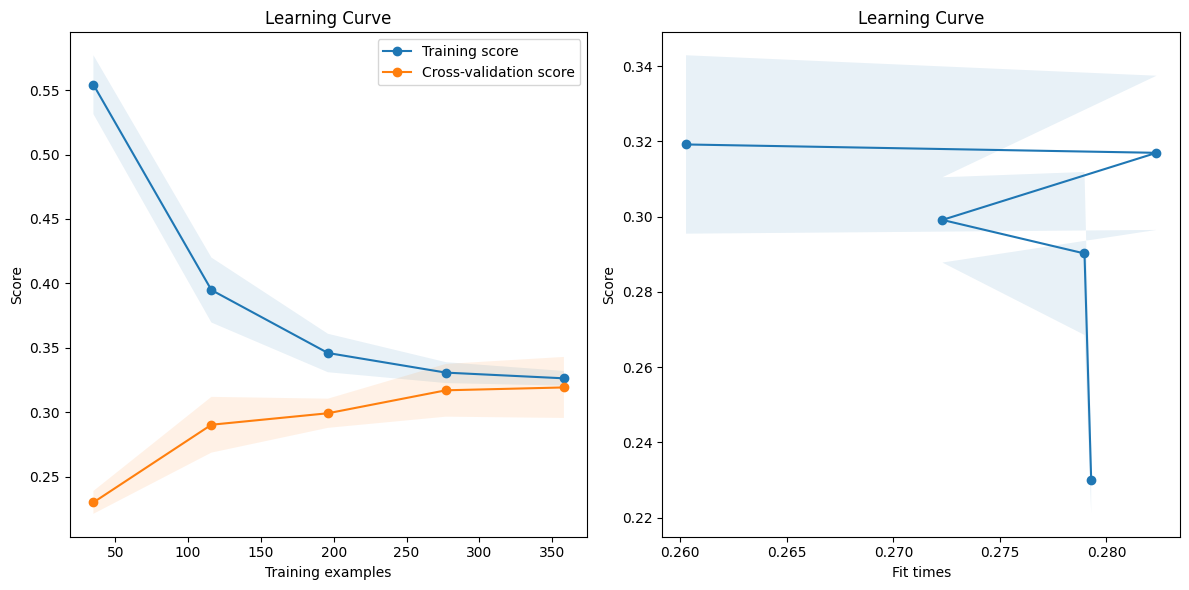



Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.375
Accuracy on Evaluation Set: 0.3541666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        13
           2       0.32      0.89      0.47        27
           3       0.50      0.38      0.43        26
           4       0.00      0.00      0.00        16

    accuracy                           0.35        96
   macro avg       0.16      0.25      0.18        96
weighted avg       0.22      0.35      0.25        96

Best max_depths: {'How much do you agree with the following statements? [Humans are seriously abusing the environment.]': 1, 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]': 4, 'How much do you agree with the following statements? [Hum

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# Function to plot learning curves
def plot_learning_curve2(estimator, X, y, title=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


#Temporarily removing them:
#'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
#'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
#'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
#'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
#'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
#'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
#'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
#'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'

# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                 ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                 , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                 , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                 ,'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Convert numerical environmental perception variables to classes
environmental_perception_classes = environmental_perception.astype(str)


label_encoder = LabelEncoder()
for column in socio_demo_features.columns:
    socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])

# Dictionary to store the best max_depth for each target
best_max_depths = {}


# Convert each target variable to binary labels
for column in environmental_perception.columns:
    environmental_perception_classes[column] = label_encoder.fit_transform(environmental_perception_classes[column])

# Split the dataset into training, test, and evaluation sets
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features, environmental_perception_classes, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




for column in environmental_perception_classes.columns:

    param_grid = {'max_depth': range(1, 7)}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train[column])

    # Get the best max_depth for the current target
    best_max_depth = grid_search.best_params_['max_depth']
    best_max_depths[column] = best_max_depth


    # Train a model with the best max_depth
    classifier = RandomForestClassifier(max_depth=best_max_depth, random_state=42)
    classifier.fit(X_train, y_train[column])

    # Visualize learning curve
    plot_learning_curve(classifier, X_train, y_train[column], title=f'{column} Learning Curves')
    print('\n')

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

    # Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(f"{column} \n",classification_report(y_eval[column], y_eval_pred))

# Print the best max_depths for each target
print("Best max_depths:", best_max_depths)



<ipython-input-31-8565777d7563>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-31-8565777d7563>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-31-8565777d7563>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

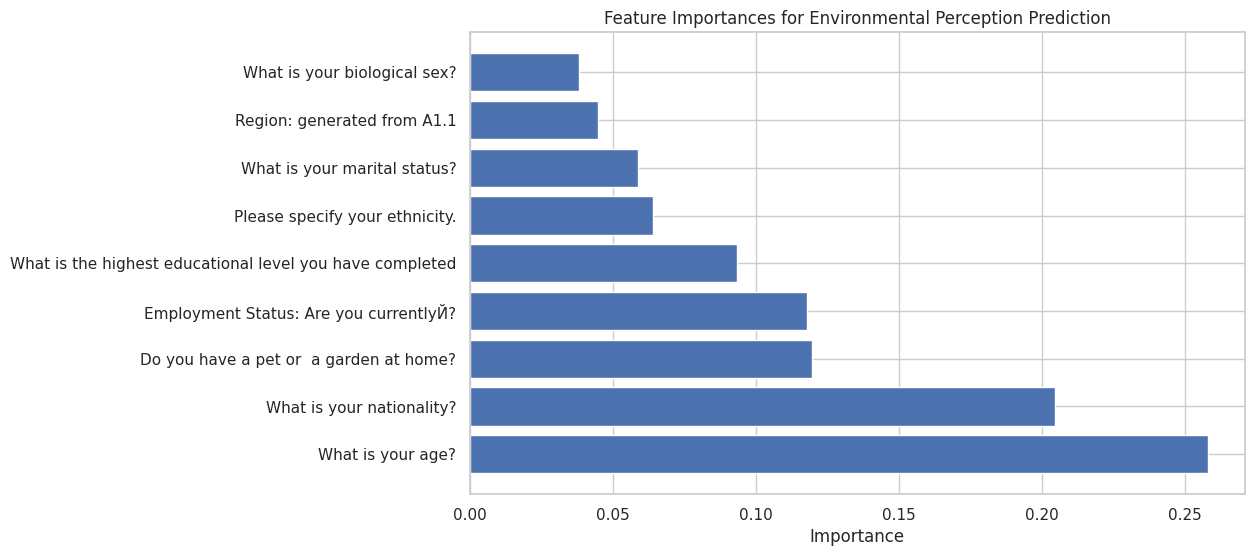

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is in a DataFrame named 'df'
# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]


# Convert numerical environmental perception variables to classes
environmental_perception_classes = environmental_perception.astype(str)

# Data Preprocessing
# Label encode categorical variables
label_encoder = LabelEncoder()
for column in socio_demo_features.columns:
    socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])

# Convert each target variable to binary labels
for column in environmental_perception.columns:
    environmental_perception_classes[column] = label_encoder.fit_transform(environmental_perception_classes[column])

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(socio_demo_features, environmental_perception_classes, test_size=0.3, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features, environmental_perception_classes, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Environmental Perception Prediction')
plt.show()


In [ ]:
from sklearn.svm import SVC

classifier = SVC(random_state=42)


# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=42)


# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()


# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)


# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

Accuracy for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]: 0.34375
Accuracy for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]: 0.3541666666666667
Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.5104166666666666
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.5208333333333334
Accuracy for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]: 0.3645833333333333
Accuracy for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]: 0.23958333333333334
Accuracy for How much do you agree with the following statements? [The balance 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=42)


# Train the classifier for each target variable
for column in environmental_perception_classes.columns:
    classifier.fit(X_train, y_train[column])

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')

# Apply the model to the evaluation set
y_eval_pred = classifier.predict(X_eval)

# Evaluate the model on the evaluation set
eval_accuracy = accuracy_score(y_eval[column], y_eval_pred)
print(f'Accuracy on Evaluation Set: {eval_accuracy}')

# Additional evaluation metrics
print(classification_report(y_eval[column], y_eval_pred))

#Trying some other Feature engineering


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2


#Dont forget to run the first code block of "Model testing - without cluster" part.


best_features_per_target = {}

for target_column in environmental_perception_classes.columns:
    # Select features for the current target variable
    X = socio_demo_features
    y = environmental_perception[target_column]

    # Apply SelectKBest
    best_features = SelectKBest(score_func=chi2, k=7)
    fit = best_features.fit(socio_demo_features, environmental_perception[target_column])

    # Get selected features and their scores
    selected_features = socio_demo_features.columns[fit.get_support()]
    #feature_scores = pd.DataFrame({'Specs': selected_features, 'Score': fit.scores_})
    feature_scores = pd.DataFrame(list(zip(selected_features, fit.scores_)), columns=['Specs', 'Score'])

    # Store the results for the current target variable
    best_features_per_target[target_column] = feature_scores.nlargest(7, 'Score')

# Display the selected features for each target variable
for target_column, features in best_features_per_target.items():
    print(f"\nTop features for {target_column}:\n{features}")


Top features for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]:
                                    Specs      Score
0               What is your nationality?  94.108542
1             Region: generated from A1.1   7.427532
2            What is your biological sex?   6.436944
6  Employment Status: Are you currentlyЙ?   4.014296
5            What is your marital status?   3.353654
4          Please specify your ethnicity.   3.241099
3                       What is your age?   0.970006

Top features for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]:
                                               Specs       Score
0                          What is your nationality?  202.652716
2                       What is your biological sex?   11.861906
3  What is the highest educational level you have...   10.781136
6               

<ipython-input-12-df85caf18d27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-12-df85caf18d27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[column] = label_encoder.fit_transform(socio_demo_features[column])
<ipython-input-12-df85caf18d27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

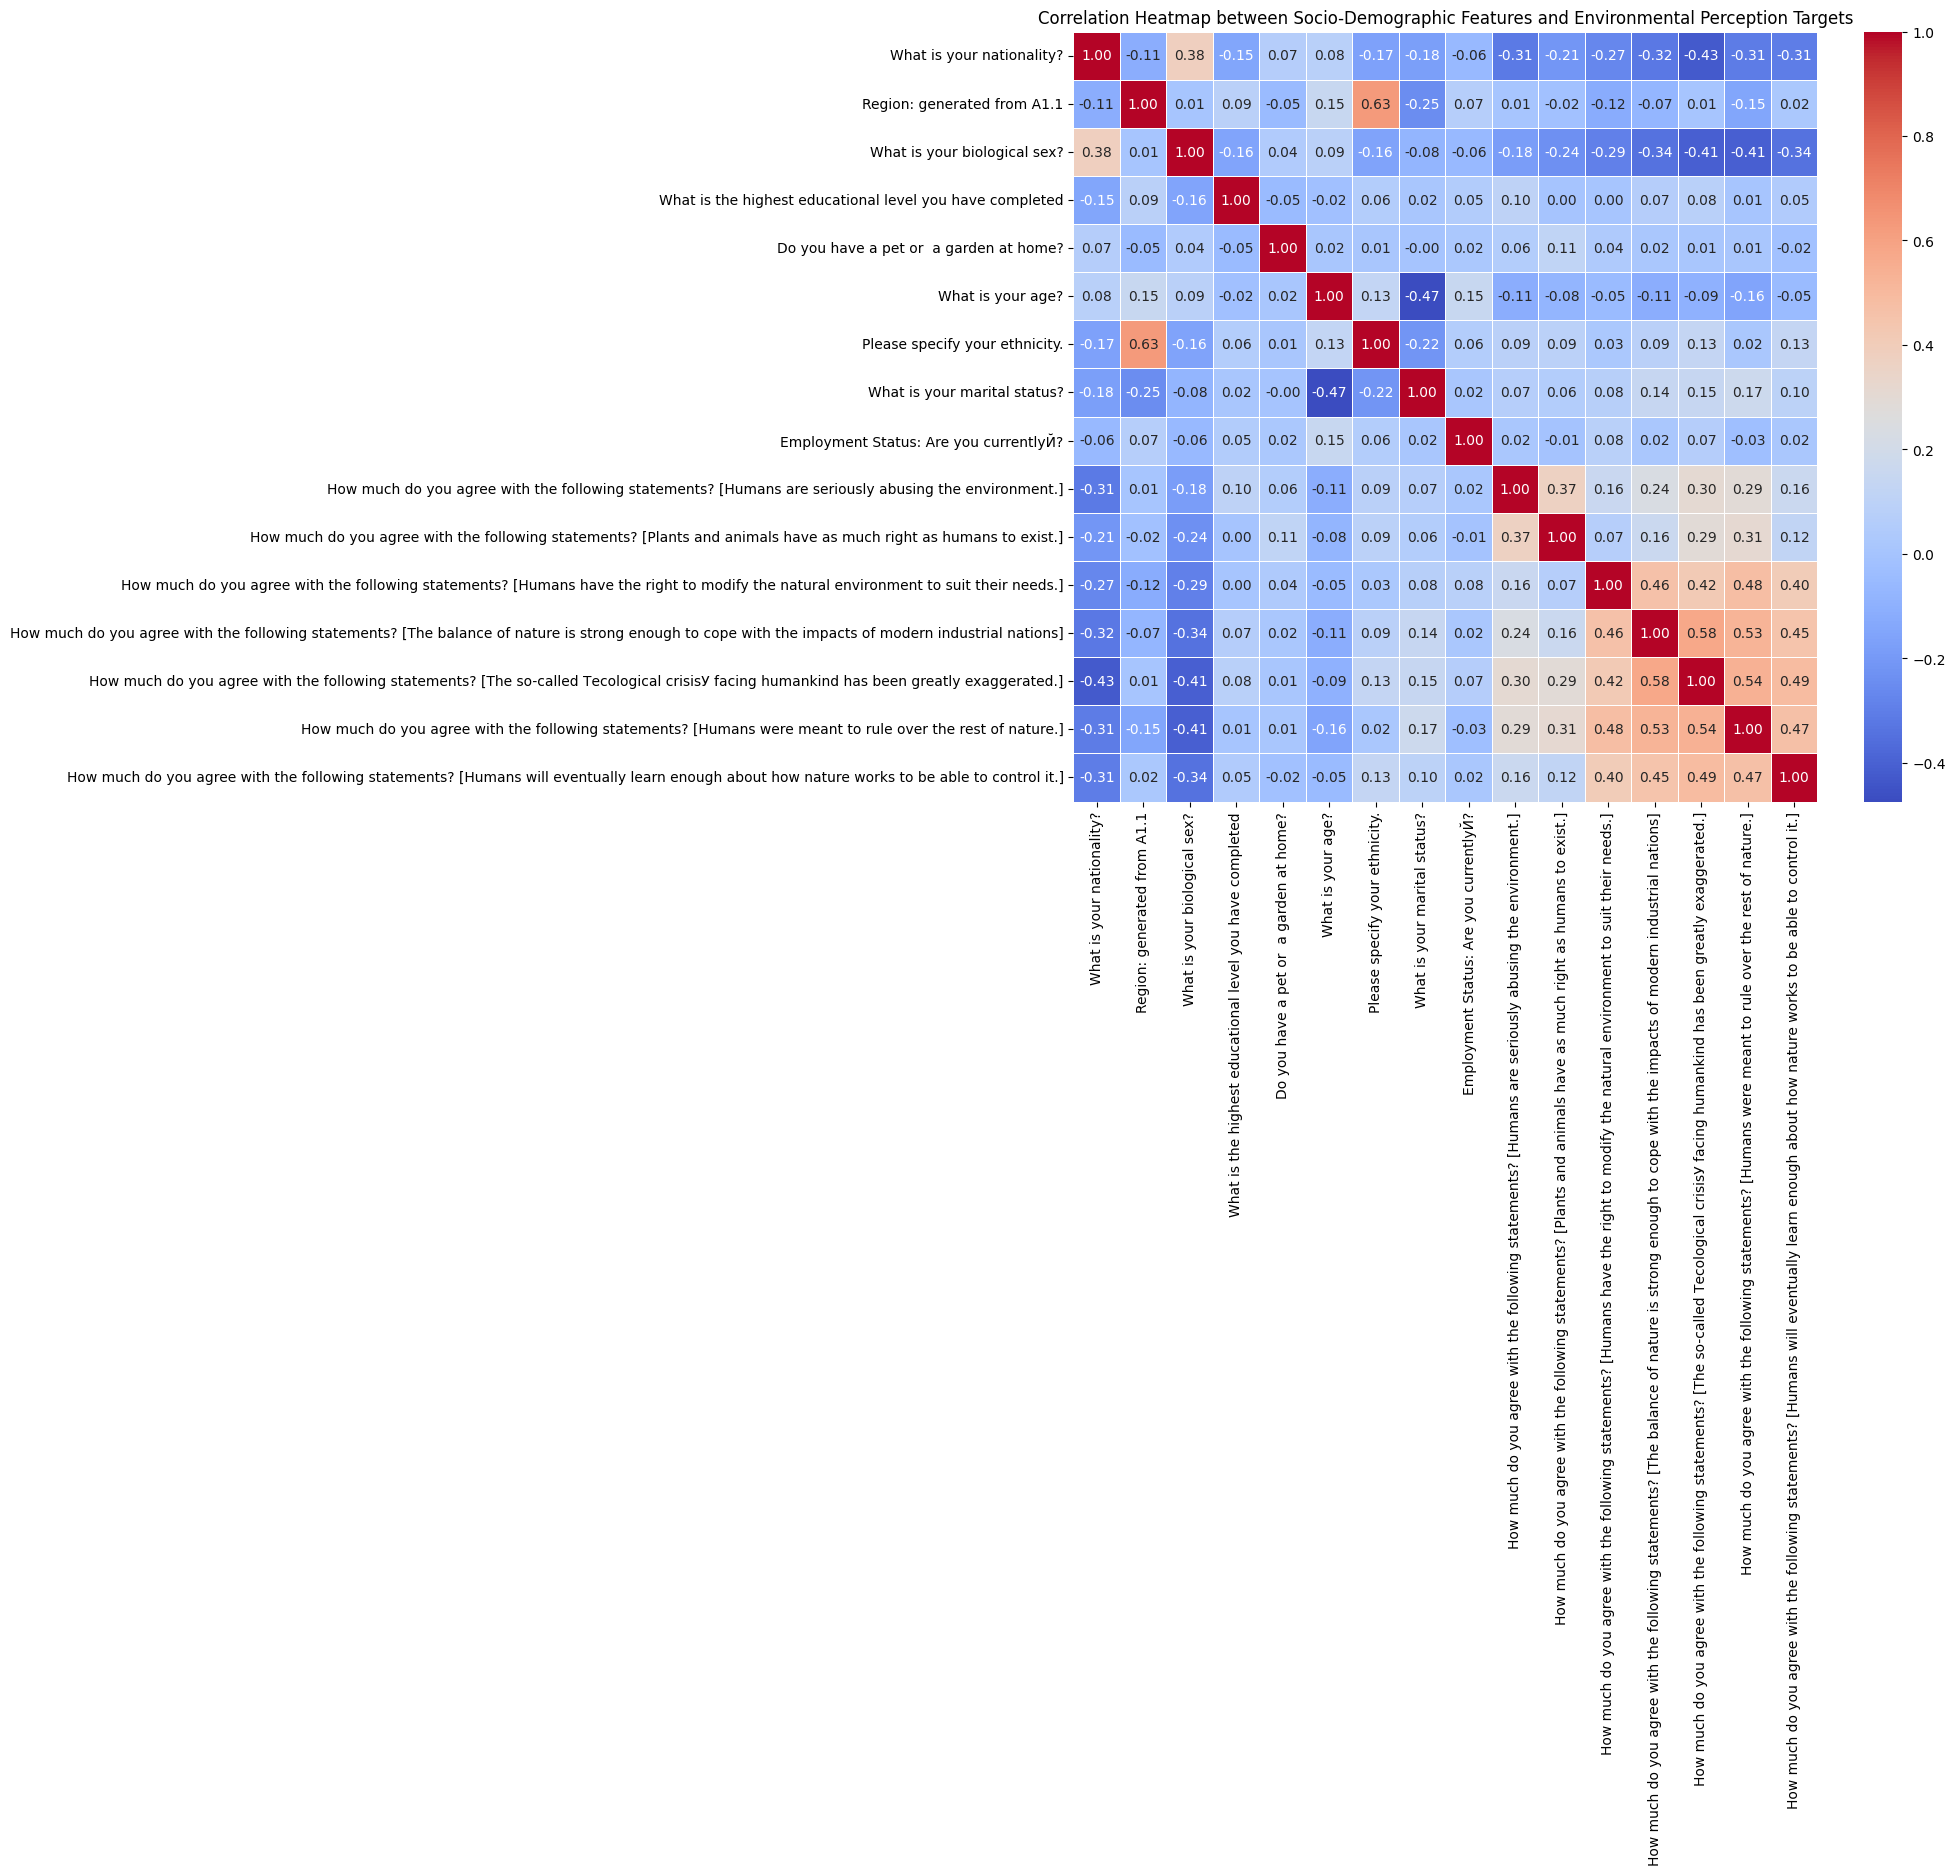

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encode categorical variables
new = socio_demo_features
label_encoder = LabelEncoder()
for column in socio_demo_features.columns:
    new[column] = label_encoder.fit_transform(socio_demo_features[column])
# Assuming socio_demo_features and environmental_perception are your feature and target DataFrames
# Concatenate them into a single DataFrame
df_combined_new = pd.concat([new, environmental_perception], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined_new.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap between Socio-Demographic Features and Environmental Perception Targets")
plt.show()


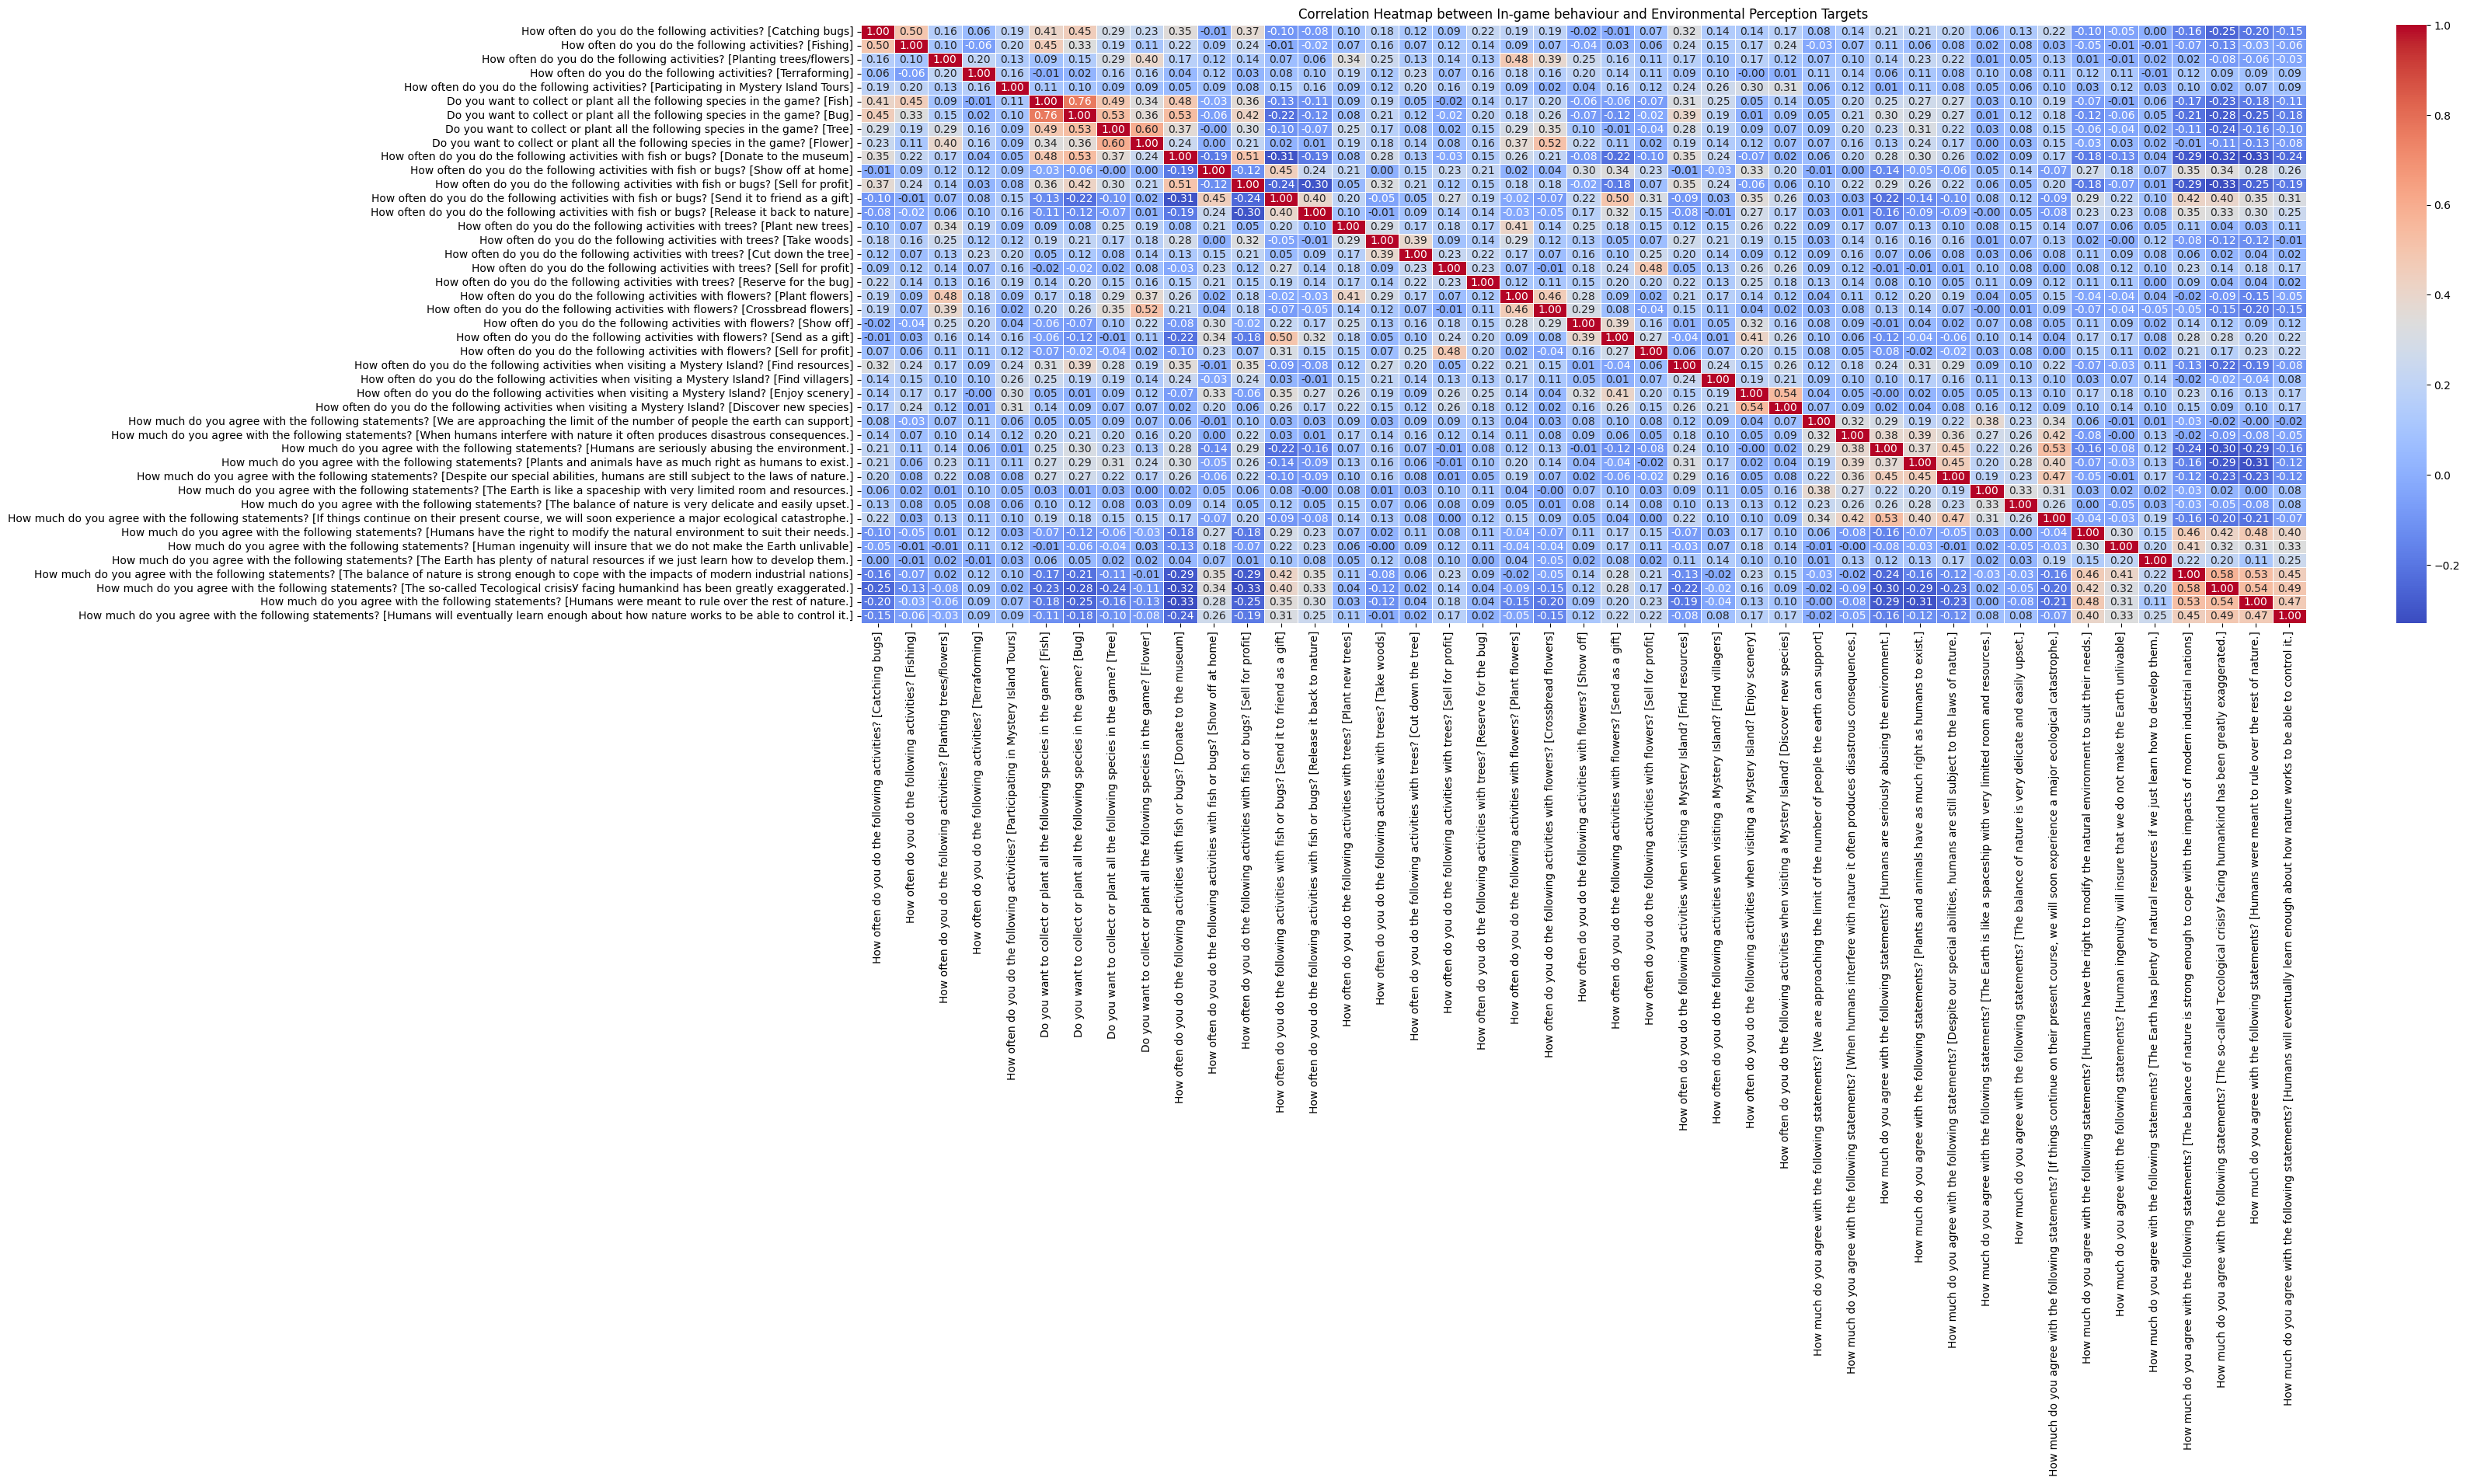

In [ ]:
# Assuming socio_demo_features and environmental_perception are your feature and target DataFrames
# Concatenate them into a single DataFrame

in_game_vars = df1[['How often do you do the following activities? [Catching bugs]',
       'How often do you do the following activities? [Fishing]',
       'How often do you do the following activities? [Planting trees/flowers]',
       'How often do you do the following activities? [Terraforming]',
       'How often do you do the following activities? [Participating in Mystery Island Tours]',
       'Do you want to collect or plant all the following species in the game? [Fish]',
       'Do you want to collect or plant all the following species in the game? [Bug]',
       'Do you want to collect or plant all the following species in the game? [Tree]',
       'Do you want to collect or plant all the following species in the game? [Flower]',
       'How often do you do the following activities with fish or bugs? [Donate to the museum]',
       'How often do you do the following activities with fish or bugs? [Show off at home]',
       'How often do you do the following activities with fish or bugs? [Sell for profit]',
       'How often do you do the following activities with fish or bugs? [Send it to friend as a gift]',
       'How often do you do the following activities with fish or bugs? [Release it back to nature]',
       'How often do you do the following activities with trees? [Plant new trees]',
       'How often do you do the following activities with trees? [Take woods]',
       'How often do you do the following activities with trees? [Cut down the tree]',
       'How often do you do the following activities with trees? [Sell for profit]',
       'How often do you do the following activities with trees? [Reserve for the bug]',
       'How often do you do the following activities with flowers? [Plant flowers]',
       'How often do you do the following activities with flowers? [Crossbread flowers]',
       'How often do you do the following activities with flowers? [Show off]',
       'How often do you do the following activities with flowers? [Send as a gift]',
       'How often do you do the following activities with flowers? [Sell for profit]',
       'How often do you do the following activities when visiting a Mystery Island? [Find resources]',
       'How often do you do the following activities when visiting a Mystery Island? [Find villagers]',
       'How often do you do the following activities when visiting a Mystery Island? [Enjoy scenery]',
       'How often do you do the following activities when visiting a Mystery Island? [Discover new species]']]


df_combined_new2 = pd.concat([in_game_vars, environmental_perception_classes], axis=1)

# Calculate the correlation matrix
correlation_matrix2 = df_combined_new2.corr()

# Create a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap between In-game behaviour and Environmental Perception Targets")
plt.show()

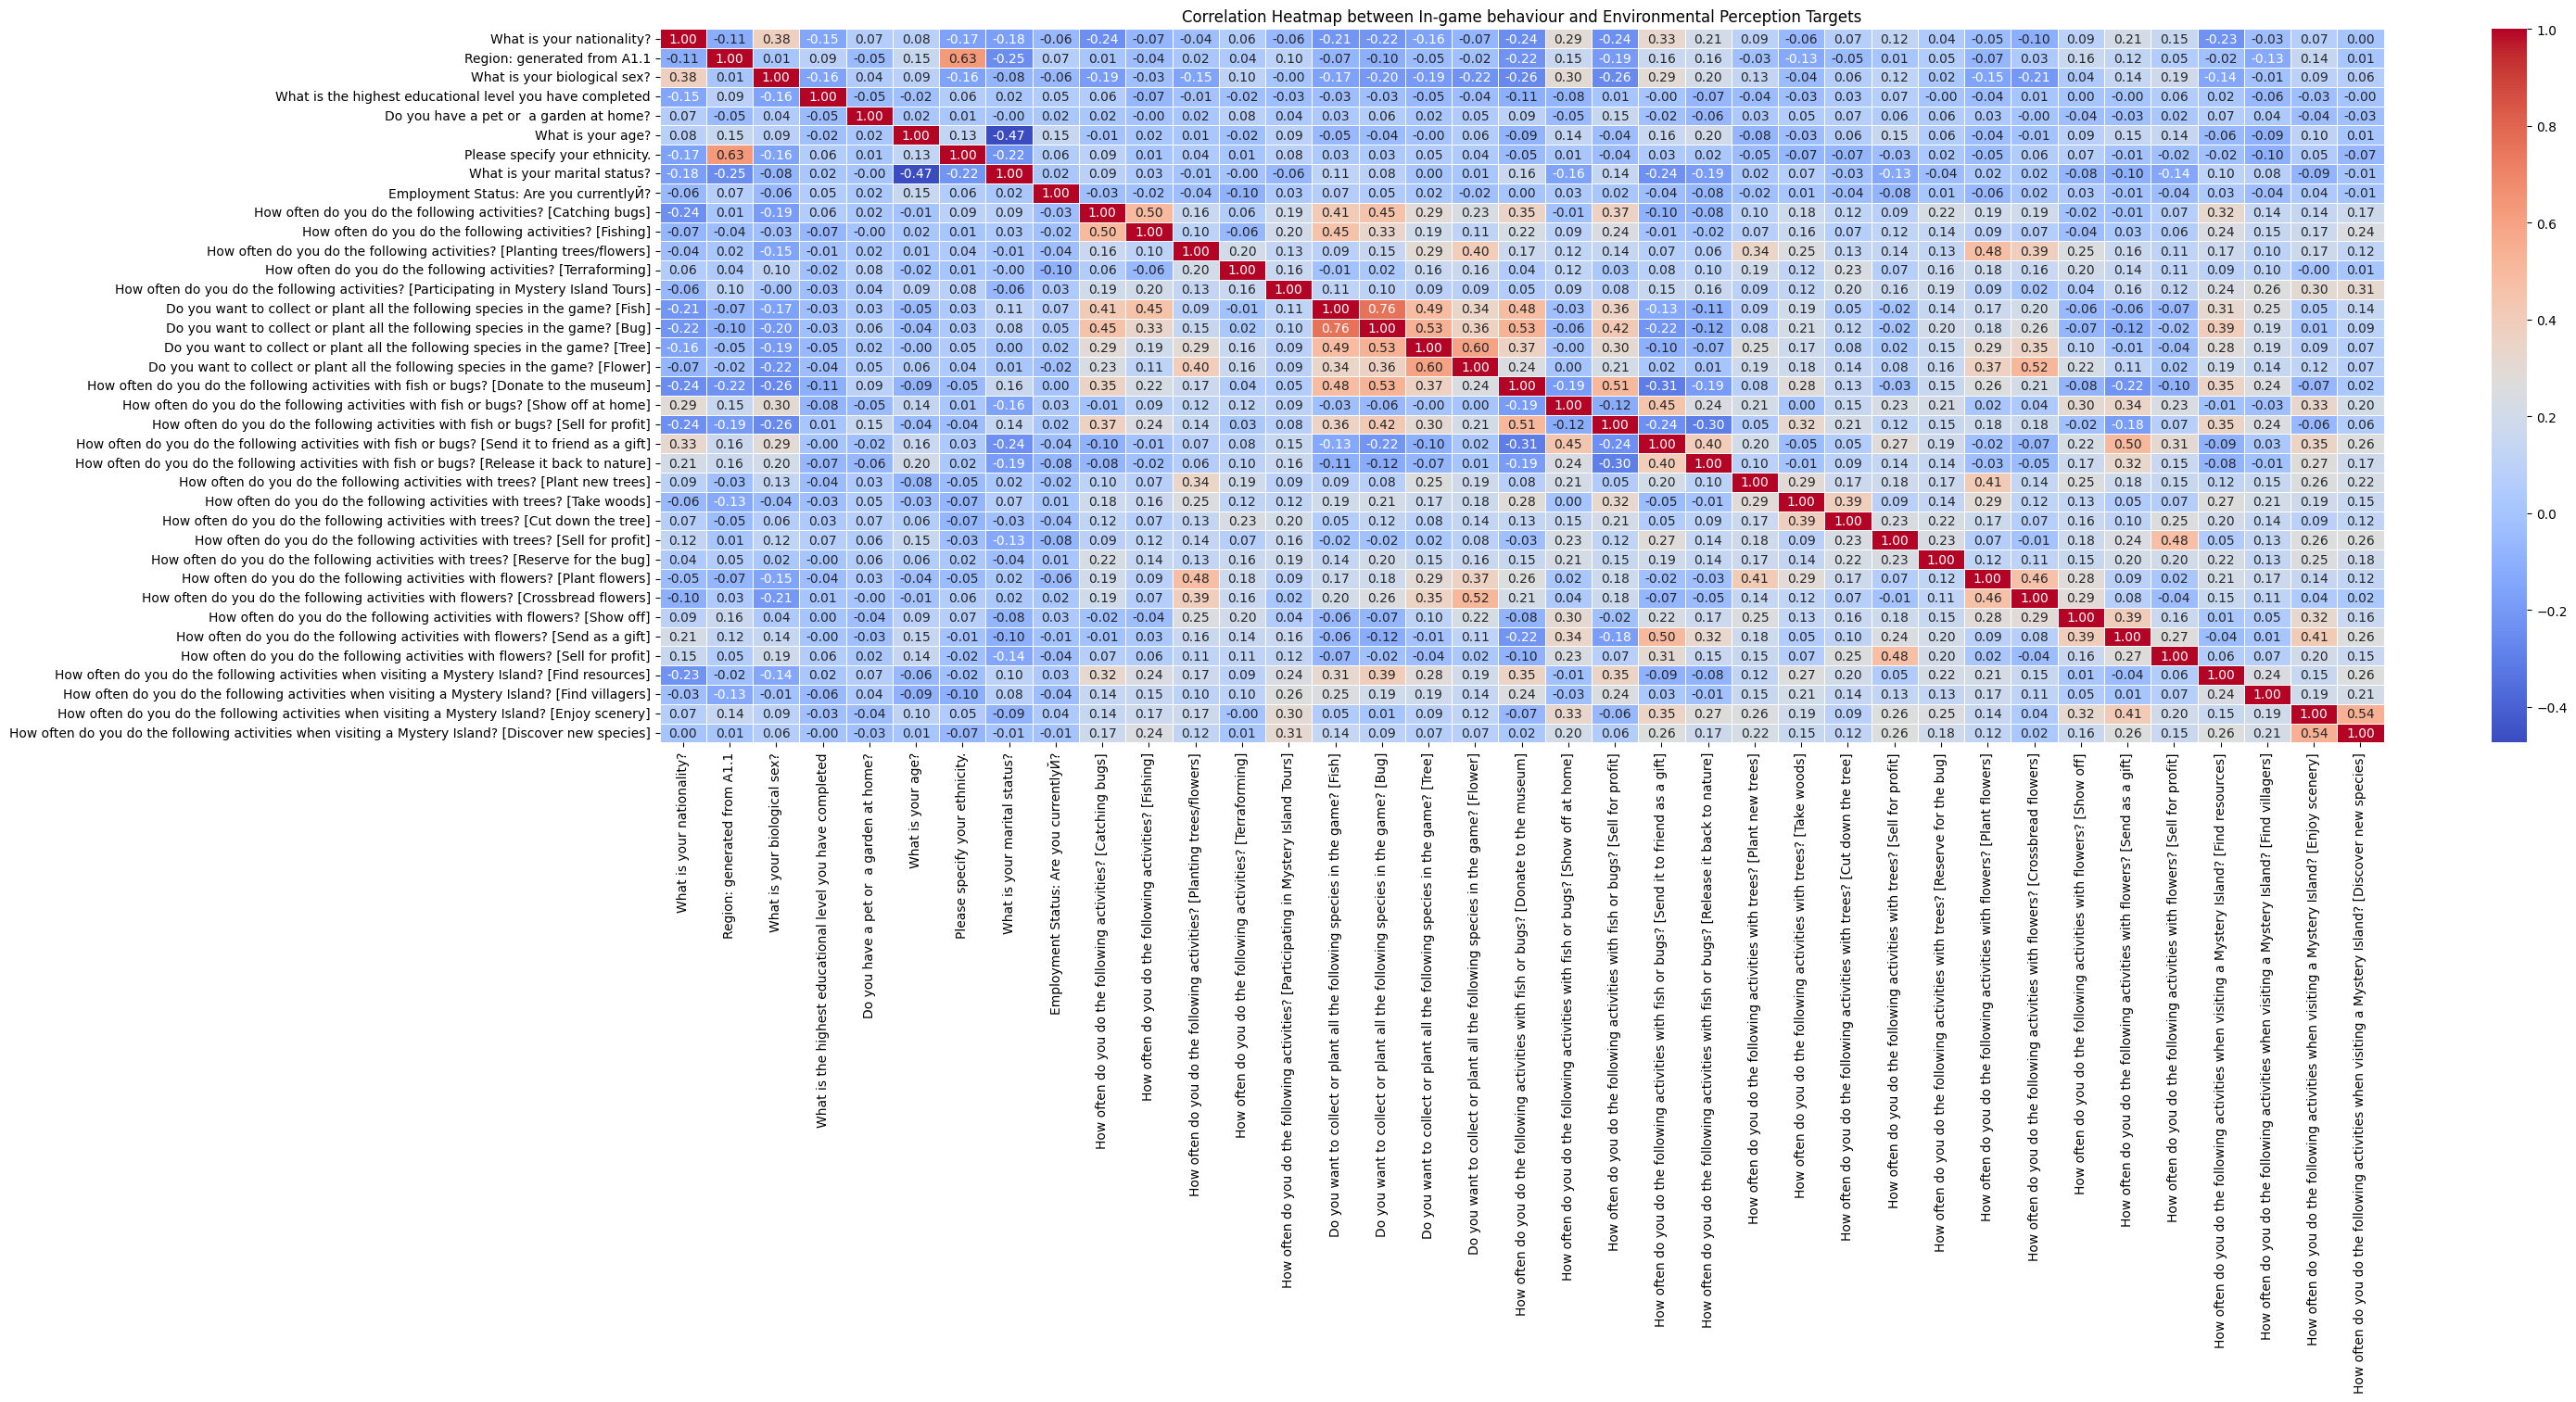

In [ ]:
df_combined_new3 = pd.concat([socio_demo_features, in_game_vars], axis=1)

# Calculate the correlation matrix
correlation_matrix3 = df_combined_new3.corr()

# Create a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix3, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap between In-game behaviour and Environmental Perception Targets")
plt.show()

#Trying to train a model that will choose top 3 most important features for each environmental perception

#Random Forest Classification - using top 3 features

Features used: ['What is your nationality?', 'Region: generated from A1.1', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support] on Test Set: 0.3854166666666667
Accuracy for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support] on Evaluation Set: 0.46875

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.43      0.12      0.19        24
           3       0.47      0.93      0.62        41
           4       0.57      0.15      0.24        27

    accuracy                           0.47        96
   macro avg       0.29      0.24      0.21        96
weighted avg       0.47      0.47      0.38        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


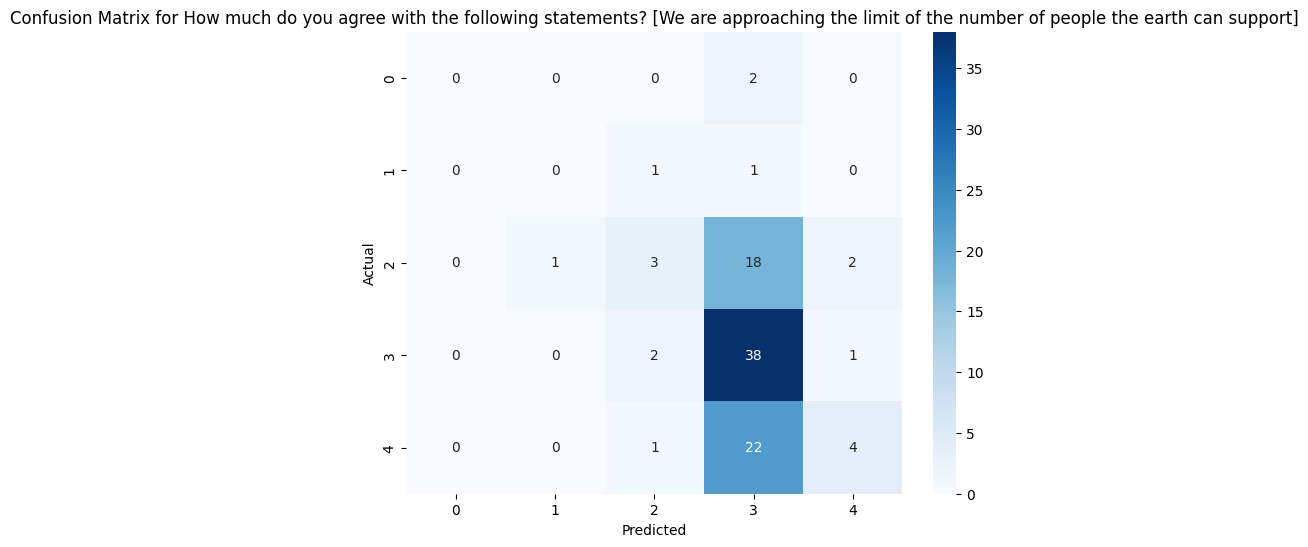




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is the highest educational level you have completed']
Accuracy for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.] on Test Set: 0.4270833333333333
Accuracy for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.] on Evaluation Set: 0.4583333333333333

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.14      0.08      0.10        13
           3       0.54      0.66      0.60        47
           4       0.39      0.36      0.38        33

    accuracy                           0.46        96
   macro avg       0.27      0.28      0.27        96
weighted avg       0.42      0.46      0.43        96
 

Unique Classes in Evaluation Set: [1, 2, 3, 4] 



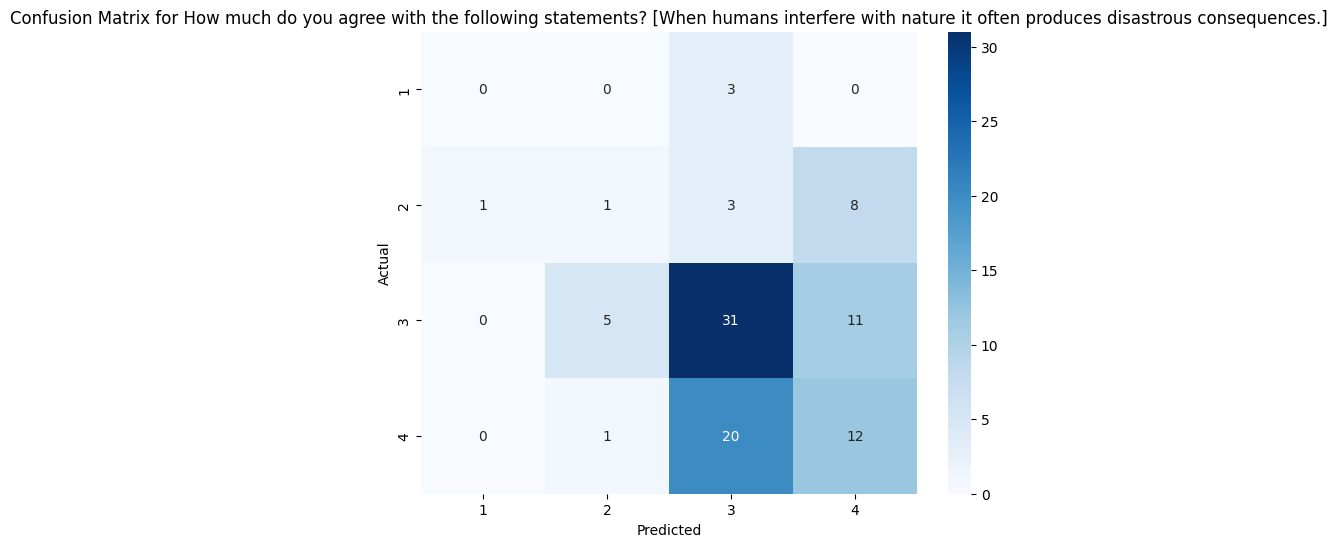




Features used: ['What is your nationality?', 'What is your marital status?', 'Please specify your ethnicity.']
Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.] on Test Set: 0.5833333333333334
Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.] on Evaluation Set: 0.46875

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.20      1.00      0.33         1
           2       0.17      0.09      0.12        11
           3       0.46      0.31      0.37        35
           4       0.52      0.68      0.59        47

    accuracy                           0.47        96
   macro avg       0.27      0.42      0.28        96
weighted avg       0.45      0.47      0.44        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


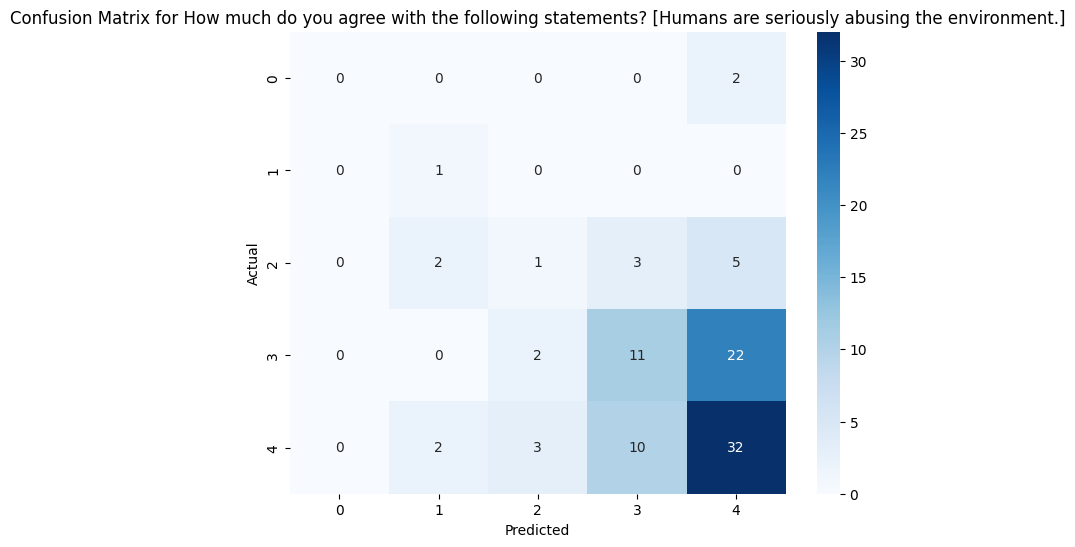




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your age?']
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.] on Test Set: 0.53125
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.] on Evaluation Set: 0.46875

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       0.50      0.44      0.47        39
           4       0.53      0.62      0.57        45

    accuracy                           0.47        96
   macro avg       0.21      0.21      0.21        96
weighted avg       0.45      0.47      0.46        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



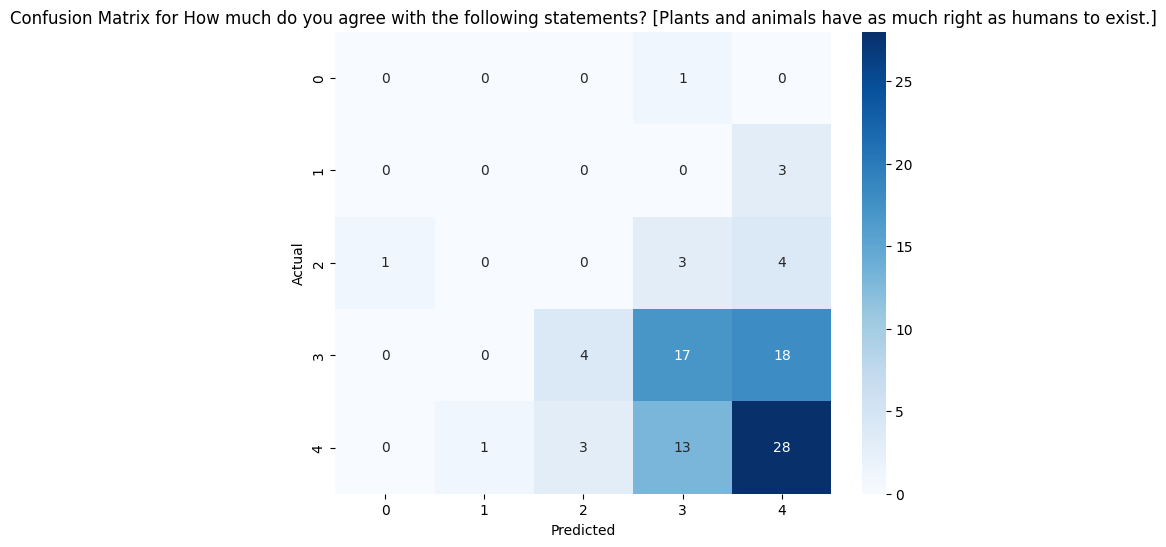




Features used: ['What is your nationality?', 'What is your biological sex?', 'Employment Status: Are you currentlyЙ?']
Accuracy for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.] on Test Set: 0.4583333333333333
Accuracy for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.] on Evaluation Set: 0.4270833333333333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        12
           3       0.45      0.43      0.44        42
           4       0.44      0.56      0.49        41

    accuracy                           0.43        96
   macro avg       0.18      0.20      0.19        96
weighted avg       0.39      0.43      0.40        96
 

Unique Classes in Eval

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

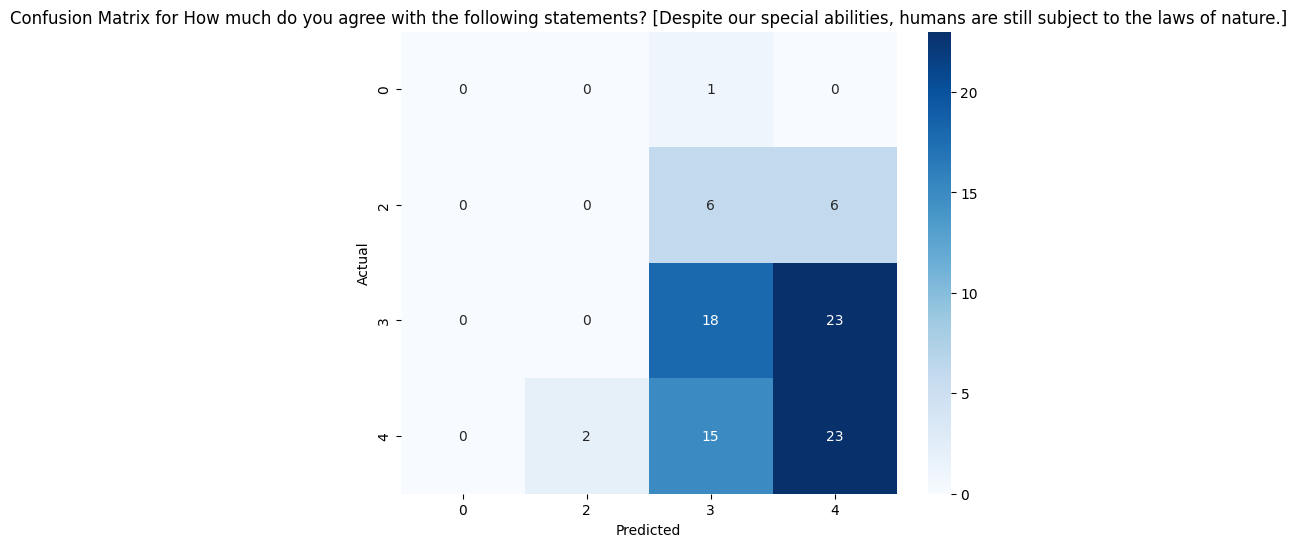




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'What is the highest educational level you have completed']
Accuracy for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.] on Test Set: 0.2604166666666667
Accuracy for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.] on Evaluation Set: 0.3229166666666667

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.33      0.18         3
           2       0.15      0.25      0.19        16
           3       0.45      0.38      0.41        47
           4       0.36      0.29      0.32        28

    accuracy                           0.32        96
   macro avg       0.22      0.25      0.22        96
weighted avg       0.36      0.32      0.33        96
 

Unique Classes i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


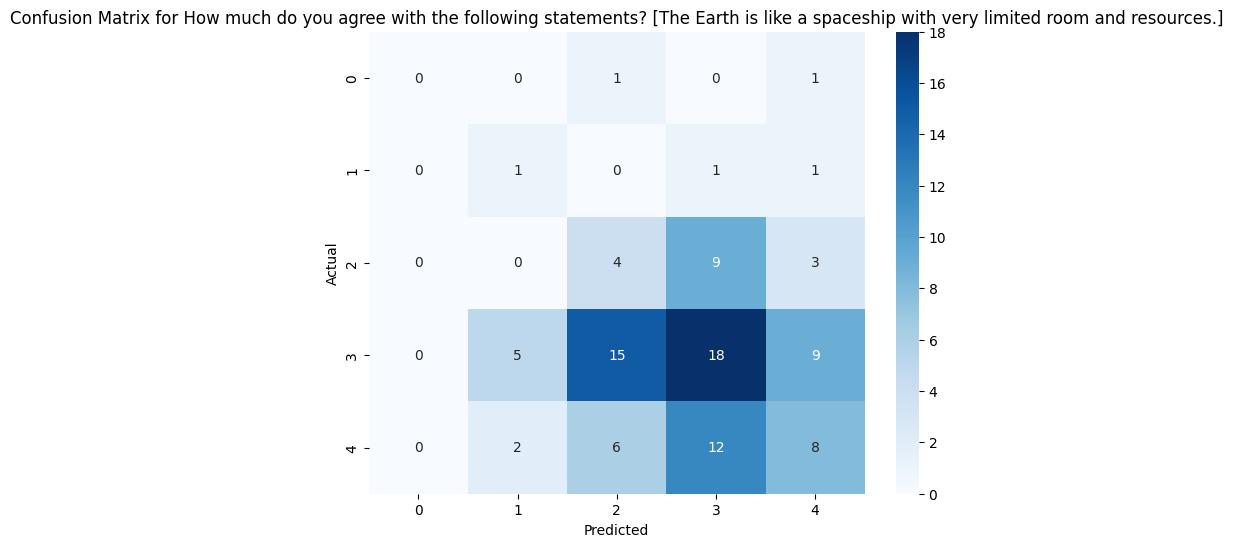




Features used: ['What is your nationality?', 'Please specify your ethnicity.', 'What is the highest educational level you have completed']
Accuracy for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.] on Test Set: 0.4583333333333333
Accuracy for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.] on Evaluation Set: 0.3333333333333333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.20      0.21      0.21        19
           3       0.35      0.42      0.38        36
           4       0.42      0.43      0.43        30

    accuracy                           0.33        96
   macro avg       0.19      0.21      0.20        96
weighted avg       0.30      0.33      0.32        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3,

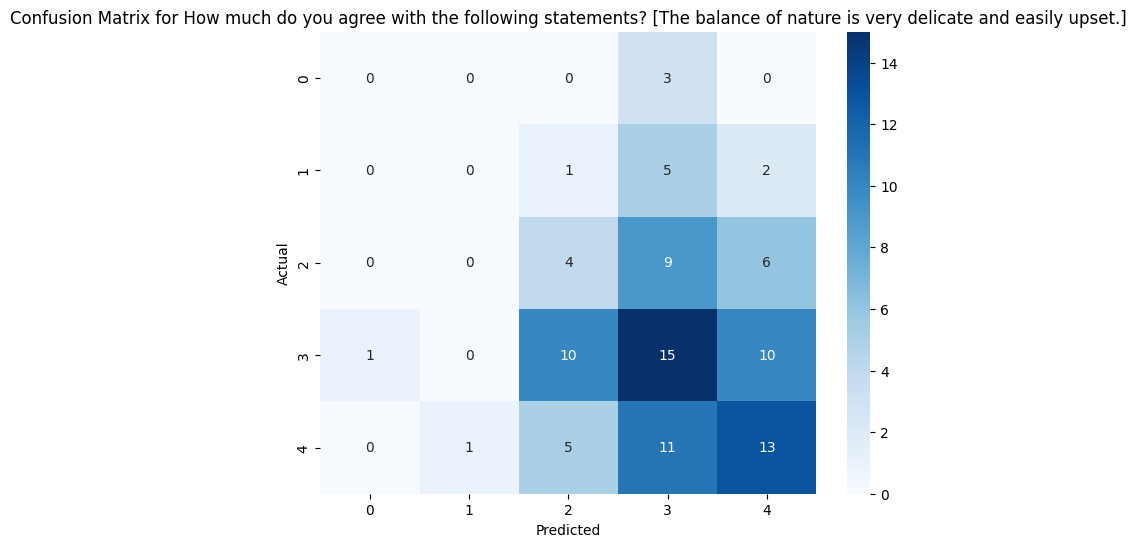




Features used: ['What is your nationality?', 'Please specify your ethnicity.', 'What is your age?']
Accuracy for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.] on Test Set: 0.46875
Accuracy for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.] on Evaluation Set: 0.4895833333333333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        12
           3       0.43      0.44      0.43        34
           4       0.54      0.65      0.59        49

    accuracy                           0.49        96
   macro avg       0.24      0.27      0.26        96
weighted avg       0.43      0.49      0.46        96
 

Unique Classes in Evaluation Set: [0, 2, 3, 4] 



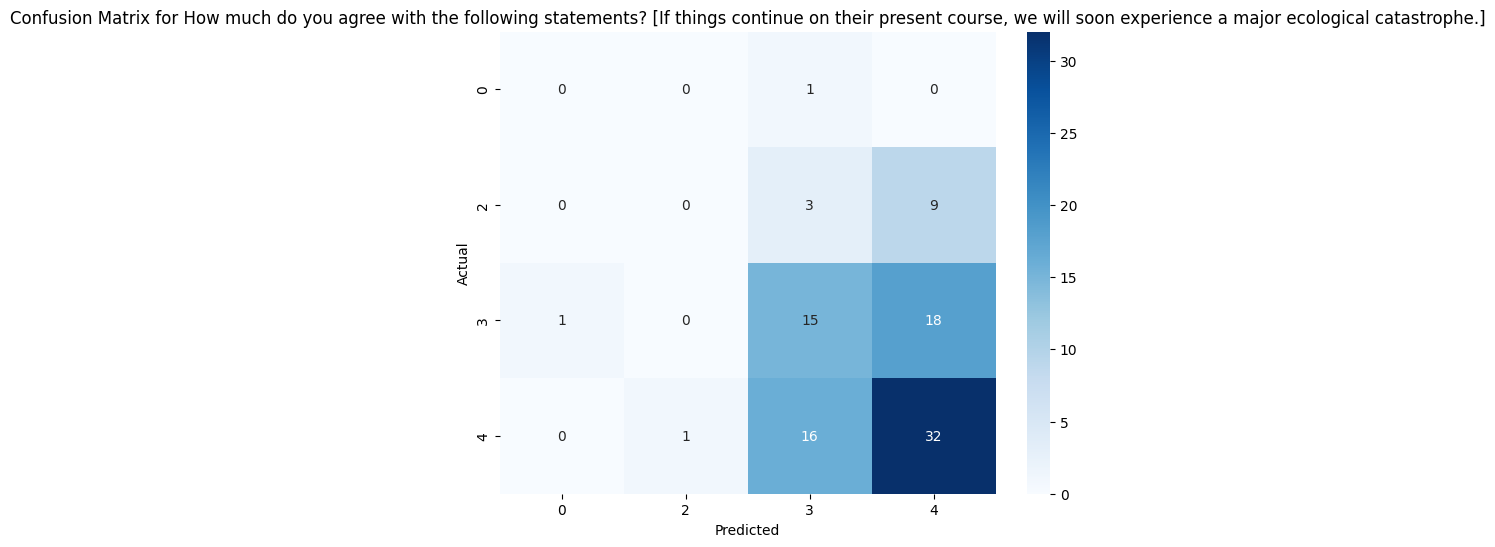




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.] on Test Set: 0.3125
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.] on Evaluation Set: 0.3125

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.31      0.74      0.44        19
           2       0.31      0.17      0.22        29
           3       0.22      0.26      0.24        23
           4       0.71      0.28      0.40        18

    accuracy                           0.31        96
   macro avg       0.31      0.29      0.26        96
weighted avg       0.34      0.31      0.29        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



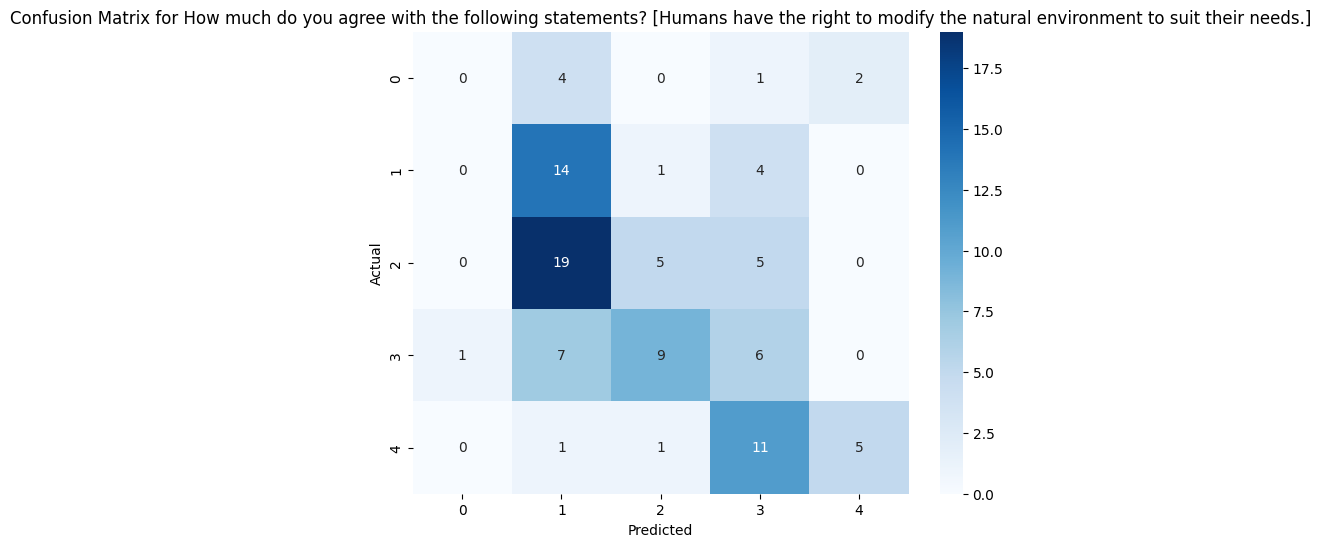




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'Please specify your ethnicity.']
Accuracy for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable] on Test Set: 0.3645833333333333
Accuracy for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable] on Evaluation Set: 0.3645833333333333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.22      0.36      0.28        11
           2       0.46      0.61      0.52        36
           3       0.35      0.32      0.33        28
           4       0.00      0.00      0.00        16

    accuracy                           0.36        96
   macro avg       0.21      0.26      0.23        96
weighted avg       0.30      0.36      0.33        96
 

Unique Classes in Evaluation Set: [0, 1, 2

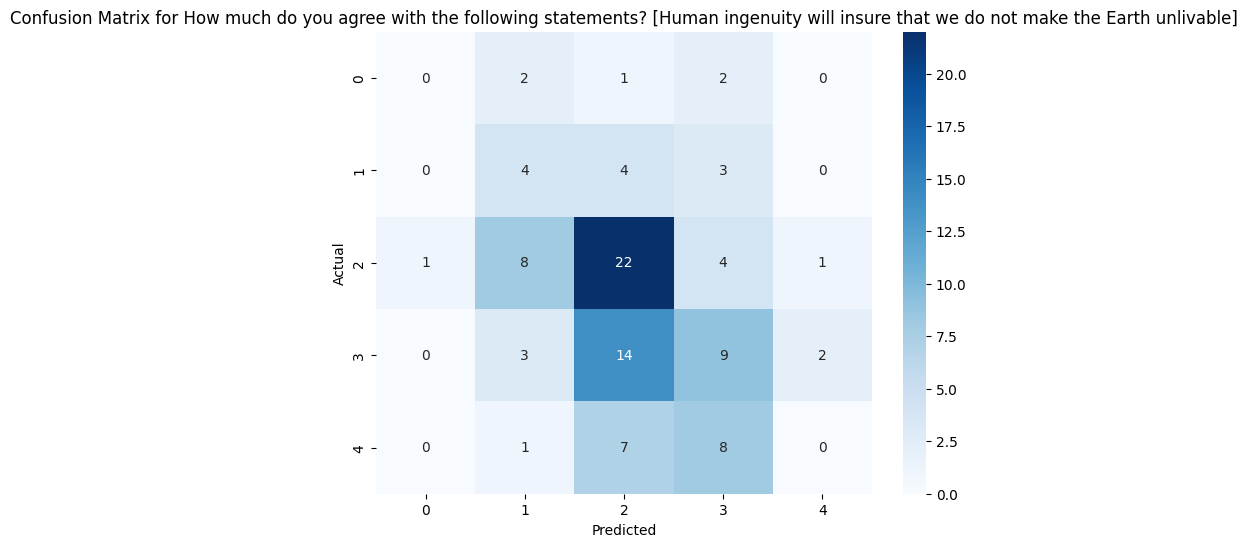




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'Region: generated from A1.1']
Accuracy for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.] on Test Set: 0.34375
Accuracy for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.] on Evaluation Set: 0.40625

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        10
           2       0.45      0.41      0.43        22
           3       0.38      0.65      0.48        34
           4       0.47      0.27      0.34        30

    accuracy                           0.41        96
   macro avg       0.26      0.26      0.25        96
weighted avg       0.38      0.41      0.37        96
 

Unique Classes in Evaluation Set: [1, 2, 3,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

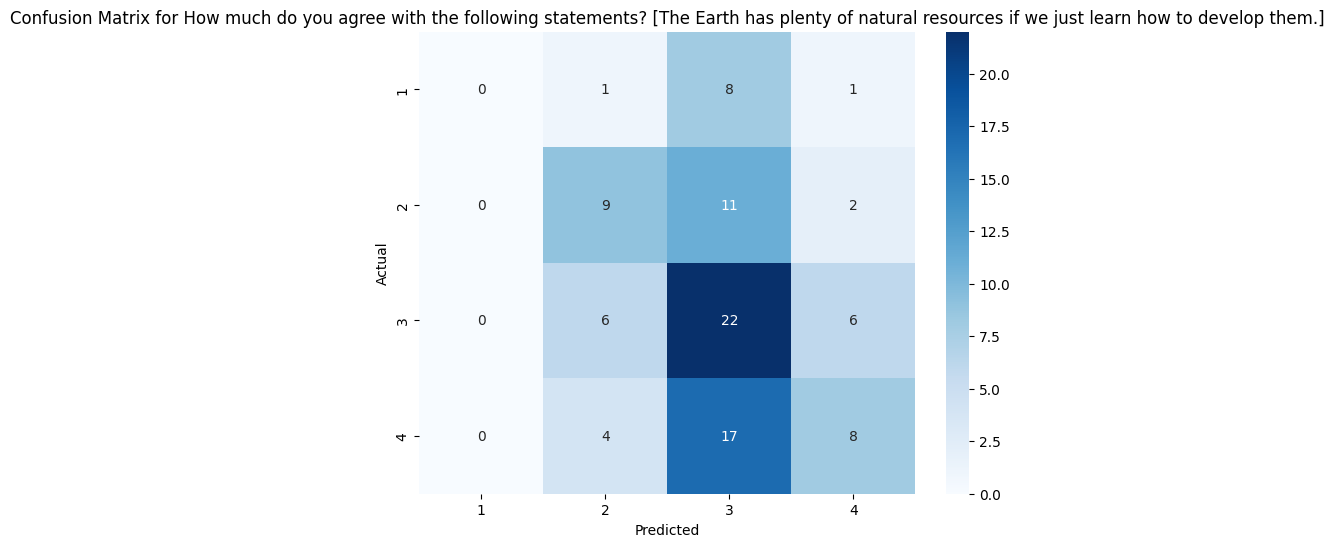




Features used: ['What is your nationality?', 'What is your biological sex?', 'Please specify your ethnicity.']
Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations] on Test Set: 0.3333333333333333
Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations] on Evaluation Set: 0.34375

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        14
           1       0.44      0.58      0.50        31
           2       0.29      0.09      0.14        22
           3       0.16      0.21      0.18        14
           4       0.40      0.40      0.40        15

    accuracy                           0.34        96
   macro avg       0.31      0.31      0.30        96
weighted avg       0.33      0.34      0.32        96
 

Unique Classe

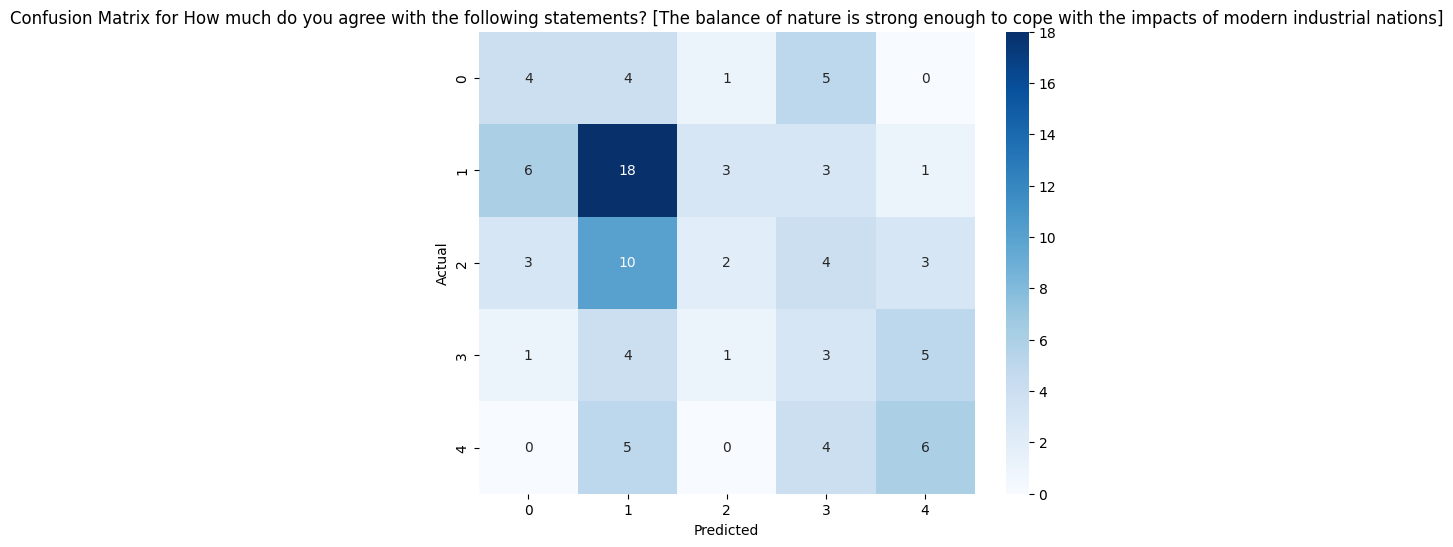




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.] on Test Set: 0.3645833333333333
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.] on Evaluation Set: 0.3958333333333333

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        36
           1       0.24      0.40      0.30        15
           2       0.20      0.06      0.09        18
           3       0.35      0.33      0.34        21
           4       0.20      0.17      0.18         6

    accuracy                           0.40        96
   macro avg       0.31      0.32      0.30        96
weighted avg       0.37      0.40      0.37        96
 

Unique Classes in Evaluation

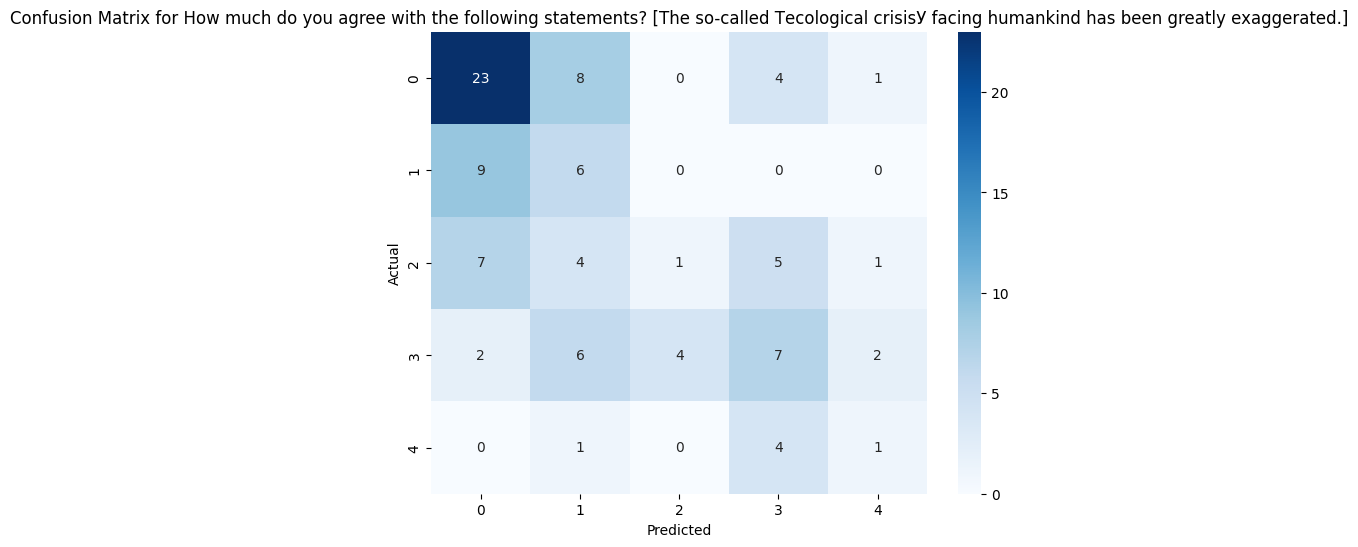




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.] on Test Set: 0.4270833333333333
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.] on Evaluation Set: 0.375

              precision    recall  f1-score   support

           0       0.38      0.60      0.47        25
           1       0.40      0.31      0.35        26
           2       0.27      0.21      0.24        14
           3       0.45      0.42      0.43        24
           4       0.00      0.00      0.00         7

    accuracy                           0.38        96
   macro avg       0.30      0.31      0.30        96
weighted avg       0.36      0.38      0.36        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



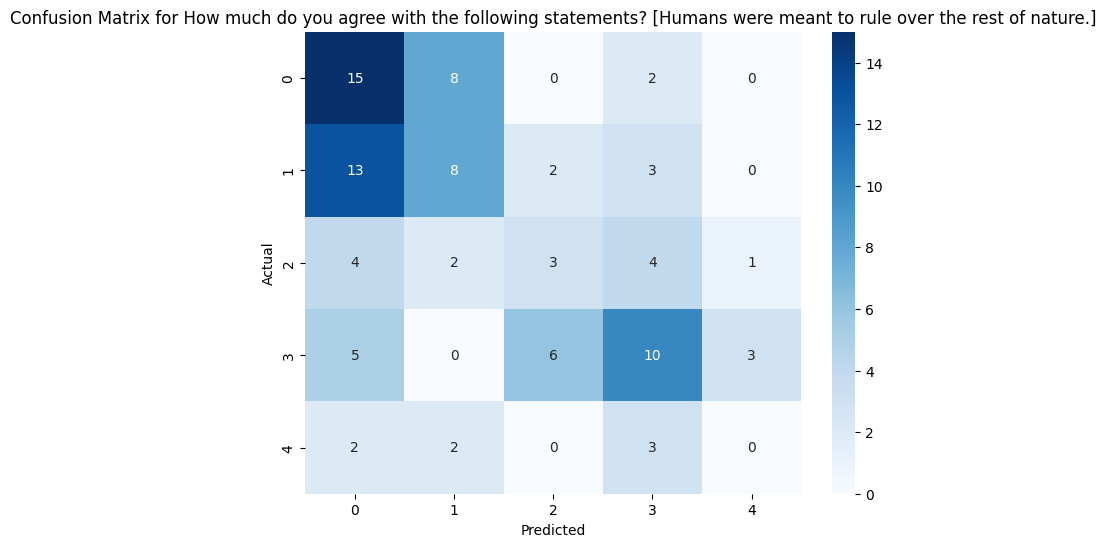




Features used: ['What is your nationality?', 'What is your biological sex?', 'Employment Status: Are you currentlyЙ?']
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.] on Test Set: 0.3541666666666667
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.] on Evaluation Set: 0.3229166666666667

              precision    recall  f1-score   support

           0       0.28      0.36      0.31        14
           1       0.33      0.31      0.32        13
           2       0.21      0.22      0.21        27
           3       0.47      0.54      0.50        26
           4       0.29      0.12      0.17        16

    accuracy                           0.32        96
   macro avg       0.31      0.31      0.30        96
weighted avg       0.32      0.32      0.31        96
 

Unique Cla

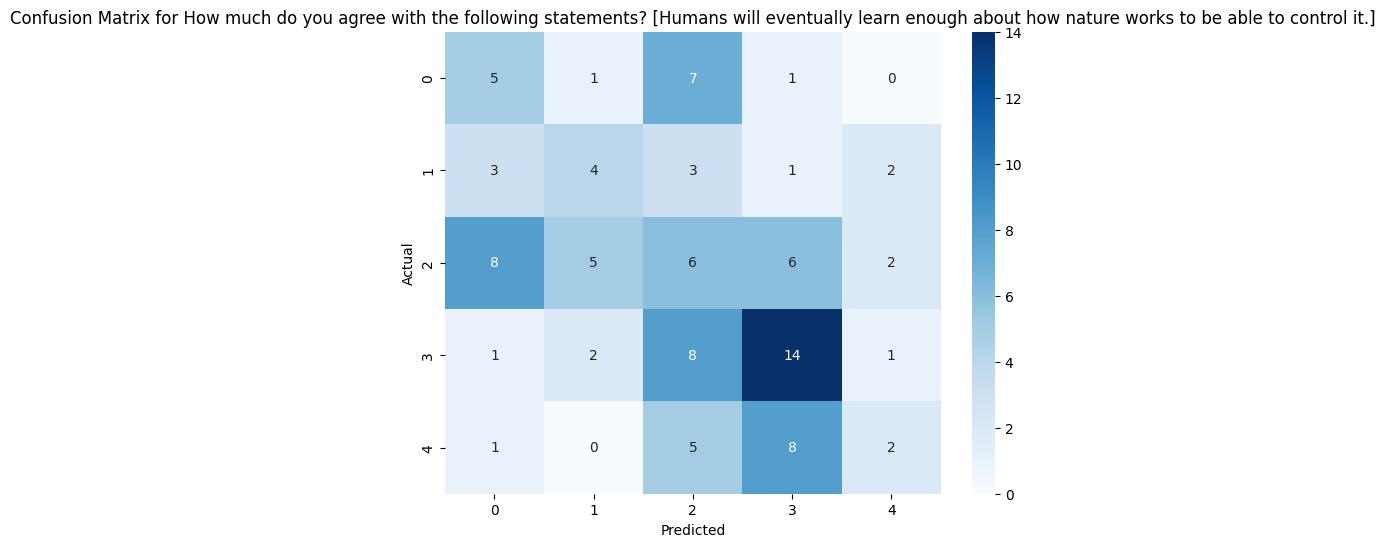

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



# Create a dictionary to store classifiers for each environmental perception variable
classifiers = {}

# Iterate through each environmental perception variable
for target, feature_scores_df in best_features_per_target.items():
    # Select the top 3 features for the current environmental variable
    selected_features = feature_scores_df.nlargest(3, 'Score')['Specs'].tolist()
    # Extract the features and target variable for the current environmental variable
    X = socio_demo_features[selected_features]
    y = environmental_perception_classes[target]

    # Train-test split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Train a RandomForestClassifier for the current environmental variable
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Print the features used for the current target
    print(f'Features used: {selected_features}')

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy for {target} on Test Set: {accuracy_test}')

    # Make predictions on the evaluation set
    y_pred_eval = classifier.predict(X_eval)

    # Evaluate the model on the evaluation set
    accuracy_eval = accuracy_score(y_eval, y_pred_eval)
    print(f'Accuracy for {target} on Evaluation Set: {accuracy_eval}\n')

     # Additional evaluation metrics
    print(classification_report(y_eval, y_pred_eval,zero_division='warn'), '\n')

    unique_classes = list(set(y_eval))
    print(f'Unique Classes in Evaluation Set: {unique_classes} \n')

    #Confusion matrix
    conf_matrix = confusion_matrix(y_eval, y_pred_eval, labels=unique_classes)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
    plt.title(f'Confusion Matrix for {target}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('\n\n')

    # Save the classifier to the dictionary
    classifiers[target] = classifier

# Random Forest Classification - using top 2 features

Features used: ['What is your nationality?', 'Region: generated from A1.1']
Accuracy for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support] on Test Set: 0.375
Accuracy for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support] on Evaluation Set: 0.46875 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.41      0.29      0.34        24
           3       0.46      0.80      0.59        41
           4       0.71      0.19      0.29        27

    accuracy                           0.47        96
   macro avg       0.32      0.26      0.24        96
weighted avg       0.50      0.47      0.42        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


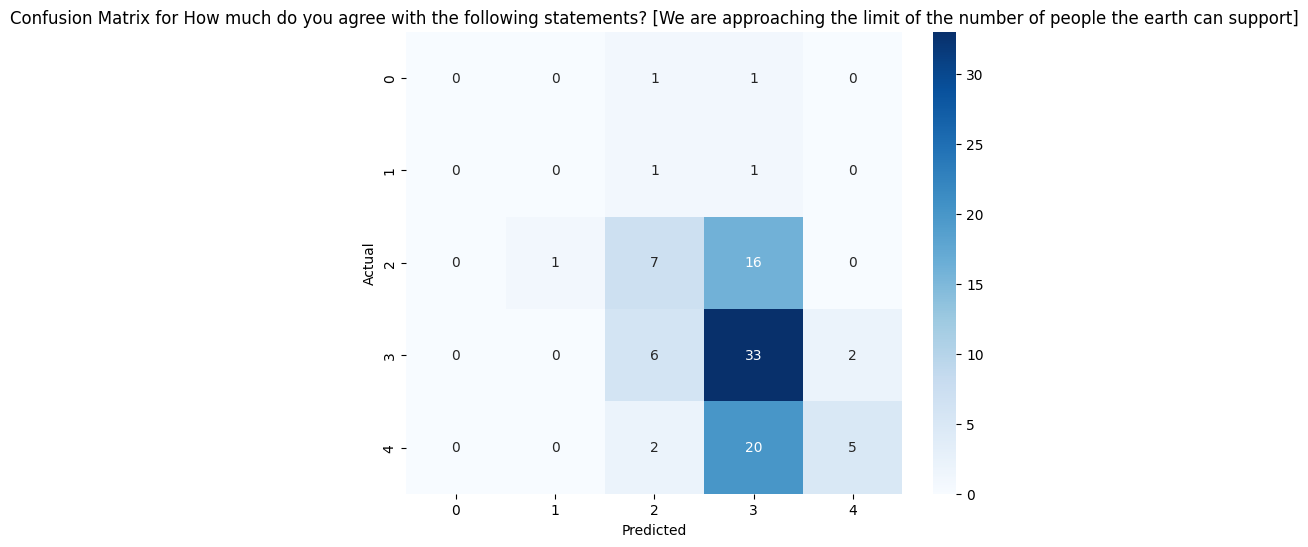




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.] on Test Set: 0.3541666666666667
Accuracy for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.] on Evaluation Set: 0.4791666666666667 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        13
           3       0.53      0.62      0.57        47
           4       0.44      0.52      0.47        33

    accuracy                           0.48        96
   macro avg       0.24      0.28      0.26        96
weighted avg       0.41      0.48      0.44        96
 

Unique Classes in Evaluation Set: [1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


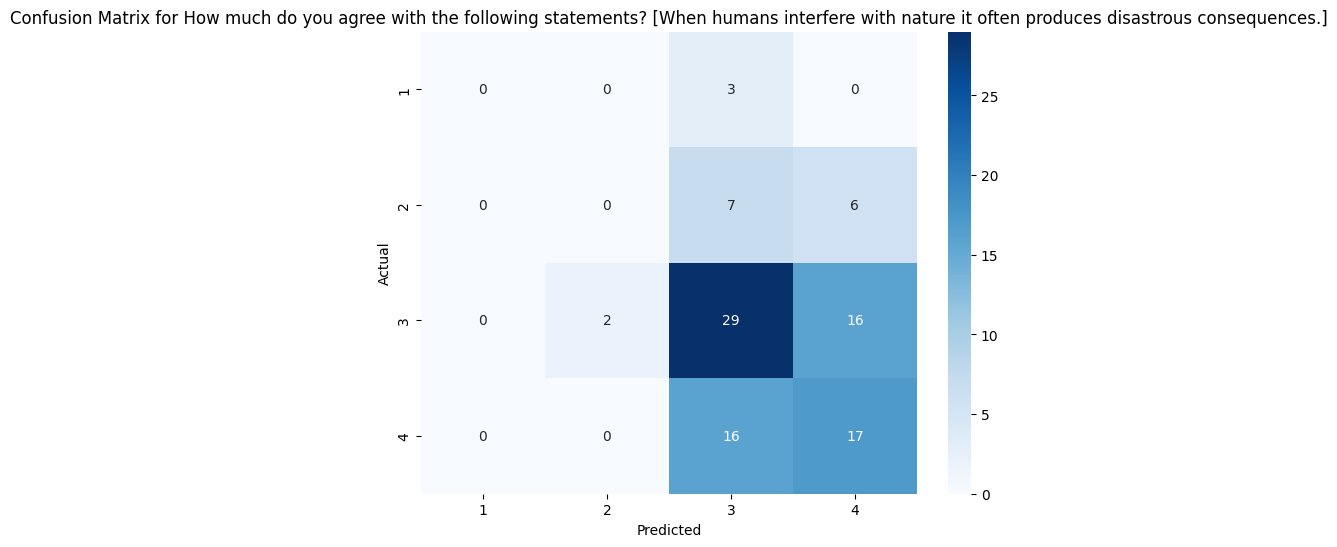




Features used: ['What is your nationality?', 'What is your marital status?']
Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.] on Test Set: 0.59375
Accuracy for How much do you agree with the following statements? [Humans are seriously abusing the environment.] on Evaluation Set: 0.4375 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00        11
           3       0.35      0.34      0.35        35
           4       0.53      0.62      0.57        47

    accuracy                           0.44        96
   macro avg       0.28      0.39      0.32        96
weighted avg       0.39      0.44      0.41        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


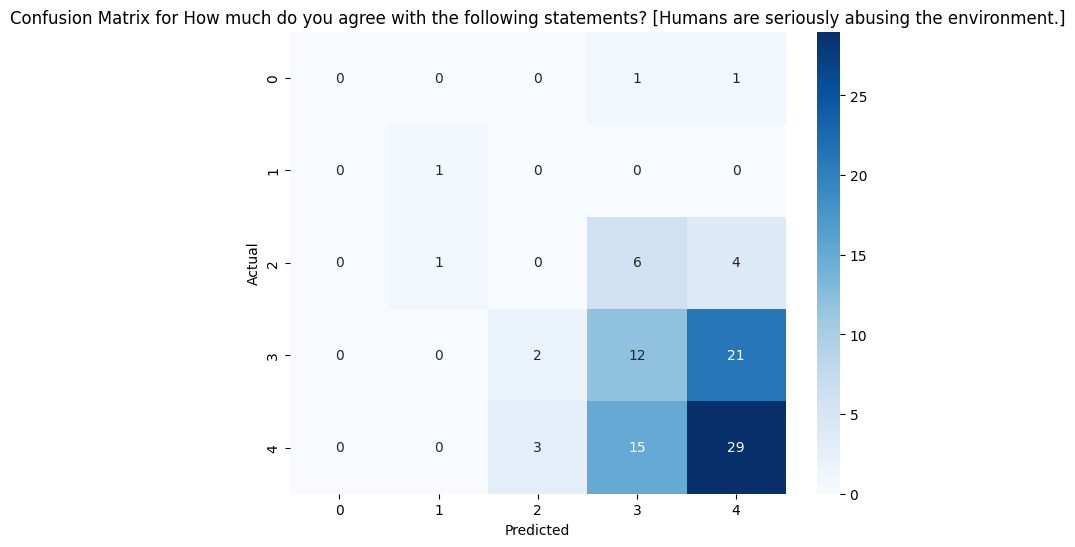




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.] on Test Set: 0.6354166666666666
Accuracy for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.] on Evaluation Set: 0.5416666666666666 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         8
           3       0.53      0.46      0.49        39
           4       0.56      0.76      0.64        45

    accuracy                           0.54        96
   macro avg       0.22      0.24      0.23        96
weighted avg       0.48      0.54      0.50        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


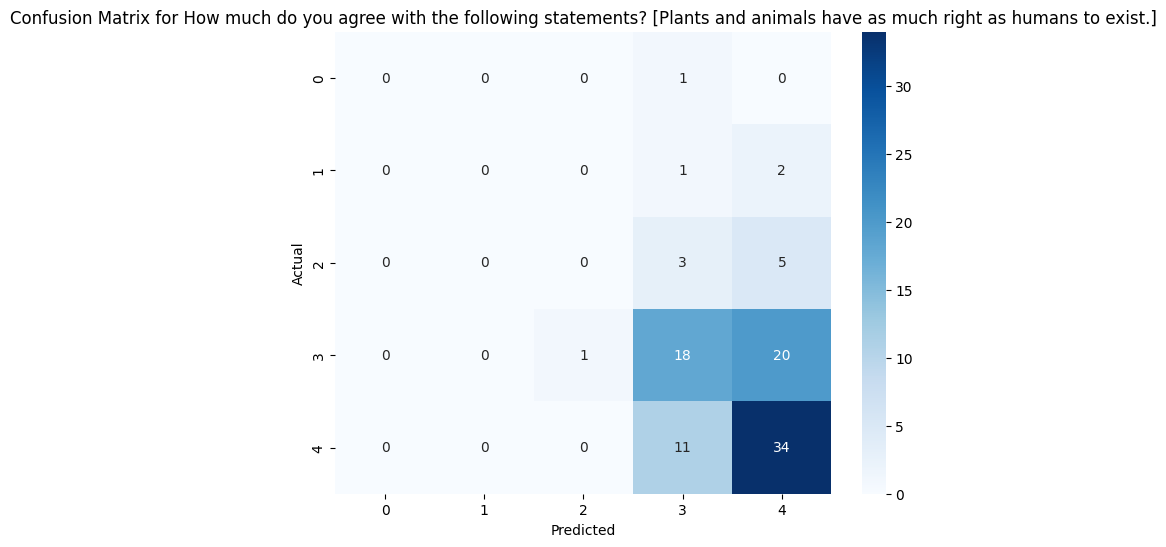




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.] on Test Set: 0.46875
Accuracy for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.] on Evaluation Set: 0.46875 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        12
           3       0.49      0.43      0.46        42
           4       0.48      0.66      0.56        41

    accuracy                           0.47        96
   macro avg       0.19      0.22      0.20        96
weighted avg       0.42      0.47      0.44        96
 

Unique Classes in Evaluation Set: [0, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

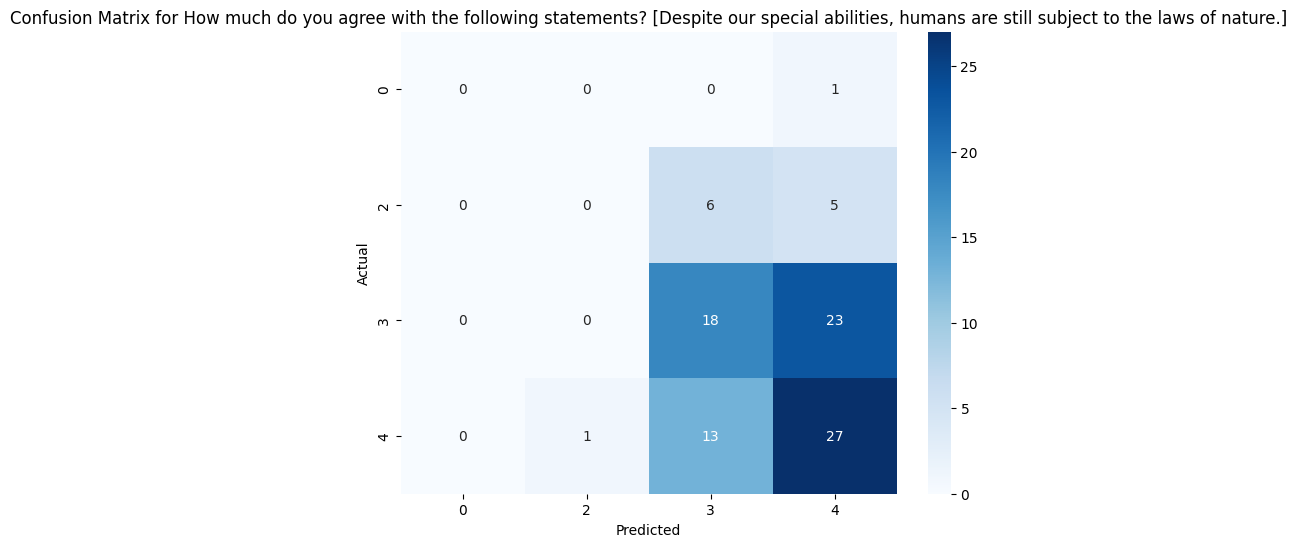




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?']
Accuracy for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.] on Test Set: 0.3229166666666667
Accuracy for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.] on Evaluation Set: 0.4166666666666667 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.33      0.50         3
           2       0.18      0.25      0.21        16
           3       0.50      0.64      0.56        47
           4       0.42      0.18      0.25        28

    accuracy                           0.42        96
   macro avg       0.42      0.28      0.30        96
weighted avg       0.43      0.42      0.40        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



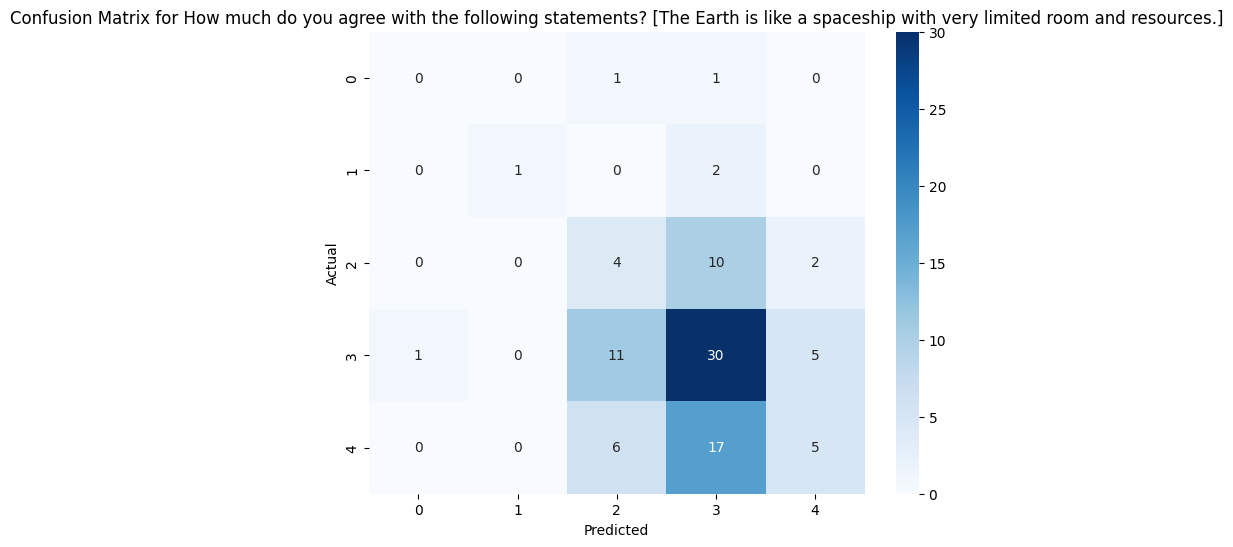




Features used: ['What is your nationality?', 'Please specify your ethnicity.']
Accuracy for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.] on Test Set: 0.4895833333333333
Accuracy for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.] on Evaluation Set: 0.3854166666666667 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.22      0.21      0.22        19
           3       0.42      0.69      0.53        36
           4       0.44      0.27      0.33        30

    accuracy                           0.39        96
   macro avg       0.22      0.23      0.22        96
weighted avg       0.34      0.39      0.34        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


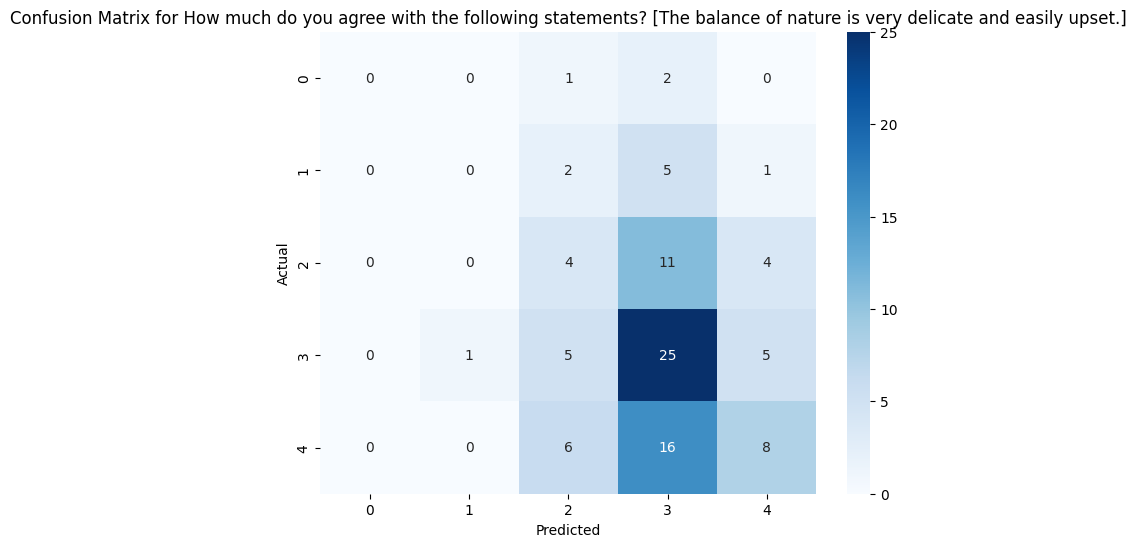




Features used: ['What is your nationality?', 'Please specify your ethnicity.']
Accuracy for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.] on Test Set: 0.5729166666666666
Accuracy for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.] on Evaluation Set: 0.5104166666666666 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        12
           3       0.44      0.32      0.37        34
           4       0.57      0.78      0.66        49

    accuracy                           0.51        96
   macro avg       0.20      0.22      0.21        96
weighted avg       0.45      0.51      0.47        96
 

Unique Classes in E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

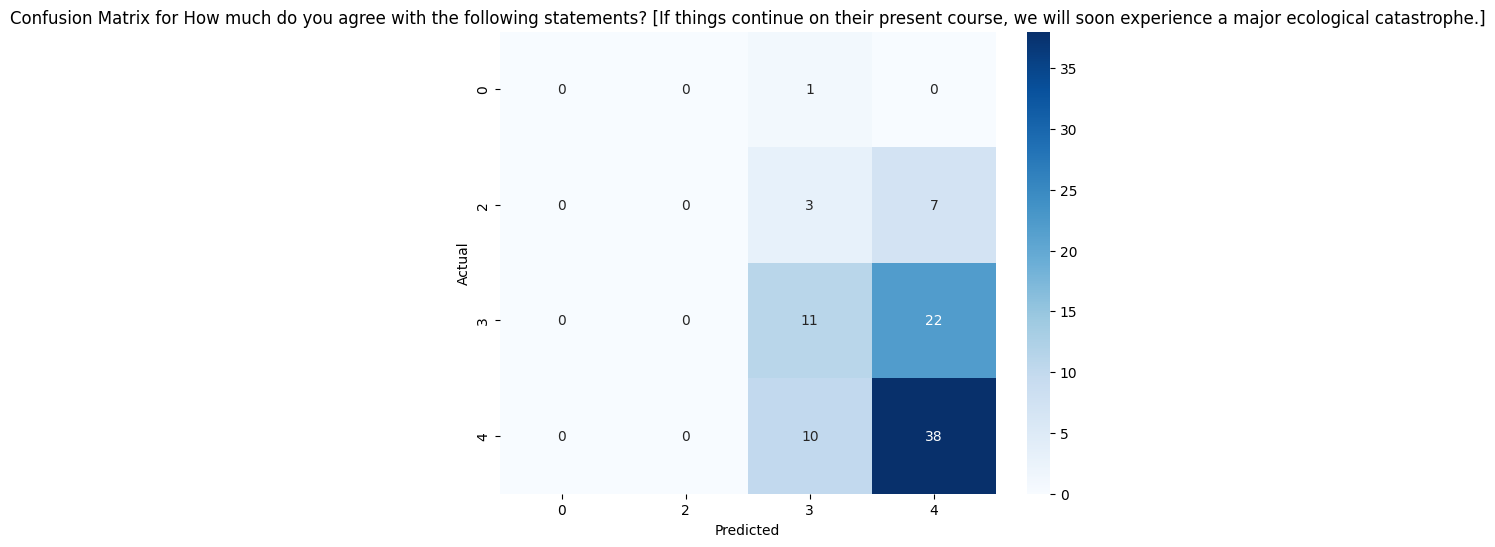




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.] on Test Set: 0.2708333333333333
Accuracy for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.] on Evaluation Set: 0.4270833333333333 

              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.39      0.74      0.51        19
           2       0.54      0.45      0.49        29
           3       0.32      0.35      0.33        23
           4       0.71      0.28      0.40        18

    accuracy                           0.43        96
   macro avg       0.44      0.39      0.38        96
weighted avg       0.47      0.43      0.42        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



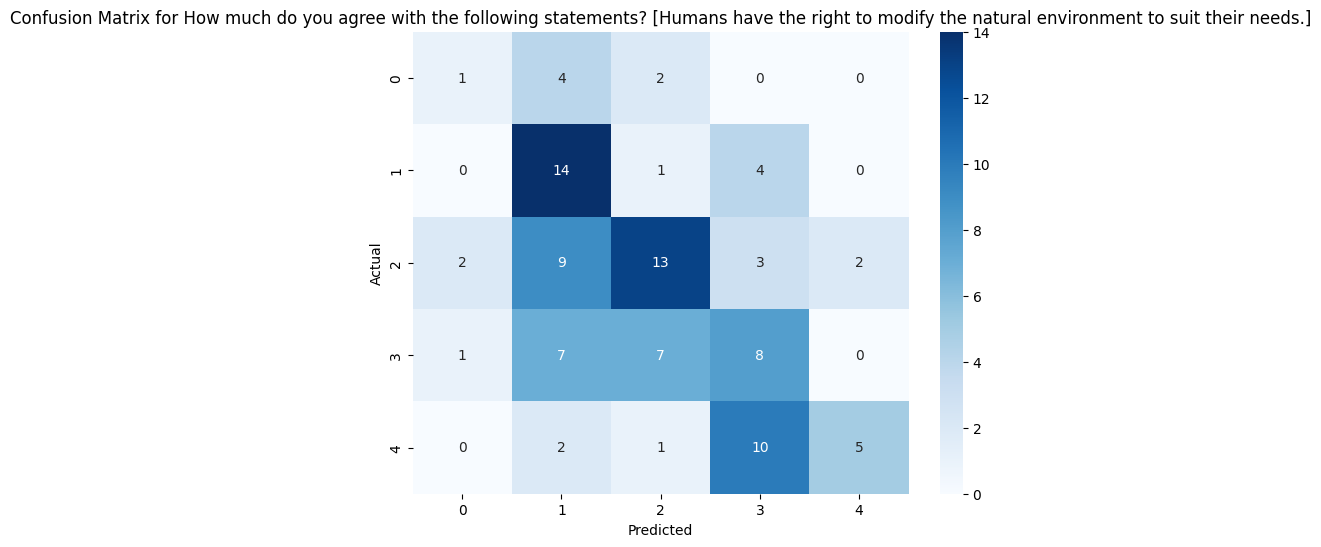




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?']
Accuracy for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable] on Test Set: 0.34375
Accuracy for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable] on Evaluation Set: 0.375 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.20      0.36      0.26        11
           2       0.48      0.58      0.53        36
           3       0.39      0.39      0.39        28
           4       0.00      0.00      0.00        16

    accuracy                           0.38        96
   macro avg       0.21      0.27      0.24        96
weighted avg       0.32      0.38      0.34        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



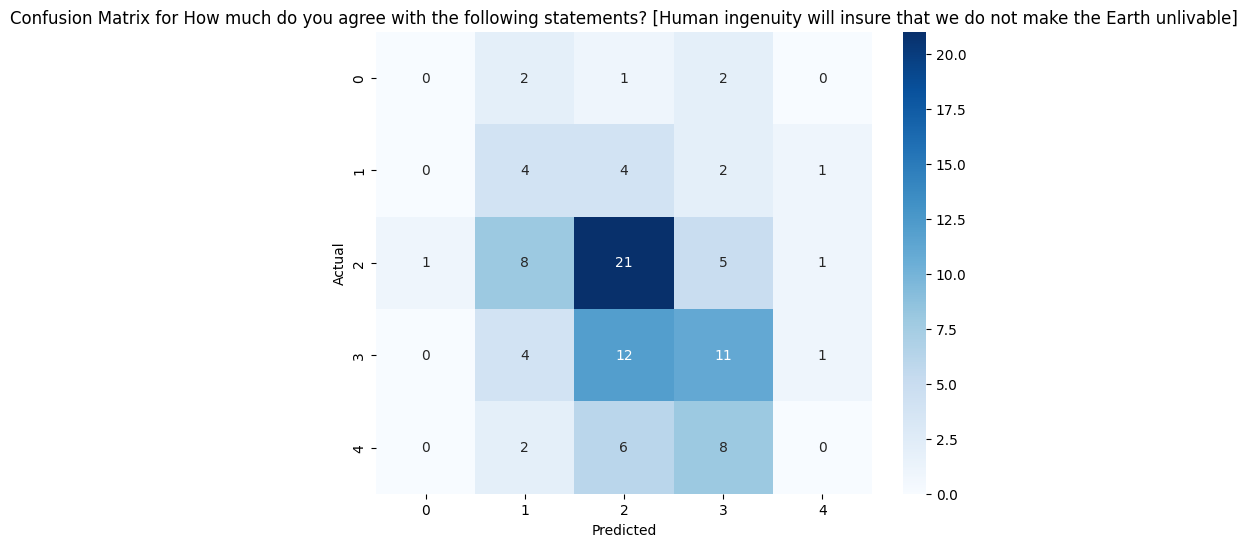




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?']
Accuracy for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.] on Test Set: 0.34375
Accuracy for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.] on Evaluation Set: 0.4166666666666667 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        10
           2       0.50      0.41      0.45        22
           3       0.37      0.65      0.47        34
           4       0.53      0.30      0.38        30

    accuracy                           0.42        96
   macro avg       0.28      0.27      0.26        96
weighted avg       0.41      0.42      0.39        96
 

Unique Classes in Evaluation Set: [1, 2, 3, 4] 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


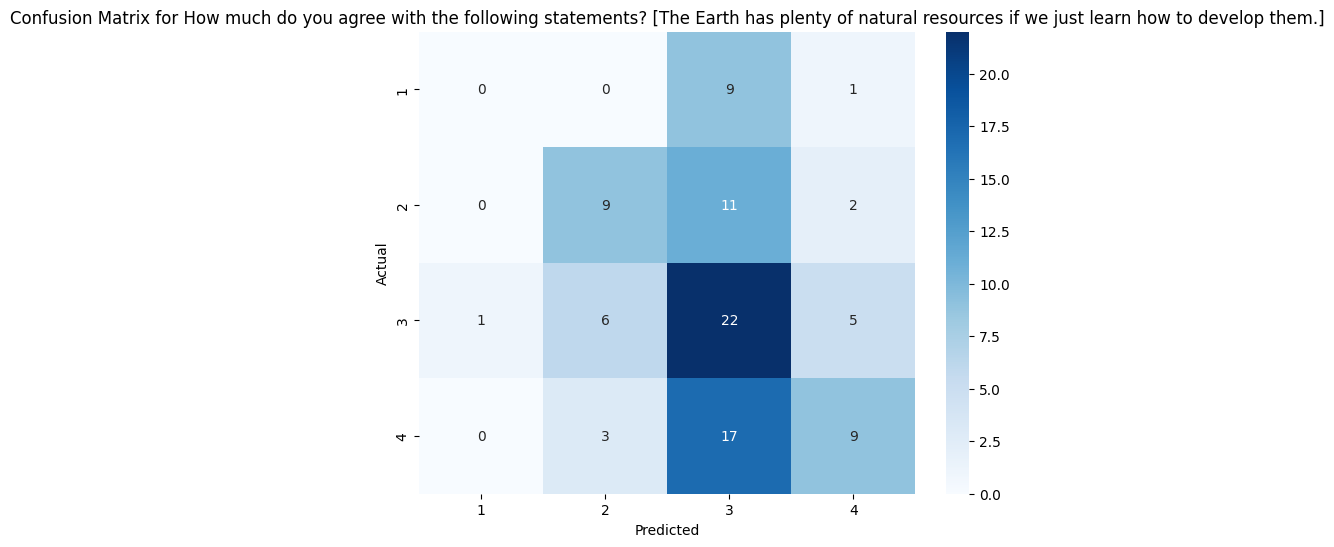




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations] on Test Set: 0.3229166666666667
Accuracy for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations] on Evaluation Set: 0.3125 

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        14
           1       0.41      0.55      0.47        31
           2       0.12      0.05      0.07        22
           3       0.14      0.21      0.17        14
           4       0.44      0.47      0.45        15

    accuracy                           0.31        96
   macro avg       0.26      0.28      0.27        96
weighted avg       0.28      0.31      0.29        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 

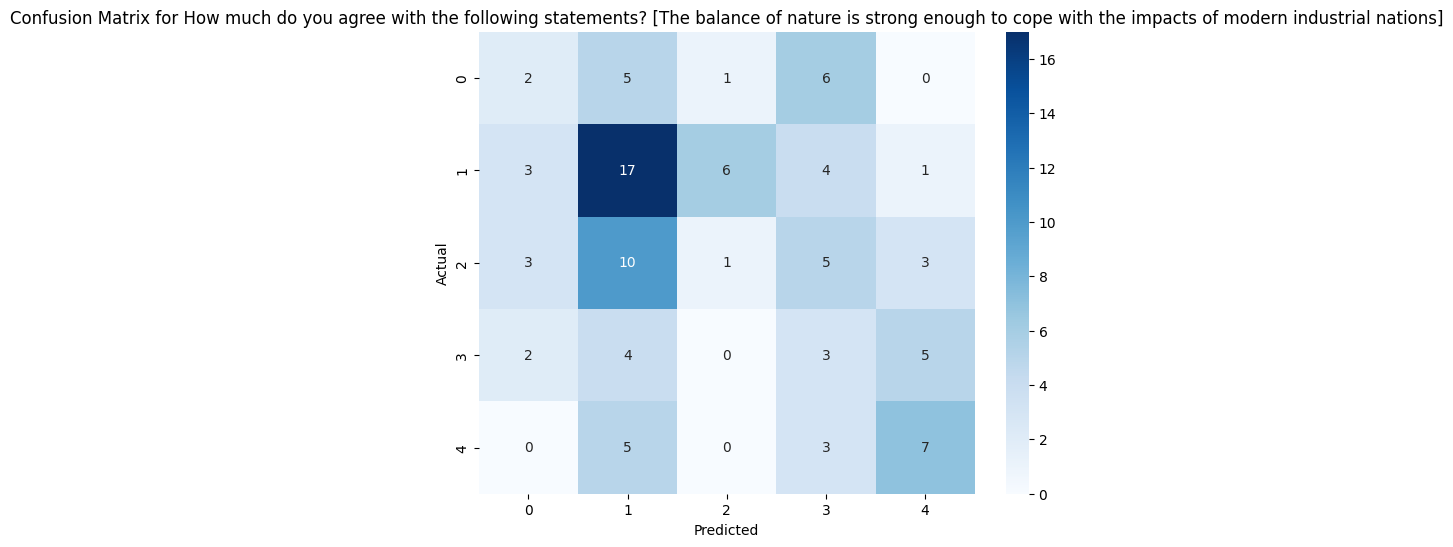




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.] on Test Set: 0.375
Accuracy for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.] on Evaluation Set: 0.3854166666666667 

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        36
           1       0.22      0.33      0.26        15
           2       0.00      0.00      0.00        18
           3       0.32      0.38      0.35        21
           4       0.25      0.17      0.20         6

    accuracy                           0.39        96
   macro avg       0.27      0.30      0.28        96
weighted avg       0.33      0.39      0.35        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



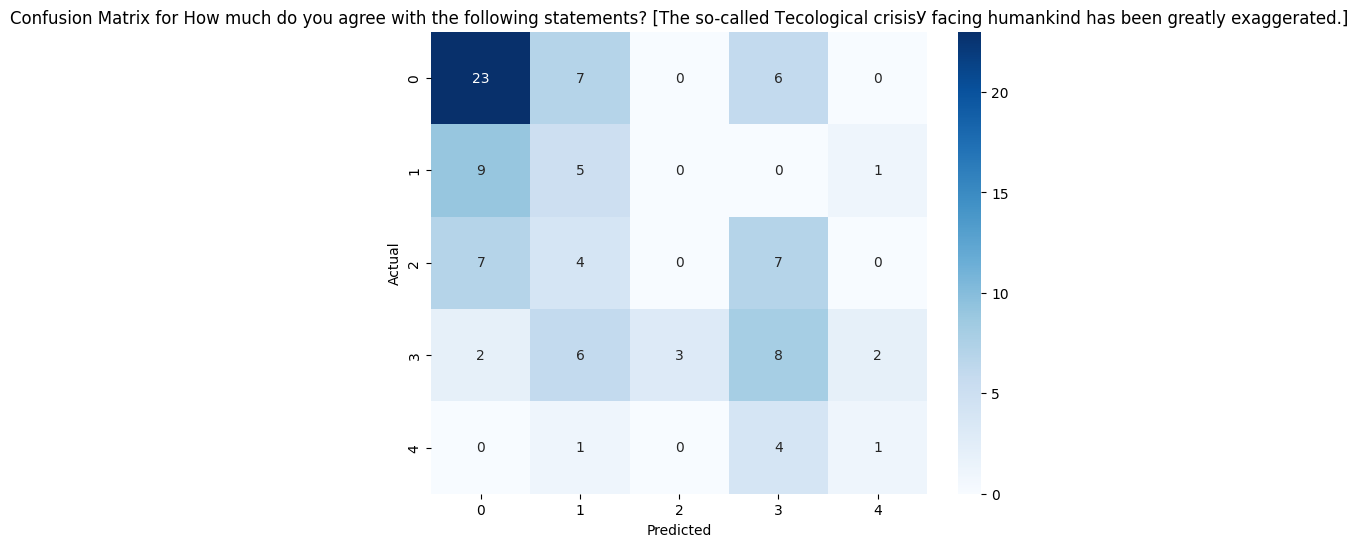




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.] on Test Set: 0.3854166666666667
Accuracy for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.] on Evaluation Set: 0.3958333333333333 

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        25
           1       0.30      0.27      0.29        26
           2       0.25      0.14      0.18        14
           3       0.50      0.62      0.56        24
           4       0.00      0.00      0.00         7

    accuracy                           0.40        96
   macro avg       0.30      0.32      0.30        96
weighted avg       0.35      0.40      0.37        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 



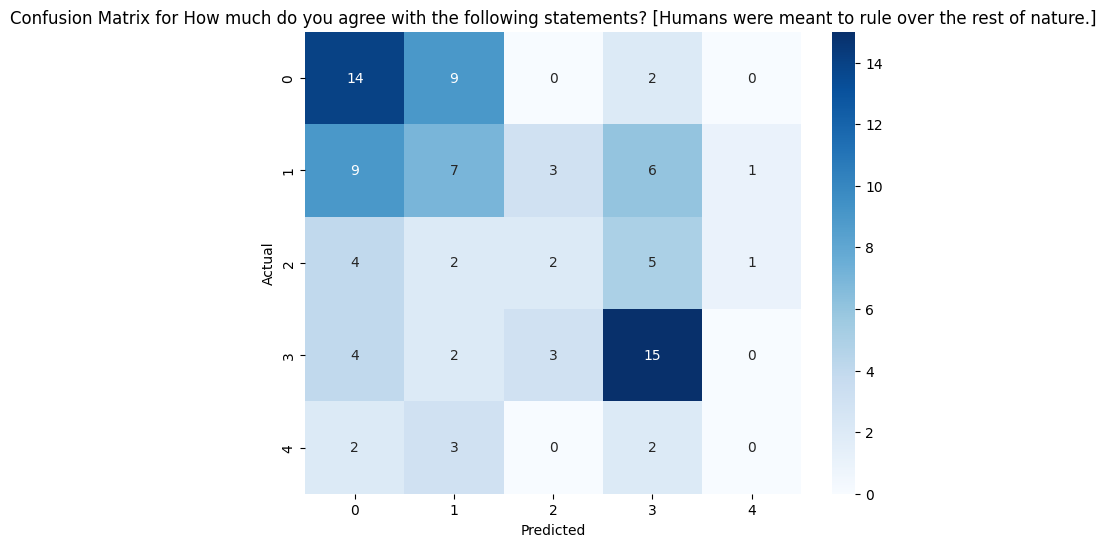




Features used: ['What is your nationality?', 'What is your biological sex?']
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.] on Test Set: 0.3020833333333333
Accuracy for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.] on Evaluation Set: 0.3333333333333333 

              precision    recall  f1-score   support

           0       0.20      0.21      0.21        14
           1       0.15      0.15      0.15        13
           2       0.24      0.22      0.23        27
           3       0.50      0.77      0.61        26
           4       0.33      0.06      0.11        16

    accuracy                           0.33        96
   macro avg       0.29      0.28      0.26        96
weighted avg       0.31      0.33      0.30        96
 

Unique Classes in Evaluation Set: [0, 1, 2, 3, 4] 


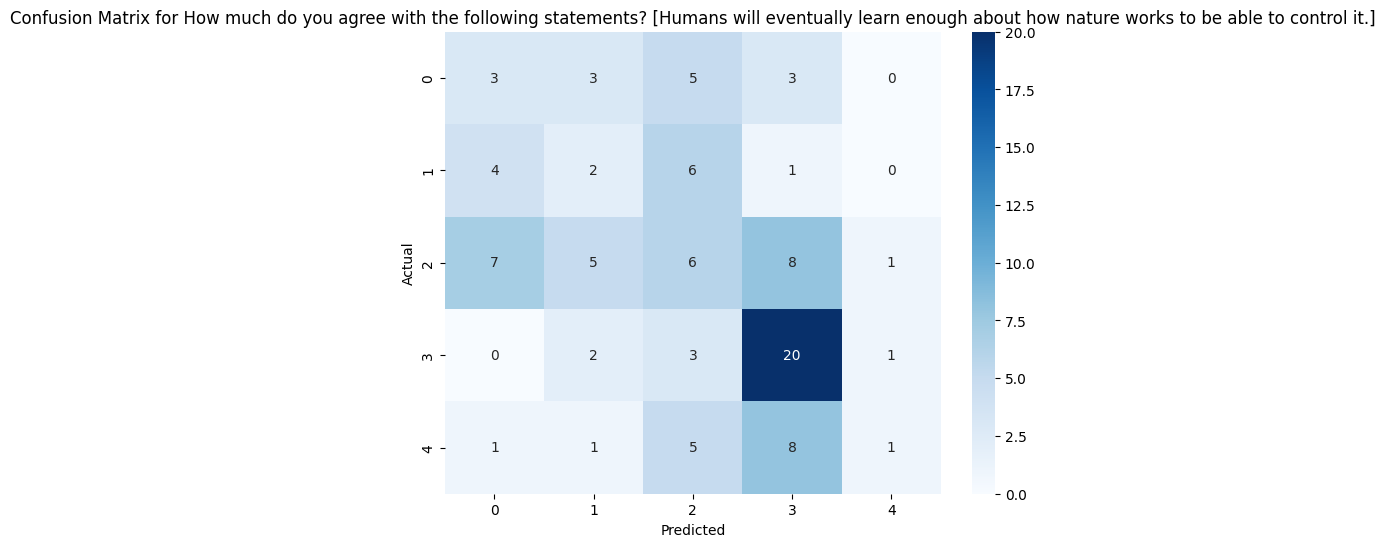

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



# Create a dictionary to store classifiers for each environmental perception variable
classifiers = {}

# Iterate through each environmental perception variable
for target, feature_scores_df in best_features_per_target.items():
    # Select the top 3 features for the current environmental variable
    selected_features = feature_scores_df.nlargest(2, 'Score')['Specs'].tolist()
    # Extract the features and target variable for the current environmental variable
    X = socio_demo_features[selected_features]
    y = environmental_perception_classes[target]

    # Train-test split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Train a RandomForestClassifier for the current environmental variable
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Print the features used for the current target
    print(f'Features used: {selected_features}')

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy for {target} on Test Set: {accuracy_test}')

    # Make predictions on the evaluation set
    y_pred_eval = classifier.predict(X_eval)

    # Evaluate the model on the evaluation set
    accuracy_eval = accuracy_score(y_eval, y_pred_eval)
    print(f'Accuracy for {target} on Evaluation Set: {accuracy_eval} \n')

    # Additional evaluation metrics
    print(classification_report(y_eval, y_pred_eval,zero_division='warn'), '\n')

    unique_classes = list(set(y_eval))
    print(f'Unique Classes in Evaluation Set: {unique_classes} \n')

    #Confusion matrix
    conf_matrix = confusion_matrix(y_eval, y_pred_eval, labels=unique_classes)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
    plt.title(f'Confusion Matrix for {target}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('\n\n')

    # Save the classifier to the dictionary
    classifiers[target] = classifier


# Training by flattening environmental perceptions

Features used: ['What is your nationality?', 'Region: generated from A1.1', 'What is your biological sex?']
Accuracy on Test Set for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]: 0.453125
Accuracy on Evaluation Set for How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]: 0.46875 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.25      0.06      0.09        18
           4       0.51      0.88      0.64        32
           5       0.20      0.10      0.13        10

    accuracy                           0.47        64
   macro avg       0.19      0.21      0.17        64
weighted avg       0.36      0.47      0.37        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Confusion Ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


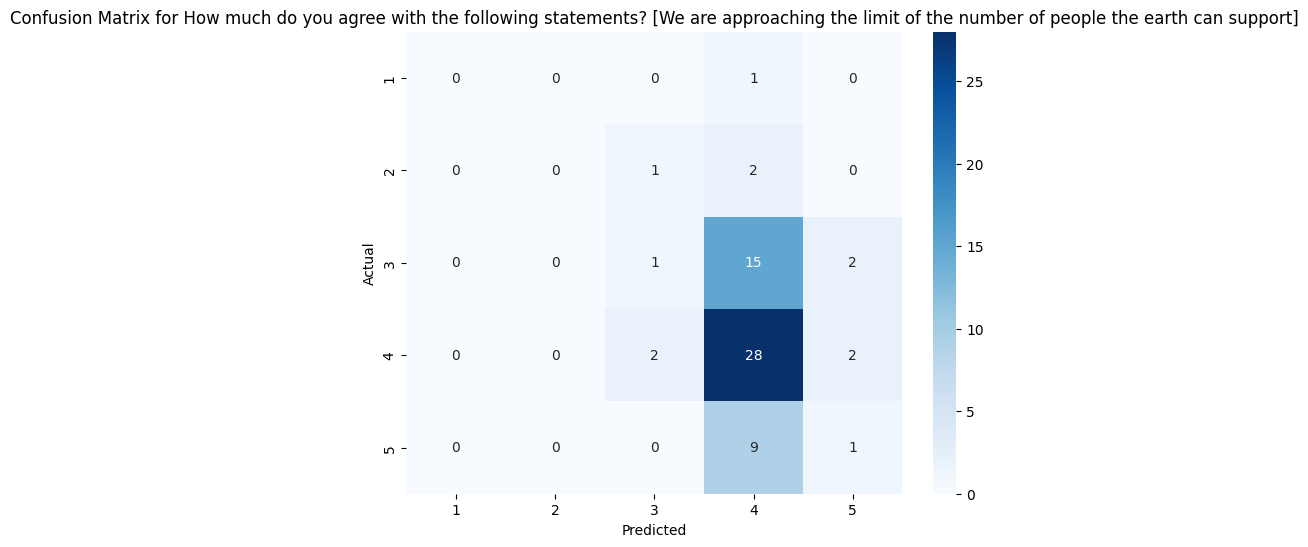




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is the highest educational level you have completed']
Accuracy on Test Set for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]: 0.515625
Accuracy on Evaluation Set for How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]: 0.453125 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.54      0.67      0.60        30
           5       0.43      0.41      0.42        22

    accuracy                           0.45        64
   macro avg       0.24      0.27      0.25        64
weighted avg       0.40      0.45      0.42        64
 

Unique Classes in Evaluation Set: [2, 3, 4, 5] 

Confusion Matrix for the target:

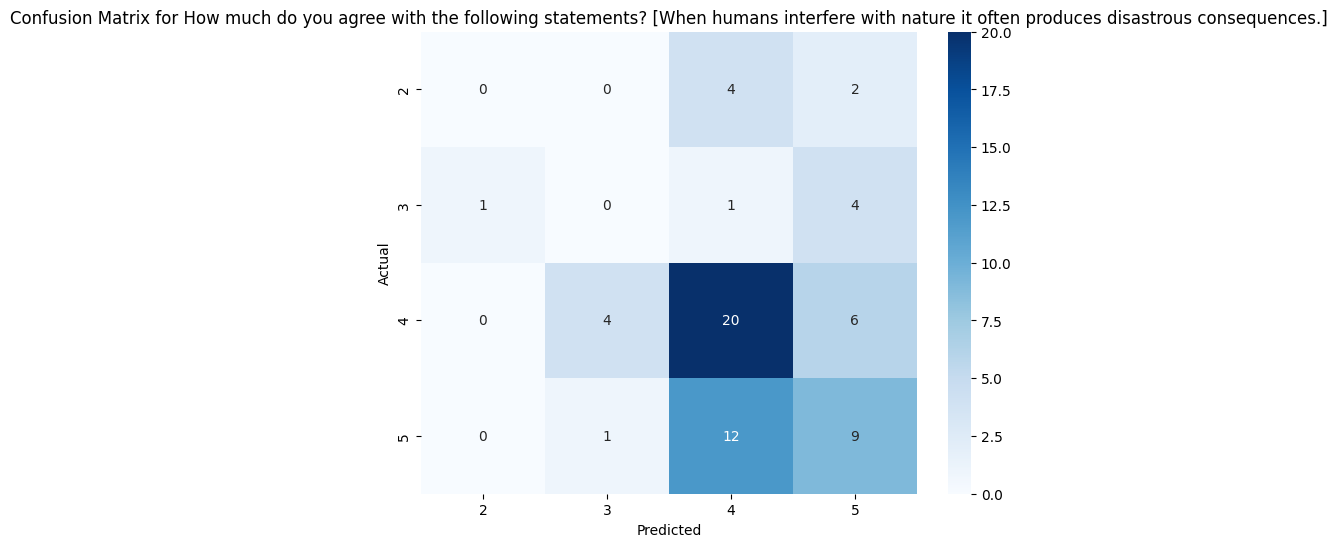




Features used: ['What is your nationality?', 'What is your marital status?', 'Please specify your ethnicity.']
Accuracy on Test Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.5625
Accuracy on Evaluation Set for How much do you agree with the following statements? [Humans are seriously abusing the environment.]: 0.546875 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3
           3       0.25      0.20      0.22         5
           4       0.60      0.35      0.44        26
           5       0.56      0.83      0.67        29

    accuracy                           0.55        64
   macro avg       0.38      0.34      0.35        64
weighted avg       0.54      0.55      0.52        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Confusion Matrix for the target:
 [[ 0  0  0  0  1]
 [ 0  1  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


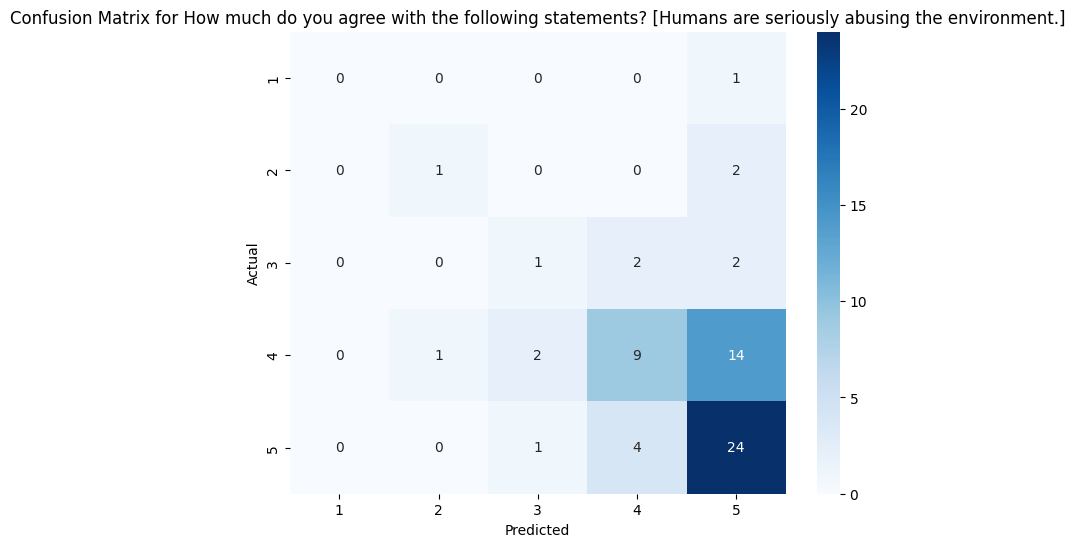




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your age?']
Accuracy on Test Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.546875
Accuracy on Evaluation Set for How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]: 0.390625 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.14      0.14      0.14         7
           4       0.39      0.39      0.39        23
           5       0.48      0.47      0.48        32

    accuracy                           0.39        64
   macro avg       0.20      0.20      0.20        64
weighted avg       0.40      0.39      0.39        64
 

Unique Classes in Evaluation Set: [2, 3, 4, 5] 

Confusion Matrix for the target:
 [[ 0  0  1  1]
 [ 0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


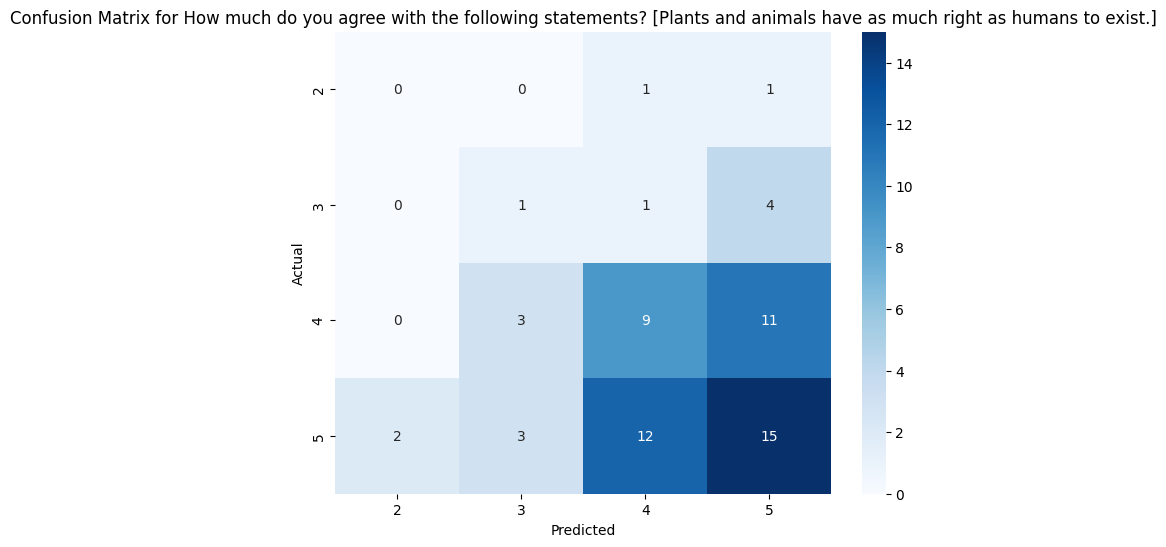




Features used: ['What is your nationality?', 'What is your biological sex?', 'Employment Status: Are you currentlyЙ?']
Accuracy on Test Set for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]: 0.4375
Accuracy on Evaluation Set for How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]: 0.46875 

              precision    recall  f1-score   support

           3       0.33      0.17      0.22         6
           4       0.52      0.47      0.49        32
           5       0.44      0.54      0.48        26

    accuracy                           0.47        64
   macro avg       0.43      0.39      0.40        64
weighted avg       0.47      0.47      0.46        64
 

Unique Classes in Evaluation Set: [3, 4, 5] 

Confusion Matrix for the target:
 [[ 1  3  2]
 [ 1 15 16]
 [ 1 11 14]] 



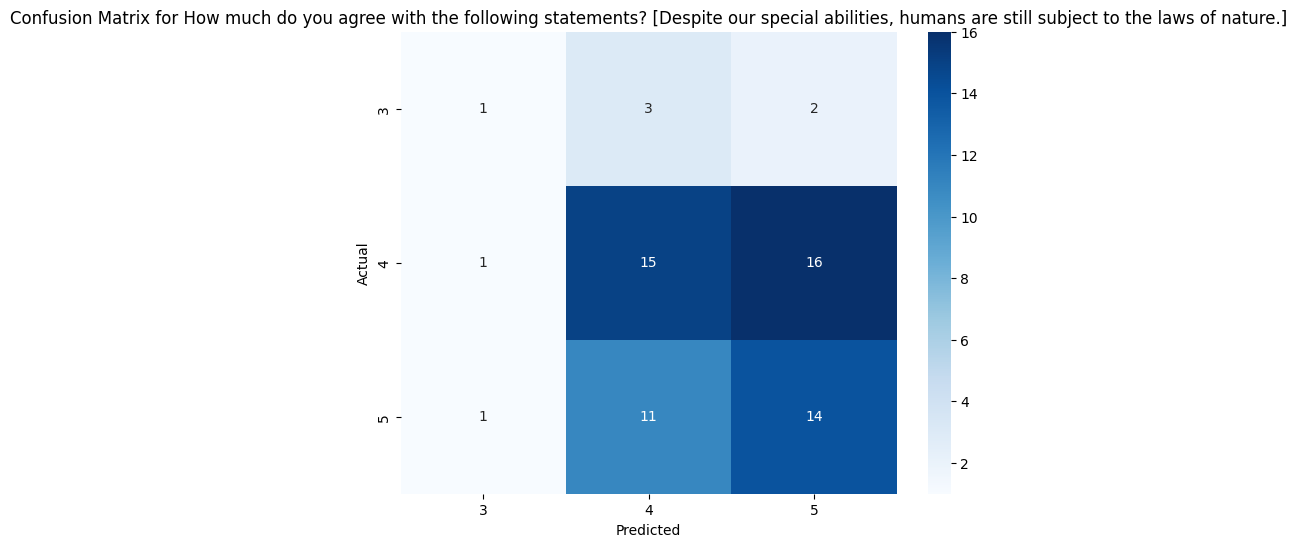




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'What is the highest educational level you have completed']
Accuracy on Test Set for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]: 0.328125
Accuracy on Evaluation Set for How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]: 0.265625 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.17      0.18         6
           3       0.21      0.19      0.20        16
           4       0.35      0.44      0.39        27
           5       0.10      0.07      0.08        14

    accuracy                           0.27        64
   macro avg       0.17      0.17      0.17        64
weighted avg       0.24      0.27      0.25        64
 

Unique Classes in Evaluation Set: [

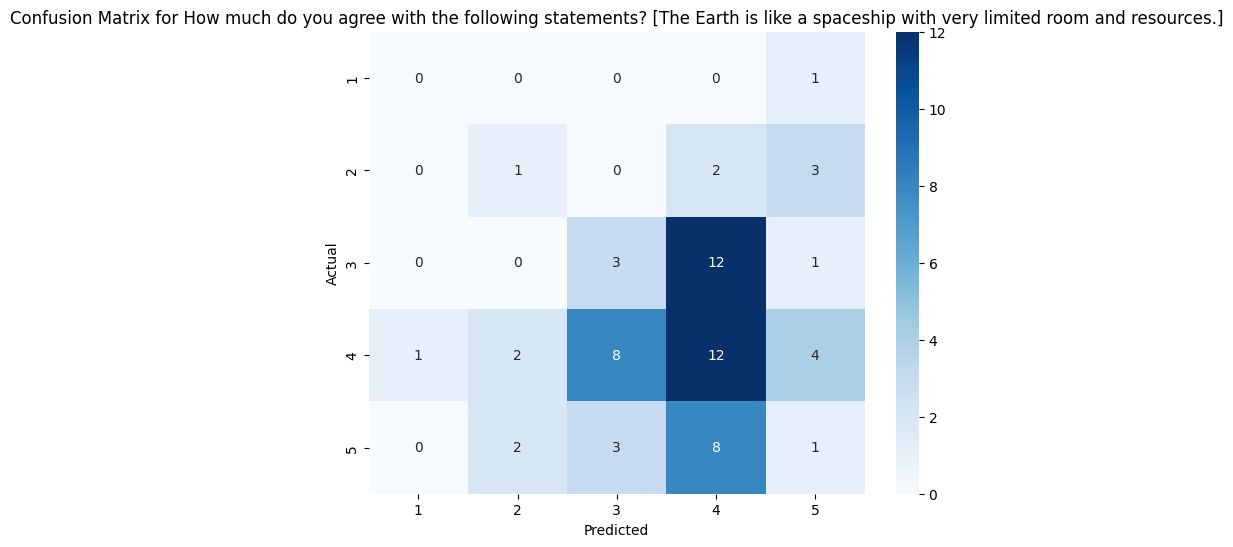




Features used: ['What is your nationality?', 'Please specify your ethnicity.', 'What is the highest educational level you have completed']
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]: 0.453125
Accuracy on Evaluation Set for How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]: 0.375 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.20      0.21      0.21        14
           4       0.48      0.54      0.51        28
           5       0.43      0.38      0.40        16

    accuracy                           0.38        64
   macro avg       0.22      0.23      0.22        64
weighted avg       0.36      0.38      0.37        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Confusion Matrix

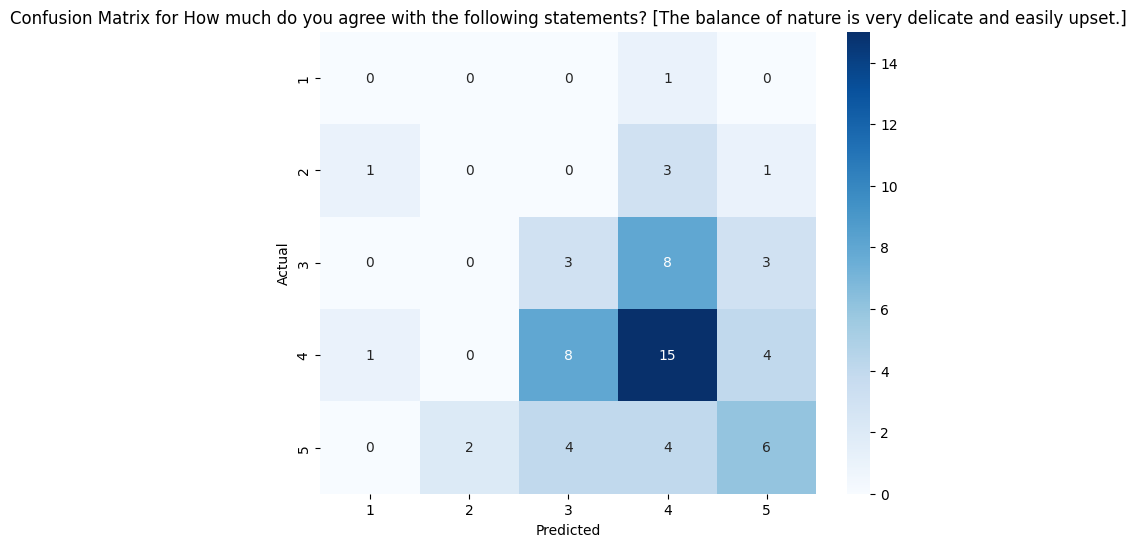




Features used: ['What is your nationality?', 'Please specify your ethnicity.', 'What is your age?']
Accuracy on Test Set for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]: 0.53125
Accuracy on Evaluation Set for How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]: 0.453125 

              precision    recall  f1-score   support

           3       0.33      0.09      0.14        11
           4       0.53      0.37      0.43        27
           5       0.43      0.69      0.53        26

    accuracy                           0.45        64
   macro avg       0.43      0.38      0.37        64
weighted avg       0.45      0.45      0.42        64
 

Unique Classes in Evaluation Set: [3, 4, 5] 

Confusion Matrix for the target:
 [[ 1  2  8]
 [ 1 10 16]
 [ 1  7 18]] 



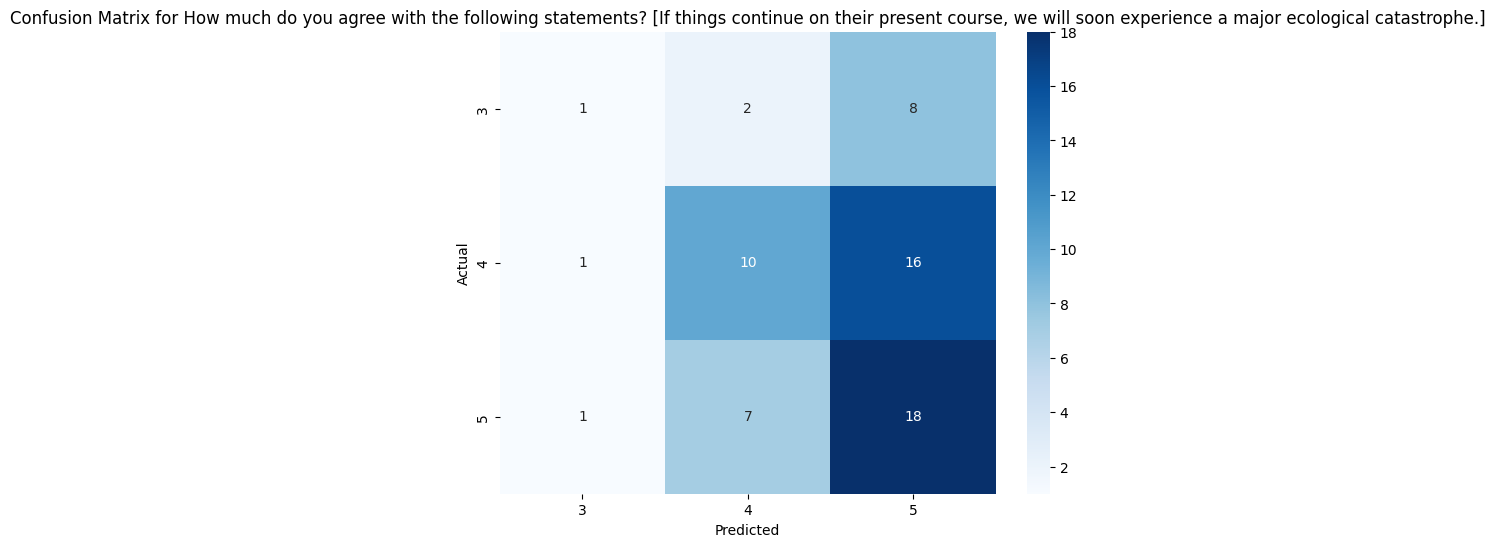




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy on Test Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.359375
Accuracy on Evaluation Set for How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]: 0.234375 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.21      0.55      0.30        11
           3       0.13      0.10      0.11        20
           4       0.33      0.25      0.29        20
           5       0.40      0.25      0.31         8

    accuracy                           0.23        64
   macro avg       0.21      0.23      0.20        64
weighted avg       0.23      0.23      0.22        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Con

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


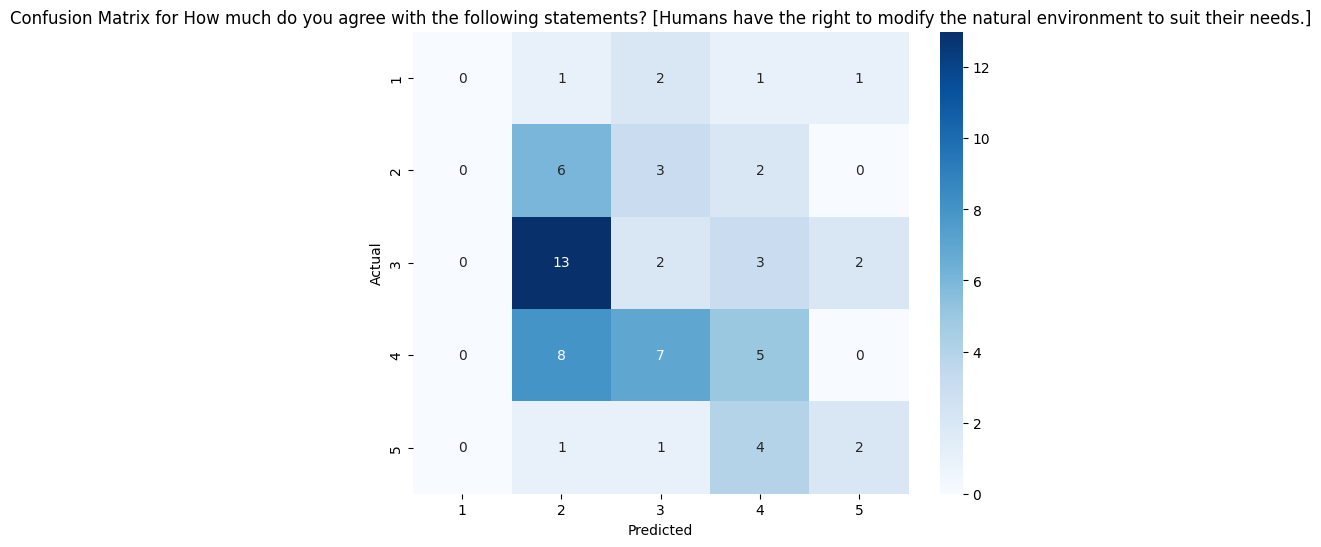




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'Please specify your ethnicity.']
Accuracy on Test Set for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]: 0.359375
Accuracy on Evaluation Set for How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]: 0.390625 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.14      0.17      0.15         6
           3       0.54      0.54      0.54        26
           4       0.42      0.48      0.44        21
           5       0.00      0.00      0.00        10

    accuracy                           0.39        64
   macro avg       0.22      0.24      0.23        64
weighted avg       0.37      0.39      0.38        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Confusion

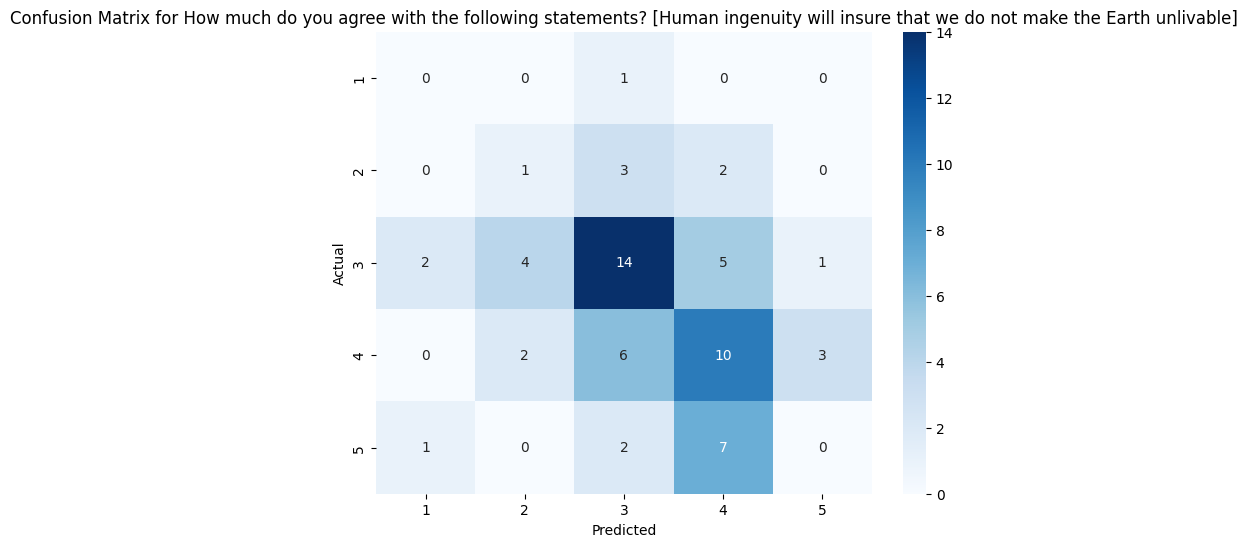




Features used: ['What is your nationality?', 'Employment Status: Are you currentlyЙ?', 'Region: generated from A1.1']
Accuracy on Test Set for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]: 0.375
Accuracy on Evaluation Set for How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]: 0.34375 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         8
           3       0.43      0.19      0.26        16
           4       0.38      0.68      0.48        22
           5       0.31      0.22      0.26        18

    accuracy                           0.34        64
   macro avg       0.22      0.22      0.20        64
weighted avg       0.32      0.34      0.30        64
 

Unique Classes in Evaluation Set: [2, 3, 4, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


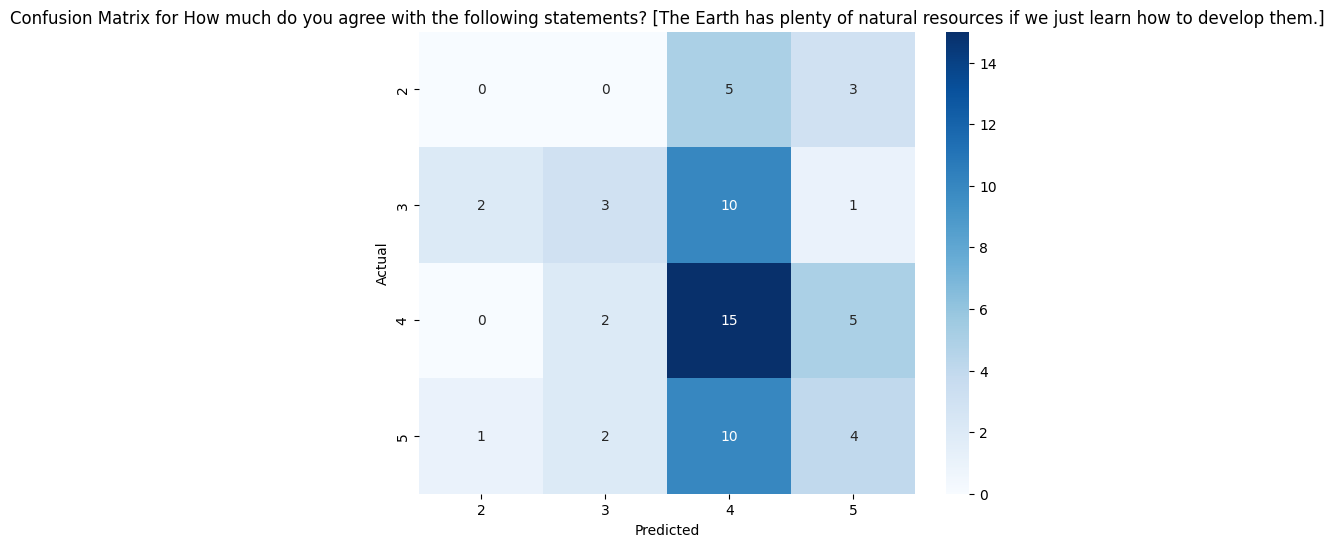




Features used: ['What is your nationality?', 'What is your biological sex?', 'Please specify your ethnicity.']
Accuracy on Test Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.34375
Accuracy on Evaluation Set for How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]: 0.4375 

              precision    recall  f1-score   support

           1       0.42      0.50      0.45        10
           2       0.56      0.75      0.64        20
           3       0.40      0.15      0.22        13
           4       0.27      0.21      0.24        14
           5       0.33      0.43      0.38         7

    accuracy                           0.44        64
   macro avg       0.40      0.41      0.39        64
weighted avg       0.42      0.44      0.41        64
 

Unique Classes in Evalua

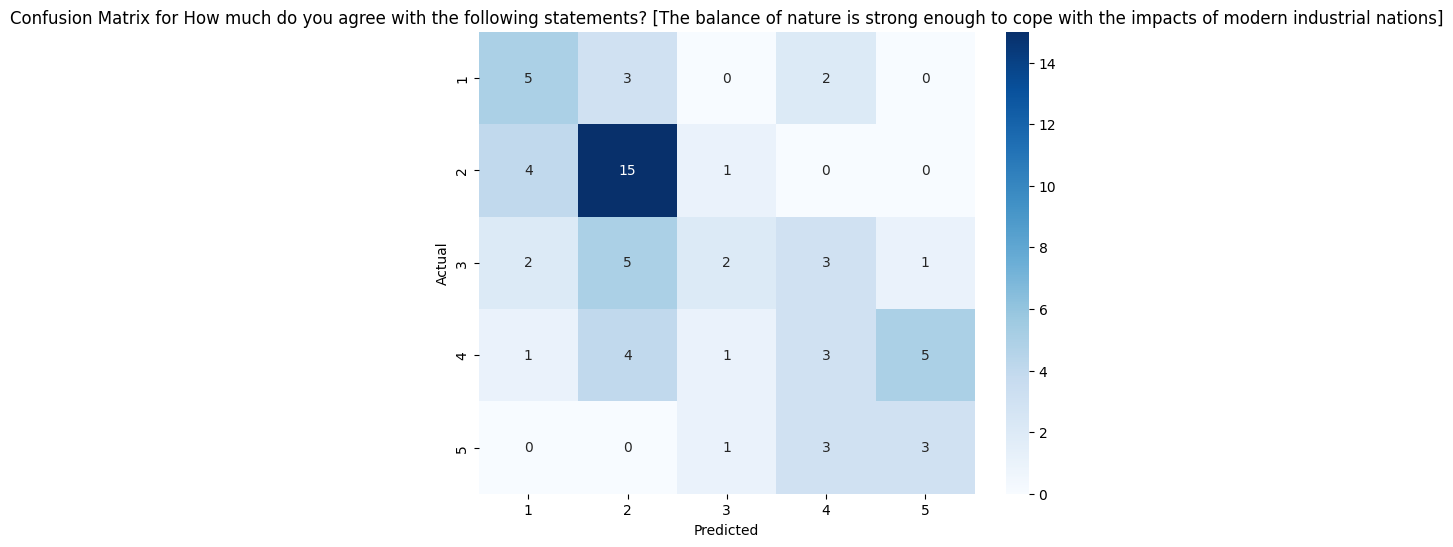




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy on Test Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.4375
Accuracy on Evaluation Set for How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]: 0.421875 

              precision    recall  f1-score   support

           1       0.55      0.72      0.62        25
           2       0.30      0.21      0.25        14
           3       0.33      0.17      0.22        12
           4       0.27      0.33      0.30         9
           5       0.25      0.25      0.25         4

    accuracy                           0.42        64
   macro avg       0.34      0.34      0.33        64
weighted avg       0.40      0.42      0.40        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5]

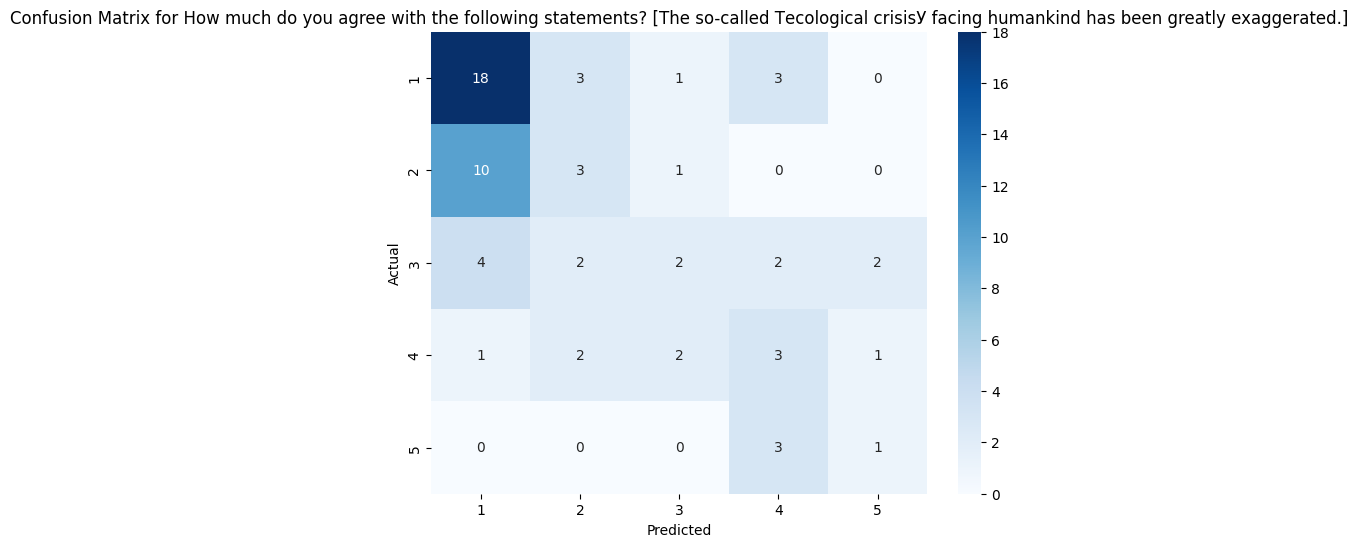




Features used: ['What is your nationality?', 'What is your biological sex?', 'What is your marital status?']
Accuracy on Test Set for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.390625
Accuracy on Evaluation Set for How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]: 0.40625 

              precision    recall  f1-score   support

           1       0.48      0.63      0.55        19
           2       0.42      0.38      0.40        13
           3       0.27      0.25      0.26        12
           4       0.46      0.38      0.41        16
           5       0.00      0.00      0.00         4

    accuracy                           0.41        64
   macro avg       0.33      0.33      0.32        64
weighted avg       0.39      0.41      0.40        64
 

Unique Classes in Evaluation Set: [1, 2, 3, 4, 5] 

Confusion Matrix for the target:
 [[12  3  2  2  0]
 [ 6

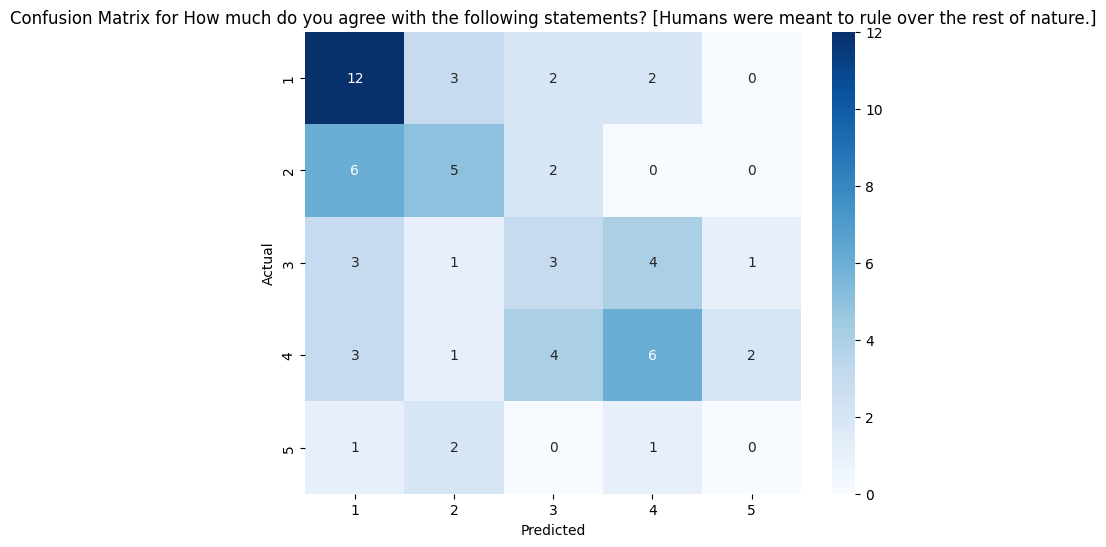




Features used: ['What is your nationality?', 'What is your biological sex?', 'Employment Status: Are you currentlyЙ?']
Accuracy on Test Set for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.296875
Accuracy on Evaluation Set for How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]: 0.28125 

              precision    recall  f1-score   support

           1       0.08      0.20      0.12         5
           2       0.29      0.27      0.28        15
           3       0.20      0.16      0.18        19
           4       0.47      0.57      0.52        14
           5       0.33      0.18      0.24        11

    accuracy                           0.28        64
   macro avg       0.27      0.28      0.26        64
weighted avg       0.29      0.28      0.28        64
 

Unique Classes in Evaluation S

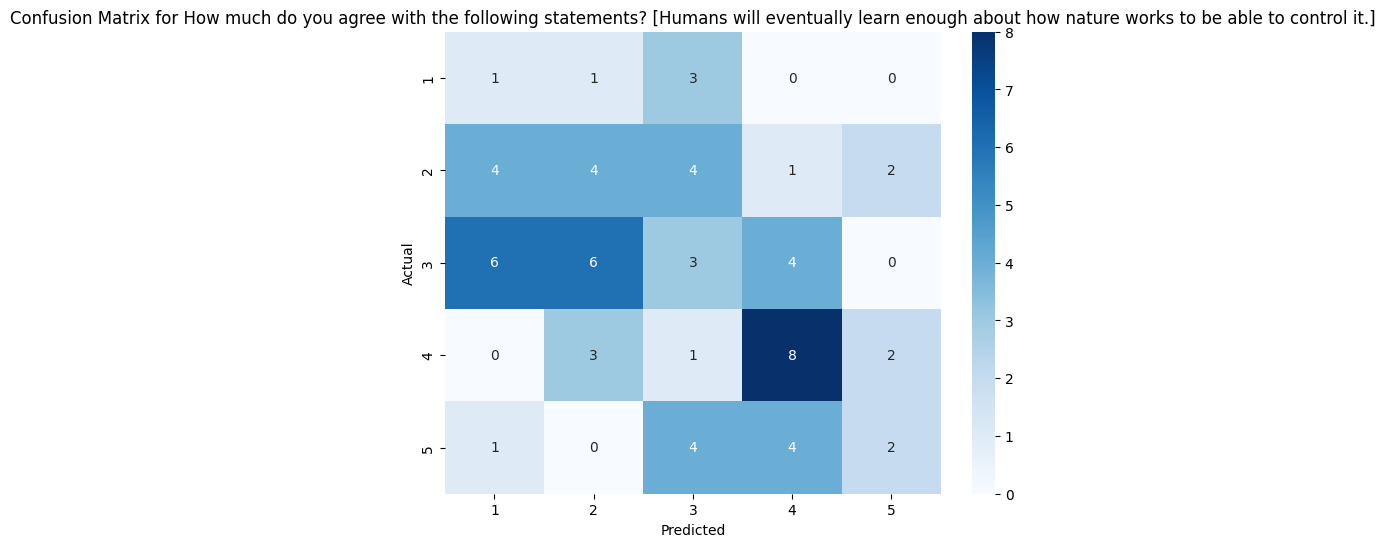

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Assuming best_features_per_target is a dictionary containing feature scores for each target
classifiers = {}

for target, feature_scores_df in best_features_per_target.items():
    # Select the top 3 features for each environmental variable
    selected_features = feature_scores_df.nlargest(3, 'Score')['Specs'].tolist()

    # Extract the features and target variables for the current target
    X = socio_demo_features[selected_features]
    y = environmental_perception[target].values.flatten()

    # Train-test split with 80% training, 10% test, and 10% evaluation
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Train a RandomForestClassifier for the current environmental variable
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Print the features used for the current target
    print(f'Features used: {selected_features}')

    # Make predictions on the test set
    y_pred_test = classifier.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy on Test Set for {target}: {accuracy_test}')

    # Make predictions on the evaluation set
    y_pred_eval = classifier.predict(X_eval)

    # Evaluate the model on the evaluation set
    accuracy_eval = accuracy_score(y_eval, y_pred_eval)
    print(f'Accuracy on Evaluation Set for {target}: {accuracy_eval} \n')

    # Additional evaluation metrics
    print(classification_report(y_eval, y_pred_eval,zero_division='warn'), '\n')

    # Check unique classes and confusion matrix
    unique_classes = list(set(y_eval))
    print(f'Unique Classes in Evaluation Set: {unique_classes} \n')

    #Confusion matrix
    conf_matrix = confusion_matrix(y_eval, y_pred_eval, labels=unique_classes)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
    plt.title(f'Confusion Matrix for {target}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('\n\n')

    # Save the classifier to the dictionary
    classifiers[target] = classifier


In [ ]:
socio_demo_features.head(10)

What is your nationality?  Region: generated from A1.1  \
0                         40                            0   
1                          6                            3   
2                          6                            3   
3                         39                            0   
4                         57                            3   
5                         39                            0   
6                         21                            1   
7                          6                            3   
8                        100                            3   
9                         90                            0   

   What is your biological sex?  \
0                             1   
1                             1   
2                             1   
3                             0   
4                             1   
5                             0   
6                             1   
7                             1   
8                             0   
9                             1   

   What is the highest educational level you have completed  \
0                                                  3          
1                                                  3          
2                                                  3          
3                                                  1          
4                                                  3          
5                                                  1          
6                                                  2          
7                                                  1          
8                                                  3          
9                                                  1          

   Do you have a pet or  a garden at home?  What is your age?  \
0                                        1                  0   
1                                        2                  1   
2                                        2                  1   
3                                        1                  1   
4                                        1                  2   
5                                        1                  2   
6                                        1                  3   
7                                        2                  3   
8                                        2                  3   
9                                        0                  4   

   Please specify your ethnicity.  What is your marital status?  \
0                               0                             3   
1                               6                             3   
2                               6                             3   
3                               0                             3   
4                               2                             3   
5                               4                             3   
6                               6                             3   
7                               6                             3   
8                               6                             3   
9                               0                             3   

   Employment Status: Are you currentlyЙ?  
0                                       1  
1                                       1  
2                                       1  
3                                       1  
4                                       1  
5                                       1  
6                                       1  
7                                       1  
8                                       1  
9                                       1

In [ ]:
print(socio_demo_features['What is your age?'].unique())
print(socio_demo_features['Region: generated from A1.1'].unique())
print(socio_demo_features['What is your biological sex?'].unique())
print(socio_demo_features['Please specify your ethnicity.'].unique())
print(socio_demo_features['What is your nationality?'].unique())
print(socio_demo_features['Do you have a pet or  a garden at home?'].unique())
print(socio_demo_features['Employment Status: Are you currentlyЙ?'].unique())
print(socio_demo_features['What is the highest educational level you have completed'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[0 3 1 2]
[1 0]
[0 6 2 4 5 1 3]
[ 40   6  39  57  21 100  90  89  45 101  66  64  46  72  20  80  75  98
  68  18   7  95  25  70  32  88  69  82 107 109  58  23  91   5  97  94
  99  22  73  53  14  34  48  61  65  30   1  87 108  17  47  92  31 103
  12  29  13   8  78  86  44  28  51  36  84  43  26  54 106   0  77  24
   4  19  60  93  16 102  56  49  74  11  33  76  35  63   9  10  71   2
 104  55  15  27  41  81  38 105  79   3  62  52  85  96  59  37  83  67
  50  42]
[1 2 0 3]
[1 4 8 2 6 5 3 7 0]
[3 1 2 4 0]


# Clustering: (do not delete as of now)
### 1. Tried multiple clustering models for different set of values to attain the best Silhouette Score.

### 2. The best silhouette score was for KMeans. The score was of 0.68, which is a good score. Other models performed similar to it but this was the best.

### 3. Try making a classification model using these clusters, we might attain a better accuracy.

In [ ]:
socio_demo_features.columns

Index(['What is your nationality?', 'Do you have a pet or  a garden at home?',
       'What is your age?', 'Employment Status: Are you currentlyЙ?',
       'What is the highest educational level you have completed'],
      dtype='object')

In [ ]:
columns_to_drop = ['Region: generated from A1.1','Please specify your ethnicity.']

# Create a new DataFrame without the specified columns
socio_demo_features_subset = socio_demo_features

In [ ]:
socio_demo_features_subset.columns

Index(['What is your nationality?', 'Do you have a pet or  a garden at home?',
       'What is your age?', 'Employment Status: Are you currentlyЙ?',
       'What is the highest educational level you have completed'],
      dtype='object')

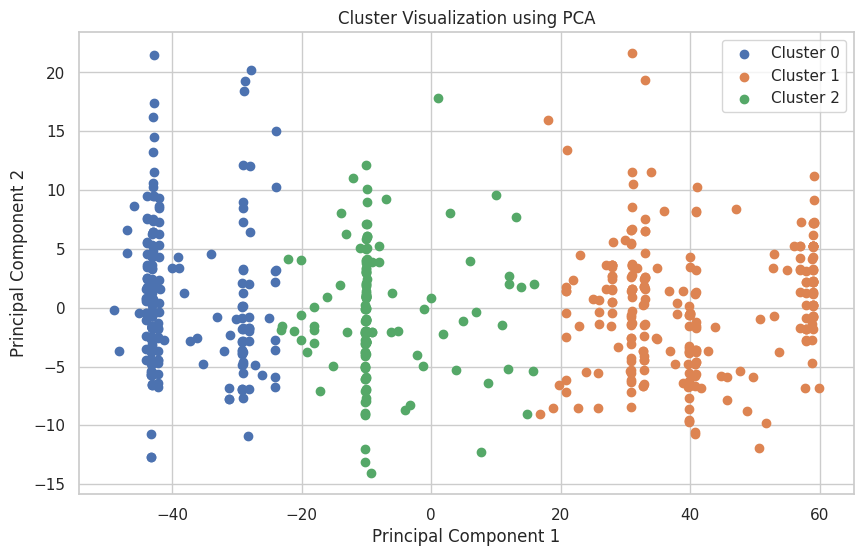

In [ ]:

environmental_perception_classes2 = environmental_perception.astype(str)
cluster_df = pd.concat([socio_demo_features_subset, environmental_perception_classes2], axis=1)

# Clustering socio-demographic features
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
cluster_df_pca = pca.fit_transform(cluster_df.drop('cluster', axis=1))

# Scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = cluster_df_pca[cluster_df['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0

for k in range(2, 11):  # Try different values for k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(cluster_df.drop('cluster', axis=1))
    silhouette_avg = silhouette_score(cluster_df.drop('cluster', axis=1), labels)
    print(f'for k = {k}: Silhouette score is - {silhouette_avg}')

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best Silhouette Score: {best_score} for k={best_k}")

for k = 2: Silhouette score is - 0.6807103752580677
for k = 3: Silhouette score is - 0.5832404910128466
for k = 4: Silhouette score is - 0.5386765712377415
for k = 5: Silhouette score is - 0.4706780146324562
for k = 6: Silhouette score is - 0.41772699927075935
for k = 7: Silhouette score is - 0.4188143884411886
for k = 8: Silhouette score is - 0.3777771582100334
for k = 9: Silhouette score is - 0.3264724877250286
for k = 10: Silhouette score is - 0.306364215003078
Best Silhouette Score: 0.6807103752580677 for k=2


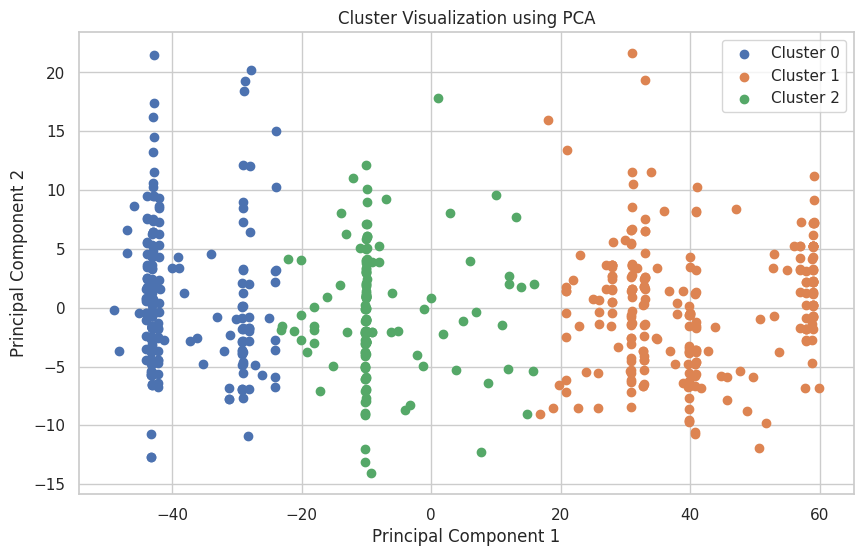

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


environmental_perception_classes2 = environmental_perception.astype(str)
cluster_df = pd.concat([socio_demo_features, environmental_perception_classes2], axis=1)

# Clustering socio-demographic features
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
cluster_df_pca = pca.fit_transform(cluster_df.drop('cluster', axis=1))

# Scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = cluster_df_pca[cluster_df['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0

for k in range(2, 11):  # Try different values for k
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(cluster_df.drop('cluster', axis=1))
    silhouette_avg = silhouette_score(cluster_df.drop('cluster', axis=1), labels)
    print(f'for k = {k}: Silhouette score is - {silhouette_avg}')

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best Silhouette Score: {best_score} for k={best_k}")

for k = 2: Silhouette score is - 0.6740980868806344
for k = 3: Silhouette score is - 0.5766152147577739
for k = 4: Silhouette score is - 0.5280561769862482
for k = 5: Silhouette score is - 0.4591987287821534
for k = 6: Silhouette score is - 0.41370154514989627
for k = 7: Silhouette score is - 0.4176921020195781
for k = 8: Silhouette score is - 0.3753454547292538
for k = 9: Silhouette score is - 0.3217440951891109
for k = 10: Silhouette score is - 0.31058235570283366
Best Silhouette Score: 0.6740980868806344 for k=2


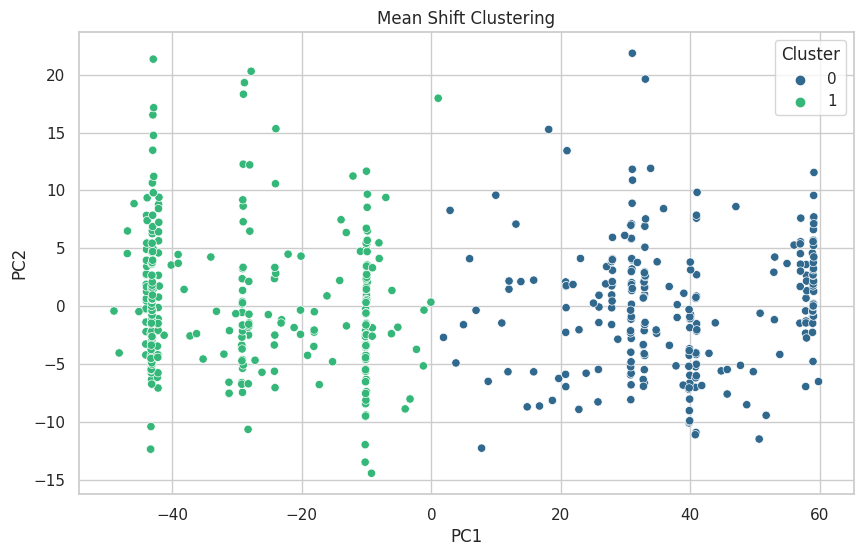

Silhouette Score for Mean Shift: 0.6716764719308207


In [ ]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
labels_mean_shift = mean_shift.fit_predict(cluster_df.drop('cluster', axis=1))

# Visualize or evaluate the results as needed

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(cluster_df.drop('cluster', axis=1))

# Add the cluster labels to the reduced data
data_2d_with_labels = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
data_2d_with_labels['Cluster'] = labels_mean_shift

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_2d_with_labels, palette='viridis', legend='full')
plt.title('Mean Shift Clustering')
plt.show()



# Compute silhouette score
silhouette_avg_mean_shift = silhouette_score(cluster_df.drop('cluster', axis=1), labels_mean_shift)

# Print the silhouette score
print(f"Silhouette Score for Mean Shift: {silhouette_avg_mean_shift}")


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Tune hyperparameters
best_score_gmm = -1
best_n_components_gmm = 0

for n_components_gmm in range(2, 11):  # Adjust the range based on your data
    gmm = GaussianMixture(n_components=n_components_gmm, random_state=42)
    labels_gmm = gmm.fit_predict(cluster_df.drop('cluster', axis=1))
    silhouette_avg_gmm = silhouette_score(cluster_df.drop('cluster', axis=1), labels_gmm)
    print(f'for score_gmm = {n_components_gmm}: Silhouette score is - {silhouette_avg_gmm}')

    if silhouette_avg_gmm > best_score_gmm:
        best_score_gmm = silhouette_avg_gmm
        best_n_components_gmm = n_components_gmm

print(f"Best Silhouette Score for GMM: {best_score_gmm} with n_components={best_n_components_gmm}")


for score_gmm = 2: Silhouette score is - 0.6670831805911623
for score_gmm = 3: Silhouette score is - 0.4923277866731938
for score_gmm = 4: Silhouette score is - 0.3837347200975705
for score_gmm = 5: Silhouette score is - 0.4763518431882446
for score_gmm = 6: Silhouette score is - 0.4459850284207637
for score_gmm = 7: Silhouette score is - 0.40248213942853256
for score_gmm = 8: Silhouette score is - 0.3330659106939749
for score_gmm = 9: Silhouette score is - 0.32049133908235633
for score_gmm = 10: Silhouette score is - 0.2888367659669188
Best Silhouette Score for GMM: 0.6670831805911623 with n_components=2


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Tune hyperparameters
best_score_agg = -1
best_n_clusters_agg = 0

for n_clusters_agg in range(2, 11):  # Adjust the range based on your data
    agg = AgglomerativeClustering(n_clusters=n_clusters_agg)
    labels_agg = agg.fit_predict(cluster_df.drop('cluster', axis=1))
    silhouette_avg_agg = silhouette_score(cluster_df.drop('cluster', axis=1), labels_agg)
    print(f'for score_agg = {n_clusters_agg}: Silhouette score is - {silhouette_avg_agg}')

    if silhouette_avg_agg > best_score_agg:
        best_score_agg = silhouette_avg_agg
        best_n_clusters_agg = n_clusters_agg

print(f"Best Silhouette Score for Agglomerative Clustering: {best_score_agg} with n_clusters={best_n_clusters_agg}")


for score_agg = 2: Silhouette score is - 0.6772140024436787
for score_agg = 3: Silhouette score is - 0.5404518207431256
for score_agg = 4: Silhouette score is - 0.4994844384898225
for score_agg = 5: Silhouette score is - 0.4394451791640746
for score_agg = 6: Silhouette score is - 0.43223124799255697
for score_agg = 7: Silhouette score is - 0.39935802397657466
for score_agg = 8: Silhouette score is - 0.38748657397997077
for score_agg = 9: Silhouette score is - 0.3838968810474572
for score_agg = 10: Silhouette score is - 0.36662580436676995
Best Silhouette Score for Agglomerative Clustering: 0.6772140024436787 with n_clusters=2


# Try 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#to be edited in csv:
# 'Do you have a pet or  a garden at home?
# Employment Status: Are you currentlyЙ?
# How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]

# Assuming df is your DataFrame with features and target variable
X = df1['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']
          # Replace with actual features
y = df1['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]'] # Replace with actual labels

# Encode categorical variables if needed
# Use label encoding or one-hot encoding as per your preference

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from skmultilearn.problem_transform import BinaryRelevance

# Assuming 'df' is your DataFrame

# Drop unnecessary columns
df1 = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?',
       'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]',
       'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]',
       'How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
       'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
       'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]',
       'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]',
       'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]',
       'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]',
       'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
       'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]',
       'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]',
       'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
       'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
       'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
       'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]

# Drop rows with missing values
df1 = df1.dropna()

# Map string labels to numeric values for socio-demographic variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

# Encode categorical columns
for column in ['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']:
    # Use LabelEncoder for binary columns
    if len(df1[column].unique()) == 2:
        df1[column] = label_encoder.fit_transform(df1[column])
    else:
        # Use OneHotEncoder for categorical columns with more than two categories
        encoded_values = one_hot_encoder.fit_transform(df1[[column]])
        encoded_df = pd.DataFrame(encoded_values, columns=[f'{column}_{int(i)}' for i in range(encoded_values.shape[1])])
        df1 = pd.concat([df1, encoded_df], axis=1)
        df1 = df1.drop(column, axis=1)

# Define features and target variable
X = df1.drop(['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]'], axis=1)

y = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]




df1['Combined_Perception'] = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

# Step 2: Label Encoding
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df1['Combined_Perception'])

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Model Training
classifier = BinaryRelevance(LogisticRegression(max_iter=1000, random_state=42))
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print or log the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


KeyError: ignored

In [ ]:
pip install scikit-multilearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame with relevant columns

# Step 1: Create Target Variable
df1['Combined_Perception'] = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)


# Step 2: Label Encoding
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df1['Combined_Perception'])

# Step 1: Convert categorical variables to one-hot encoding


# Step 3: Select Features
X = df1[['What is your nationality?_ America',
 'What is your nationality?_ American',
 'What is your nationality?_ United States',
 'What is your nationality?_29',
 'What is your nationality?_African American',
 'What is your nationality?_America',
 'What is your nationality?_American',
 'What is your nationality?_American ',
 'What is your nationality?_American (U.S.A.)',
 'What is your nationality?_American (US)',
 'What is your nationality?_American (USA)',
 'What is your nationality?_American (USA) ',
 'What is your nationality?_American (United States of America) ',
 'What is your nationality?_American (United States)',
 'What is your nationality?_Anerican',
 'What is your nationality?_Argentina',
 'What is your nationality?_Ashenkazi Jewish',
 'What is your nationality?_Asian',
 'What is your nationality?_Australian',
 'What is your nationality?_Autsralian',
 'What is your nationality?_British',
 'What is your nationality?_British ',
 'What is your nationality?_British - White ',
 'What is your nationality?_British / Filipino, I am a dual citizen ',
 'What is your nationality?_British/English ',
 'What is your nationality?_Canadian',
 'What is your nationality?_Canadian ',
 'What is your nationality?_Candadian',
 'What is your nationality?_Catalan (spanish)',
 'What is your nationality?_Caucasian ',
 'What is your nationality?_China',
 'What is your nationality?_Chinese',
 'What is your nationality?_Citizen of the United States',
 'What is your nationality?_Colombian',
 'What is your nationality?_Cornish',
 'What is your nationality?_Dutch',
 'What is your nationality?_English ',
 'What is your nationality?_English, Irish, German',
 'What is your nationality?_FILIPINO',
 'What is your nationality?_Filipino',
 'What is your nationality?_Filipino ',
 'What is your nationality?_Filipino American',
 'What is your nationality?_Filipino American ',
 'What is your nationality?_Filipino-American',
 'What is your nationality?_French',
 'What is your nationality?_Friendly',
 'What is your nationality?_German',
 'What is your nationality?_German, Native American ',
 'What is your nationality?_Hispanic ',
 'What is your nationality?_Hong Kong',
 'What is your nationality?_Icelandic',
 'What is your nationality?_Indonesia ',
 'What is your nationality?_Irish',
 'What is your nationality?_Italian',
 'What is your nationality?_Japanese',
 'What is your nationality?_Korean/ American',
 'What is your nationality?_Latina',
 'What is your nationality?_Mexican American ',
 'What is your nationality?_Mixed',
 'What is your nationality?_Mixed nationalities',
 'What is your nationality?_Mixed race ',
 'What is your nationality?_Myanmar',
 'What is your nationality?_Myanmar ',
 'What is your nationality?_New Zealand European',
 'What is your nationality?_New Zealander',
 'What is your nationality?_North American',
 'What is your nationality?_Norwegian',
 'What is your nationality?_Philippines',
 'What is your nationality?_Polish-American',
 'What is your nationality?_Portuguese-Canadian',
 'What is your nationality?_Scottish',
 'What is your nationality?_Singapore',
 'What is your nationality?_Singaporean',
 'What is your nationality?_South Korean',
 'What is your nationality?_TAIWAN',
 'What is your nationality?_U.S.',
 'What is your nationality?_UK',
 'What is your nationality?_US',
 'What is your nationality?_US Citizen',
 'What is your nationality?_US citizen',
 'What is your nationality?_USA',
 'What is your nationality?_USA ',
 'What is your nationality?_United States',
 'What is your nationality?_United States ',
 'What is your nationality?_United States of America',
 'What is your nationality?_United States of American',
 'What is your nationality?_Usa',
 'What is your nationality?_Viet Nam',
 'What is your nationality?_Viet nam',
 'What is your nationality?_Vietnam',
 'What is your nationality?_Vietnamese',
 'What is your nationality?_Vietnamese-American',
 'What is your nationality?_Vieynam',
 'What is your nationality?_Welsh',
 'What is your nationality?_Welsh, British',
 'What is your nationality?_White',
 'What is your nationality?_White American ',
 'What is your nationality?_White British',
 'What is your nationality?_White British ',
 'What is your nationality?_White English ',
 'What is your nationality?_american',
 'What is your nationality?_canadian',
 'What is your nationality?_filipino',
 'What is your nationality?_indonesian',
 'What is your nationality?_the United States',
 'What is your nationality?_the United States ',
 'What is your nationality?_uk',
 'What is your nationality?_us',
 'What is your nationality?_usa',
 'What is your nationality?_white',
 'Region: generated from A1.1_Asia',
 'Region: generated from A1.1_EU',
 'Region: generated from A1.1_Other',
 'Region: generated from A1.1_US/Canada',
 'What is your biological sex?_Female',
 'What is your biological sex?_Male',
 'What is the highest educational level you have completed_Graduate school and higher',
 'What is the highest educational level you have completed_High school',
 'What is the highest educational level you have completed_Primary school',
 'What is the highest educational level you have completed_Secondary school',
 'What is the highest educational level you have completed_Undergraduate school',
 'Do you have a pet or  a garden at home?_A garden',
 'Do you have a pet or  a garden at home?_A pet',
 'Do you have a pet or  a garden at home?_Both',
 'Do you have a pet or  a garden at home?_None',
 'Please specify your ethnicity._Asian',
 'Please specify your ethnicity._Black or African American',
 'Please specify your ethnicity._Hispanic or Latino',
 'Please specify your ethnicity._Native American or American Indian',
 'Please specify your ethnicity._Other',
 'Please specify your ethnicity._Pacific Islander',
 'Please specify your ethnicity._White',
 'What is your marital status?_Divorced',
 'What is your marital status?_Married or domestic partnership',
 'What is your marital status?_Separated',
 'What is your marital status?_Single, never married',
 'What is your marital status?_Widowed',
 'Employment Status: Are you currentlyЙ?_A homemaker',
 'Employment Status: Are you currentlyЙ?_A student',
 'Employment Status: Are you currentlyЙ?_Employed for wages',
 'Employment Status: Are you currentlyЙ?_Military',
 'Employment Status: Are you currentlyЙ?_Out of work and looking for work',
 'Employment Status: Are you currentlyЙ?_Out of work but not currently looking for work',
 'Employment Status: Are you currentlyЙ?_Retired',
 'Employment Status: Are you currentlyЙ?_Self-employed',
 'Employment Status: Are you currentlyЙ?_Unable to work']]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
classifier = BinaryRelevance(LogisticRegression(max_iter=1000, random_state=42))
classifier.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print or log the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


ValueError: ignored

In [ ]:
df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?',
       'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]',
       'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]',
       'How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
       'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]',
       'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]',
       'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]',
       'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]',
       'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]',
       'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
       'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]',
       'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]',
       'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]',
       'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]',
       'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]',
       'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']].dtypes

What is your nationality?                                                                                                                                     object
Region: generated from A1.1                                                                                                                                   object
What is your biological sex?                                                                                                                                  object
What is the highest educational level you have completed                                                                                                      object
Do you have a pet or  a garden at home?                                                                                                                       object
What is your age?                                                                                                                                              int64
Please spe

In [ ]:
df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

KeyError: ignored

In [ ]:
display(df1.columns)

Index(['Unnamed: 0', 'п..O1',
       'Are you currently self-isolated/ social distancing?',
       'How long have you been self-isolated/ social distancing? (please tick "no", if you are not currently self-isolated)',
       'How much are you worried about the COVID-19 outbreak?',
       'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]',
       'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
       'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]',
       'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]',
       'How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
       ...
       'What is your marital status?_Wi

In [ ]:
df1.columns.tolist()

['Unnamed: 0',
 'п..O1',
 'Are you currently self-isolated/ social distancing?',
 'How long have you been self-isolated/ social distancing? (please tick "no", if you are not currently self-isolated)',
 'How much are you worried about the COVID-19 outbreak?',
 'How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]',
 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]',
 'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]',
 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]',
 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]',
 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we

In [ ]:
print(df1['Combined_Perception'].unique())

['4,5,5,4,3,5,3,4,3,5,4,3,2,1,2' '4,5,5,5,5,5,5,5,4,1,3,1,1,1,3'
 '5,5,5,5,5,5,5,5,4,2,3,1,1,1,3' '4,5,4,5,4,5,5,5,2,3,5,2,3,1,4'
 '3,3,5,3,5,3,4,4,2,5,5,2,3,2,4' '2,4,2,5,3,3,3,2,2,3,3,3,3,1,4'
 '3,3,5,5,4,4,5,5,4,2,4,2,1,1,3' '4,5,5,5,4,5,3,5,3,2,5,1,1,2,3'
 '3,4,5,4,4,2,3,4,2,2,5,3,1,2,2' '3,2,5,3,3,5,4,4,4,4,5,3,3,5,3'
 '4,4,4,5,4,4,4,5,2,3,4,3,2,1,4' '4,5,5,4,4,5,4,5,3,3,5,1,3,3,3'
 '4,3,5,4,4,3,3,4,3,3,5,2,4,4,5' '4,5,4,4,4,4,3,4,5,3,3,4,3,4,5'
 '5,5,5,5,5,5,5,5,5,5,5,5,5,5,5' '4,4,4,5,4,4,4,4,4,4,4,2,1,3,3'
 '4,5,5,5,4,2,4,3,2,3,5,3,2,1,3' '4,4,4,4,4,2,3,3,4,3,3,3,4,5,2'
 '5,5,5,5,5,5,4,5,2,4,5,3,1,2,2' '3,4,4,3,3,3,3,4,3,3,5,3,3,3,3'
 '4,5,5,5,5,5,4,5,3,4,5,4,3,1,3' '3,4,4,5,5,5,5,3,2,2,5,5,3,2,3'
 '3,5,5,5,4,4,5,4,2,3,5,2,1,1,3' '5,5,5,4,5,4,5,5,2,3,2,1,3,1,3'
 '3,4,5,3,3,3,2,5,4,5,2,2,1,5,5' '4,4,3,4,4,3,4,5,3,5,5,2,4,5,2'
 '4,4,4,4,5,4,4,4,2,2,4,2,2,2,4' '4,5,5,5,5,3,3,4,3,2,5,2,2,3,3'
 '4,4,5,5,4,5,4,5,3,3,3,2,1,1,3' '3,3,4,5,5,4,4,4,4,3,5,5,3,2,4'
 '2,4,5,4,4,2,4,4,4,4,4,2